# EDA Case Study by Ruth Tobi Ogunyomi


### The objective is to identify patterns in the loan application data that indicate if a client is likely to have difficulty paying their installments. By understanding the factors driving loan default, the company can take actions such as adjusting loan terms, denying loans, or offering higher interest rates to risky applicants.

In [ ]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Seaborn and Matplotlib packages as well for Viz. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# 1. Load Data Application CVS File: Import data files into dataframe.

In [2]:
# Read application data file into dataframe
df=pd.read_csv("application_data.csv")
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

# 2. Check the structure of df DataFrame

In [3]:
# Shape of dataframe
df.shape

(307511, 122)

In [4]:
# Datatypes of dataframe
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [5]:
# Quick review to the statistics matrixes of df dataframe
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# 3. Missing Data Handling: Finding the percentage of missing values for all the columns.

In [6]:
# Analyze columns for missing values in df
df_null_percentages = df.isnull().mean()*100

# Round off to 2 decimal places
df_null_percentages = df_null_percentages.round(2)

# Sort in ascending order
df_null_percentages = df_null_percentages.sort_values(ascending=False)
df_null_percentages


COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [7]:
# Removing columns with high missing percentage (above 50%).

# Create new DF by removing columns where more than 50% of null values from df_datathreshold_percentage = 50

# Set threshold percentages
threshold = 50

# Calculate missing percentages
df_null_percentages = df.isnull().mean()*100

# identify columns with missing values above the threshold
columns_to_drop = df_null_percentages[df_null_percentages > threshold].index

# Drop columns wiht the high missing percentage
df_clean = df.drop(columns=columns_to_drop)

# Size of new DataFrame
df_clean.shape

(307511, 81)

Insight for line 7: Columns with more than 50% missing values has been filtered

In [8]:
# Lets check again the missing values > 1% of remaining columns in df_clean dataframe.

df_null_percentages = (df_clean.isnull().mean() * 100) .round(2).sort_values(ascending=False)
df_null_percentages


FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
NAME_TYPE_SUITE                  0.42
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_EMP_PHONE                   0.00
AMT_CREDIT                       0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMEN

Insight for line 8: - NAME_TYPE_SUITE, DEF_60_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, EXT_SOURCE_2, and AMT_GOODS_PRICE have lower percentages of missing values, ranging from 0.09-0.42%. These variables represent various aspects of applicant information, such as co-applicant type, social circle, and external data. The low percentage of missing values suggests that these details are generally available and consistently recorded.

In [9]:
# FLAG_DOCUMENT and EXT_SOURCE Do not provide any analytical value and hence we will remove it

columns_to_remove = df_clean.columns[df_clean.columns.str.startswith(('FLAG_DOCUMENT', 'EXT_SOURCE'))]

# Drop the identicalfied columns from the clean Dateframe
df_clean = df_clean.drop(columns=columns_to_remove)
df_clean.shape

(307511, 59)

In [10]:
# Drop duplicate data from Dataframeframe, if any

df_clean = df_clean.drop_duplicates()
df_clean.shape

(307511, 59)

Insight for line 10: There are no duplicate Values in the DataFrame "df_clean"

In [11]:
# Check null values percentage in df_clean dataframe

df_null_percentages = (df_clean.isnull().mean() * 100) .round(2).sort_values(ascending=False)
df_null_percentages

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
NAME_TYPE_SUITE                  0.42
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
AMT_GOODS_PRICE                  0.09
DAYS_LAST_PHONE_CHANGE           0.00
ORGANIZATION_TYPE                0.00
LIVE_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_WORK_CITY           0.00
REG_CITY_NOT_LIVE_CITY           0.00
LIVE_REGION_

In [12]:
# Casting all variable into numeric in the dataset
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_clean[numeric_columns]=df_clean[numeric_columns].apply(pd.to_numeric,errors='coerce')
df_clean.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
# Imputing data for missing values in df_clean
# Here we're taking those columns which are having over ~13.5% missing values and are important and needs deep understanding.

columns_to_impute = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE"]

df_clean[columns_to_impute].describe()

# 4. Checking Data Quality

In [14]:
# Analyze and Standarizing the Datatypes and Values

for col in df_clean.columns:
    unique_values = df_clean[col].unique()
    col_dtype = df_clean[col].dtype
    print(f"Column: {col}, Data Type:{col_dtype}, Unique Values: {unique_values}")

Column: SK_ID_CURR, Data Type:int64, Unique Values: [100002 100003 100004 ... 456253 456254 456255]
Column: TARGET, Data Type:int64, Unique Values: [1 0]
Column: NAME_CONTRACT_TYPE, Data Type:object, Unique Values: ['Cash loans' 'Revolving loans']
Column: CODE_GENDER, Data Type:object, Unique Values: ['M' 'F' 'XNA']
Column: FLAG_OWN_CAR, Data Type:object, Unique Values: ['N' 'Y']
Column: FLAG_OWN_REALTY, Data Type:object, Unique Values: ['Y' 'N']
Column: CNT_CHILDREN, Data Type:int64, Unique Values: [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
Column: AMT_INCOME_TOTAL, Data Type:float64, Unique Values: [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
Column: AMT_CREDIT, Data Type:float64, Unique Values: [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
Column: AMT_ANNUITY, Data Type:float64, Unique Values: [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
Column: AMT_GOODS_PRICE, Data Type:float64, Unique Values: [ 351000.  1129500.   135000.  ...  4534

Column: TOTALAREA_MODE, Data Type:float64, Unique Values: [0.0149 0.0714    nan ... 0.489  0.482  0.797 ]
Column: EMERGENCYSTATE_MODE, Data Type:object, Unique Values: ['No' nan 'Yes']
Column: OBS_30_CNT_SOCIAL_CIRCLE, Data Type:float64, Unique Values: [  2.   1.   0.   4.   8.  10.  nan   7.   3.   6.   5.  12.   9.  13.
  11.  14.  22.  16.  15.  17.  20.  25.  19.  18.  21.  24.  23.  28.
  26.  29.  27.  47. 348.  30.]
Column: DEF_30_CNT_SOCIAL_CIRCLE, Data Type:float64, Unique Values: [ 2.  0.  1. nan  3.  4.  5.  6.  7. 34.  8.]
Column: OBS_60_CNT_SOCIAL_CIRCLE, Data Type:float64, Unique Values: [  2.   1.   0.   4.   8.  10.  nan   7.   3.   6.   5.  12.   9.  13.
  11.  14.  21.  15.  22.  16.  20.  25.  17.  19.  18.  24.  23.  28.
  29.  27.  47. 344.  30.  26.]
Column: DEF_60_CNT_SOCIAL_CIRCLE, Data Type:float64, Unique Values: [ 2.  0.  1. nan  3.  5.  4.  7. 24.  6.]
Column: DAYS_LAST_PHONE_CHANGE, Data Type:float64, Unique Values: [-1134.  -828.  -815. ... -3988. -3899. -

In [15]:
#Standarizing the values of columns, say -ve days and date columns.
df_clean[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = df_clean[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].apply(abs)

#df_clean[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]



# 5. Outliers Detection in df_clean

In [16]:
# List of numerical columns in df_clean
numerical_columns = df_clean.select_dtypes(include='number').columns.tolist()
numerical_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT

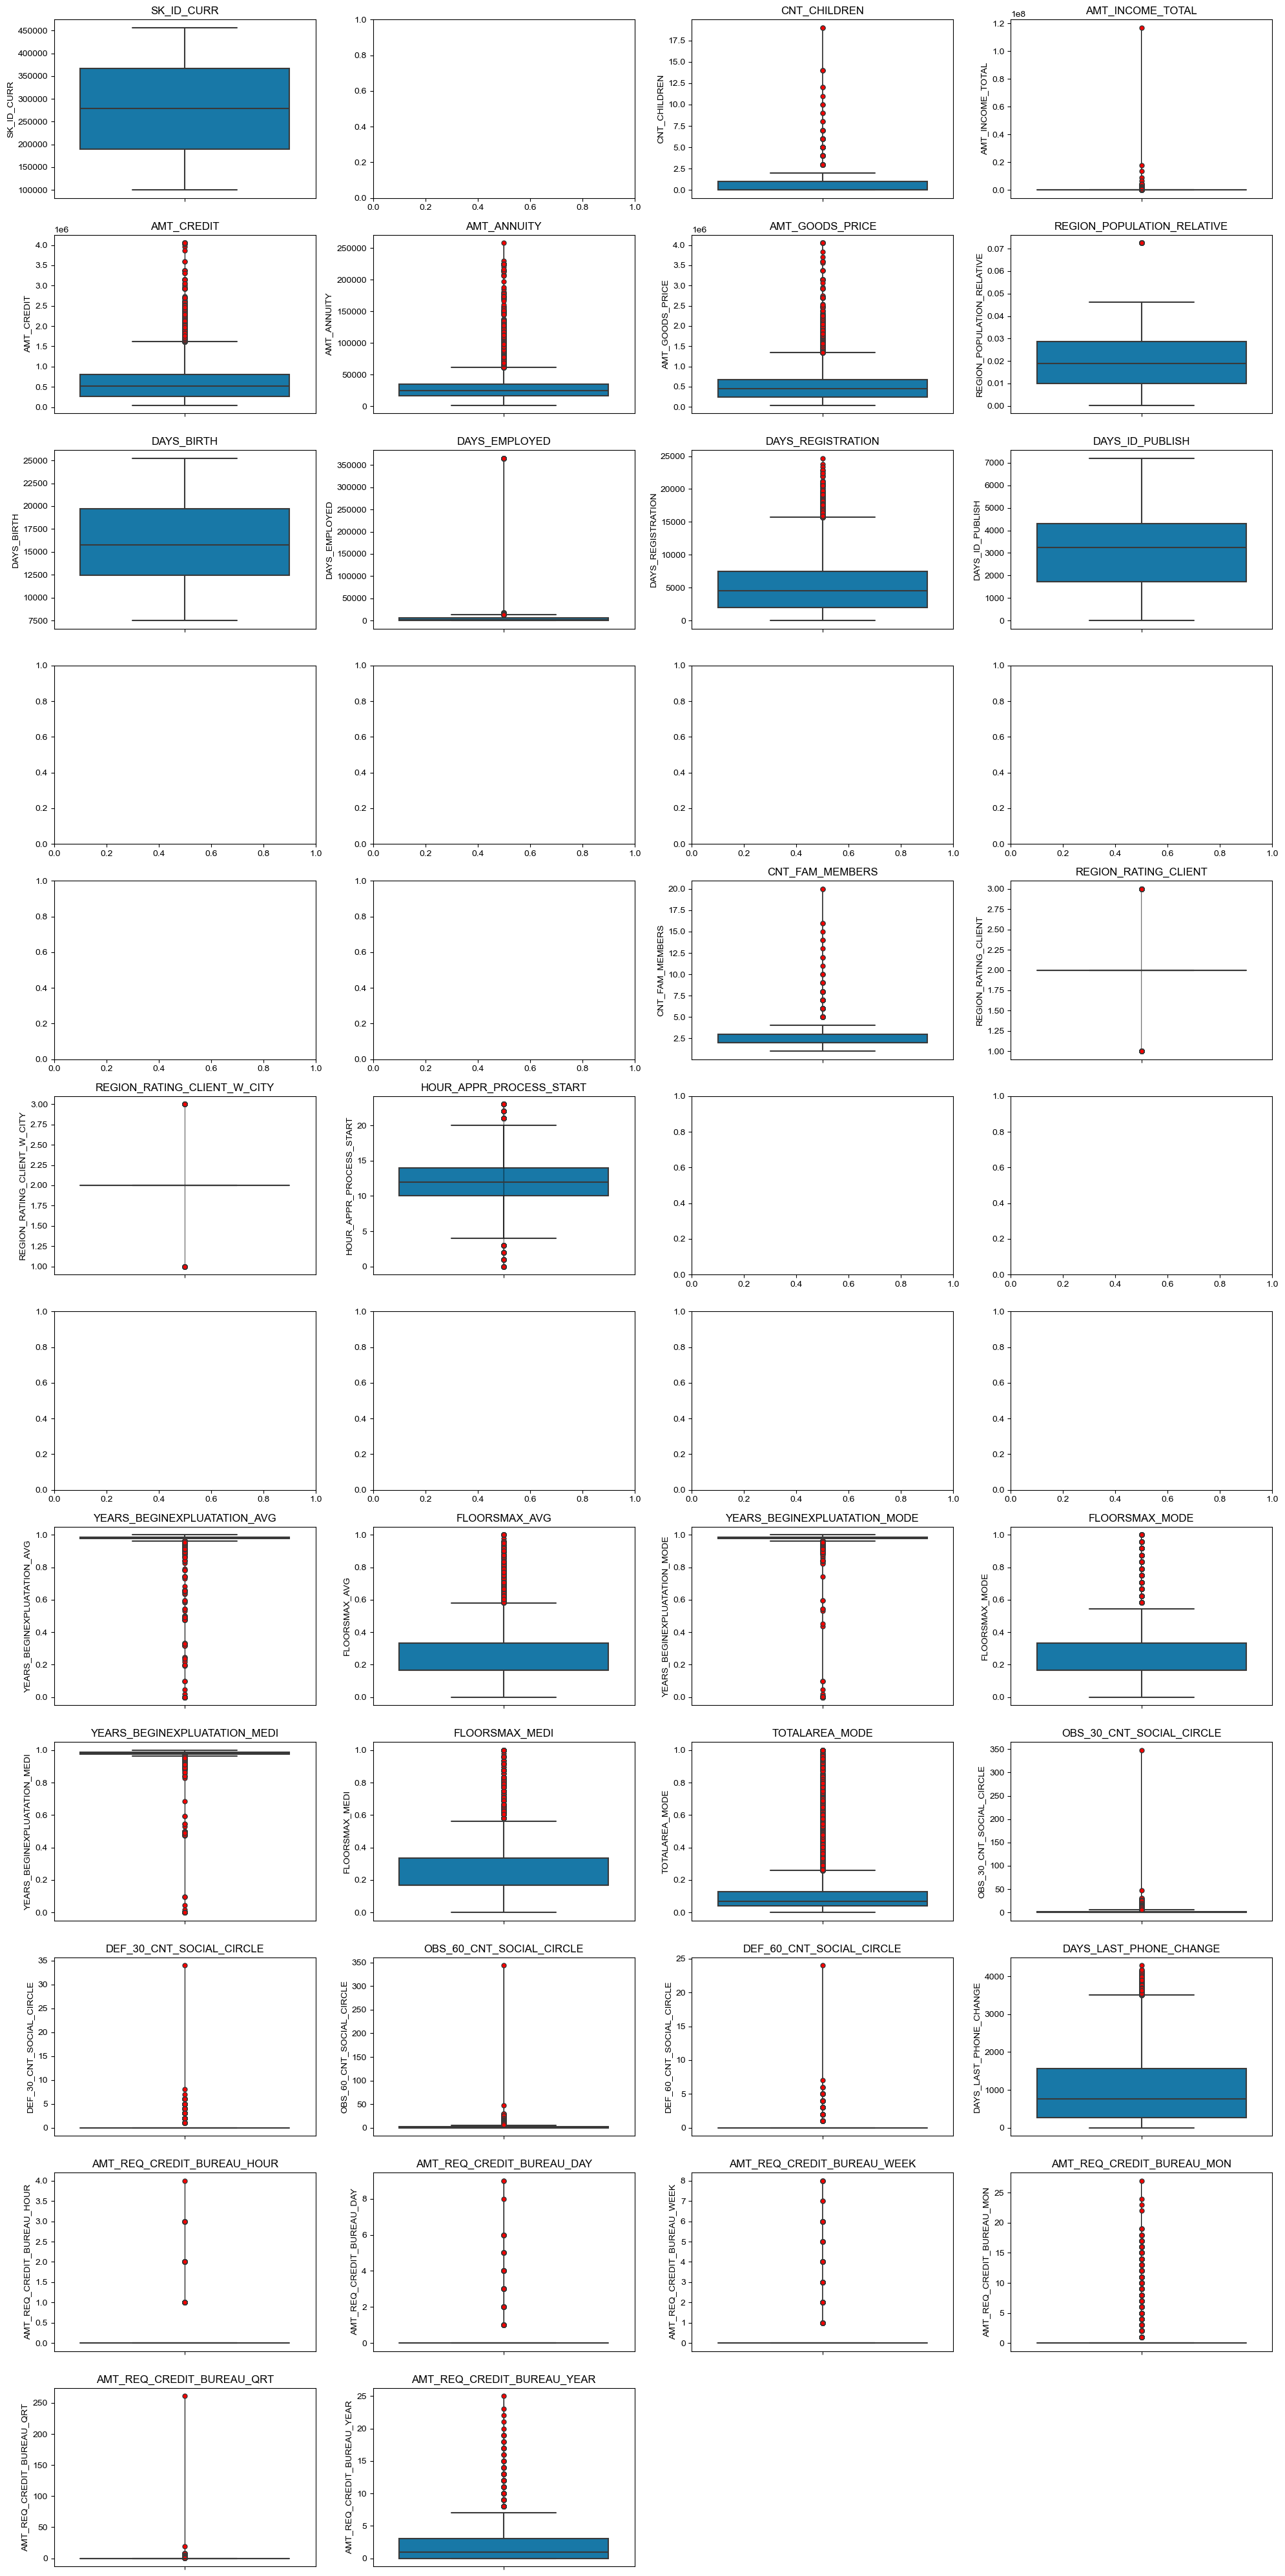

In [17]:
# Using boxplot to determine the outliers for quantitative variable in df_clean.

import math

# Number of numerical columns
ln = len(numerical_columns)

# calculation for subplots
n = 4
m = math.ceil(ln / n)
ct = 1

# Setting figure size
fig, axs = plt.subplots(m, n, figsize=(20, 40))

# Running in loop to plot all columns as subplot
for i, column in enumerate(numerical_columns):
    if df_clean[column].nunique() > 2:
        ax = axs[i // n][i % n]
        flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linewidth=0.5,
                          linestyle='-')

        data = df_clean[column]
        sns.set_style("darkgrid")
        sns.boxplot(ax=ax, y=data, palette="winter", flierprops=flierprops)

        ax.set_title(column)
        
# Remove empty subplots
if ln % n != 0:
    for i in range(ln % n, n):
        fig.delaxes(axs[-1][i])

# Show graphs
plt.tight_layout()
plt.show()


insight for line 17: Among the variables in the "df_clean" dataset, the following variables have prominent outliers:

- AMT_INCOME_TOTAL: The total income of applicants has outliers that are denoted by red 'o' in the box plot.
- AMT_CREDIT: The credit amount applied for by applicants also has outliers.
- AMT_ANNUITY: The annuity amount for applicants has outliers.
- DAYS_EMPLOYED: The number of days employed by applicants has outliers.
- DAYS_REGISTRATION: The number of days since registration has outliers.
- CNT_FAM_MEMBERS: The count of family members for applicants has outliers.
- DEF_30_CNT_SOCIAL_CIRCLE: The number of defaults observed in the applicant's social circle has outliers.
- AMT_REQ_CREDIT_BUREAU_*: Various variables related to credit bureau inquiries have outliers.
- INCOME_CREDIT_RT (Derived): A derived variable representing the ratio of income to credit amount has outliers.
- LTV_RT (Derived): Another derived variable representing the loan-to-value ratio has outliers.
- EMPLOYED_YEAR: The number of years employed by applicants has outliers.


In [18]:
# Review of stats for outlier columns from df_clean
outlier_list = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_EMPLOYED","DAYS_REGISTRATION","CNT_FAM_MEMBERS",
               "DEF_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
               "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
df_clean[outlier_list].describe(percentiles=[.25,.50,.75,.95])




CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
95%         2.000000      3.375000e+05  1.350000e+06   53325.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  DAYS_EMPLOYED  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
count     3.072330e+05  307511.000000      307511.000000    307509.000000   
mean      5.383962e+05   67724.742149        4986.120328         2.152665   
std       3.694465e+05  139443.751806        3522.886321         0.910682   
min       4.050000e+04       0.000000           0.000000         1.000000   
25%       2.385000e+05     933.000000        2010.000000         2.000000   
50%       4.500000e+05    2219.000000        4504.000000         2.000000   
75%       6.795000e+05    5707.000000        7479.500000         3.000000   
95%       1.305000e+06  365243.000000       11416.000000         4.000000   
max       4.050000e+06  365243.000000       24672.000000        20.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count             306490.000000               265992.000000   
mean                   0.143421                    0.006402   
std                    0.446698                    0.083849   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
95%                    1.000000                    0.000000   
max                   34.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
95%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
95%                     1.000000                   2.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               265992.000000  
mean                     1.899974  
std                      1.869295  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
95%                      6.000000  
max                     25.000000

In [19]:
numerical_columns = df_clean.select_dtypes(include='number').columns.tolist()
numerical_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT

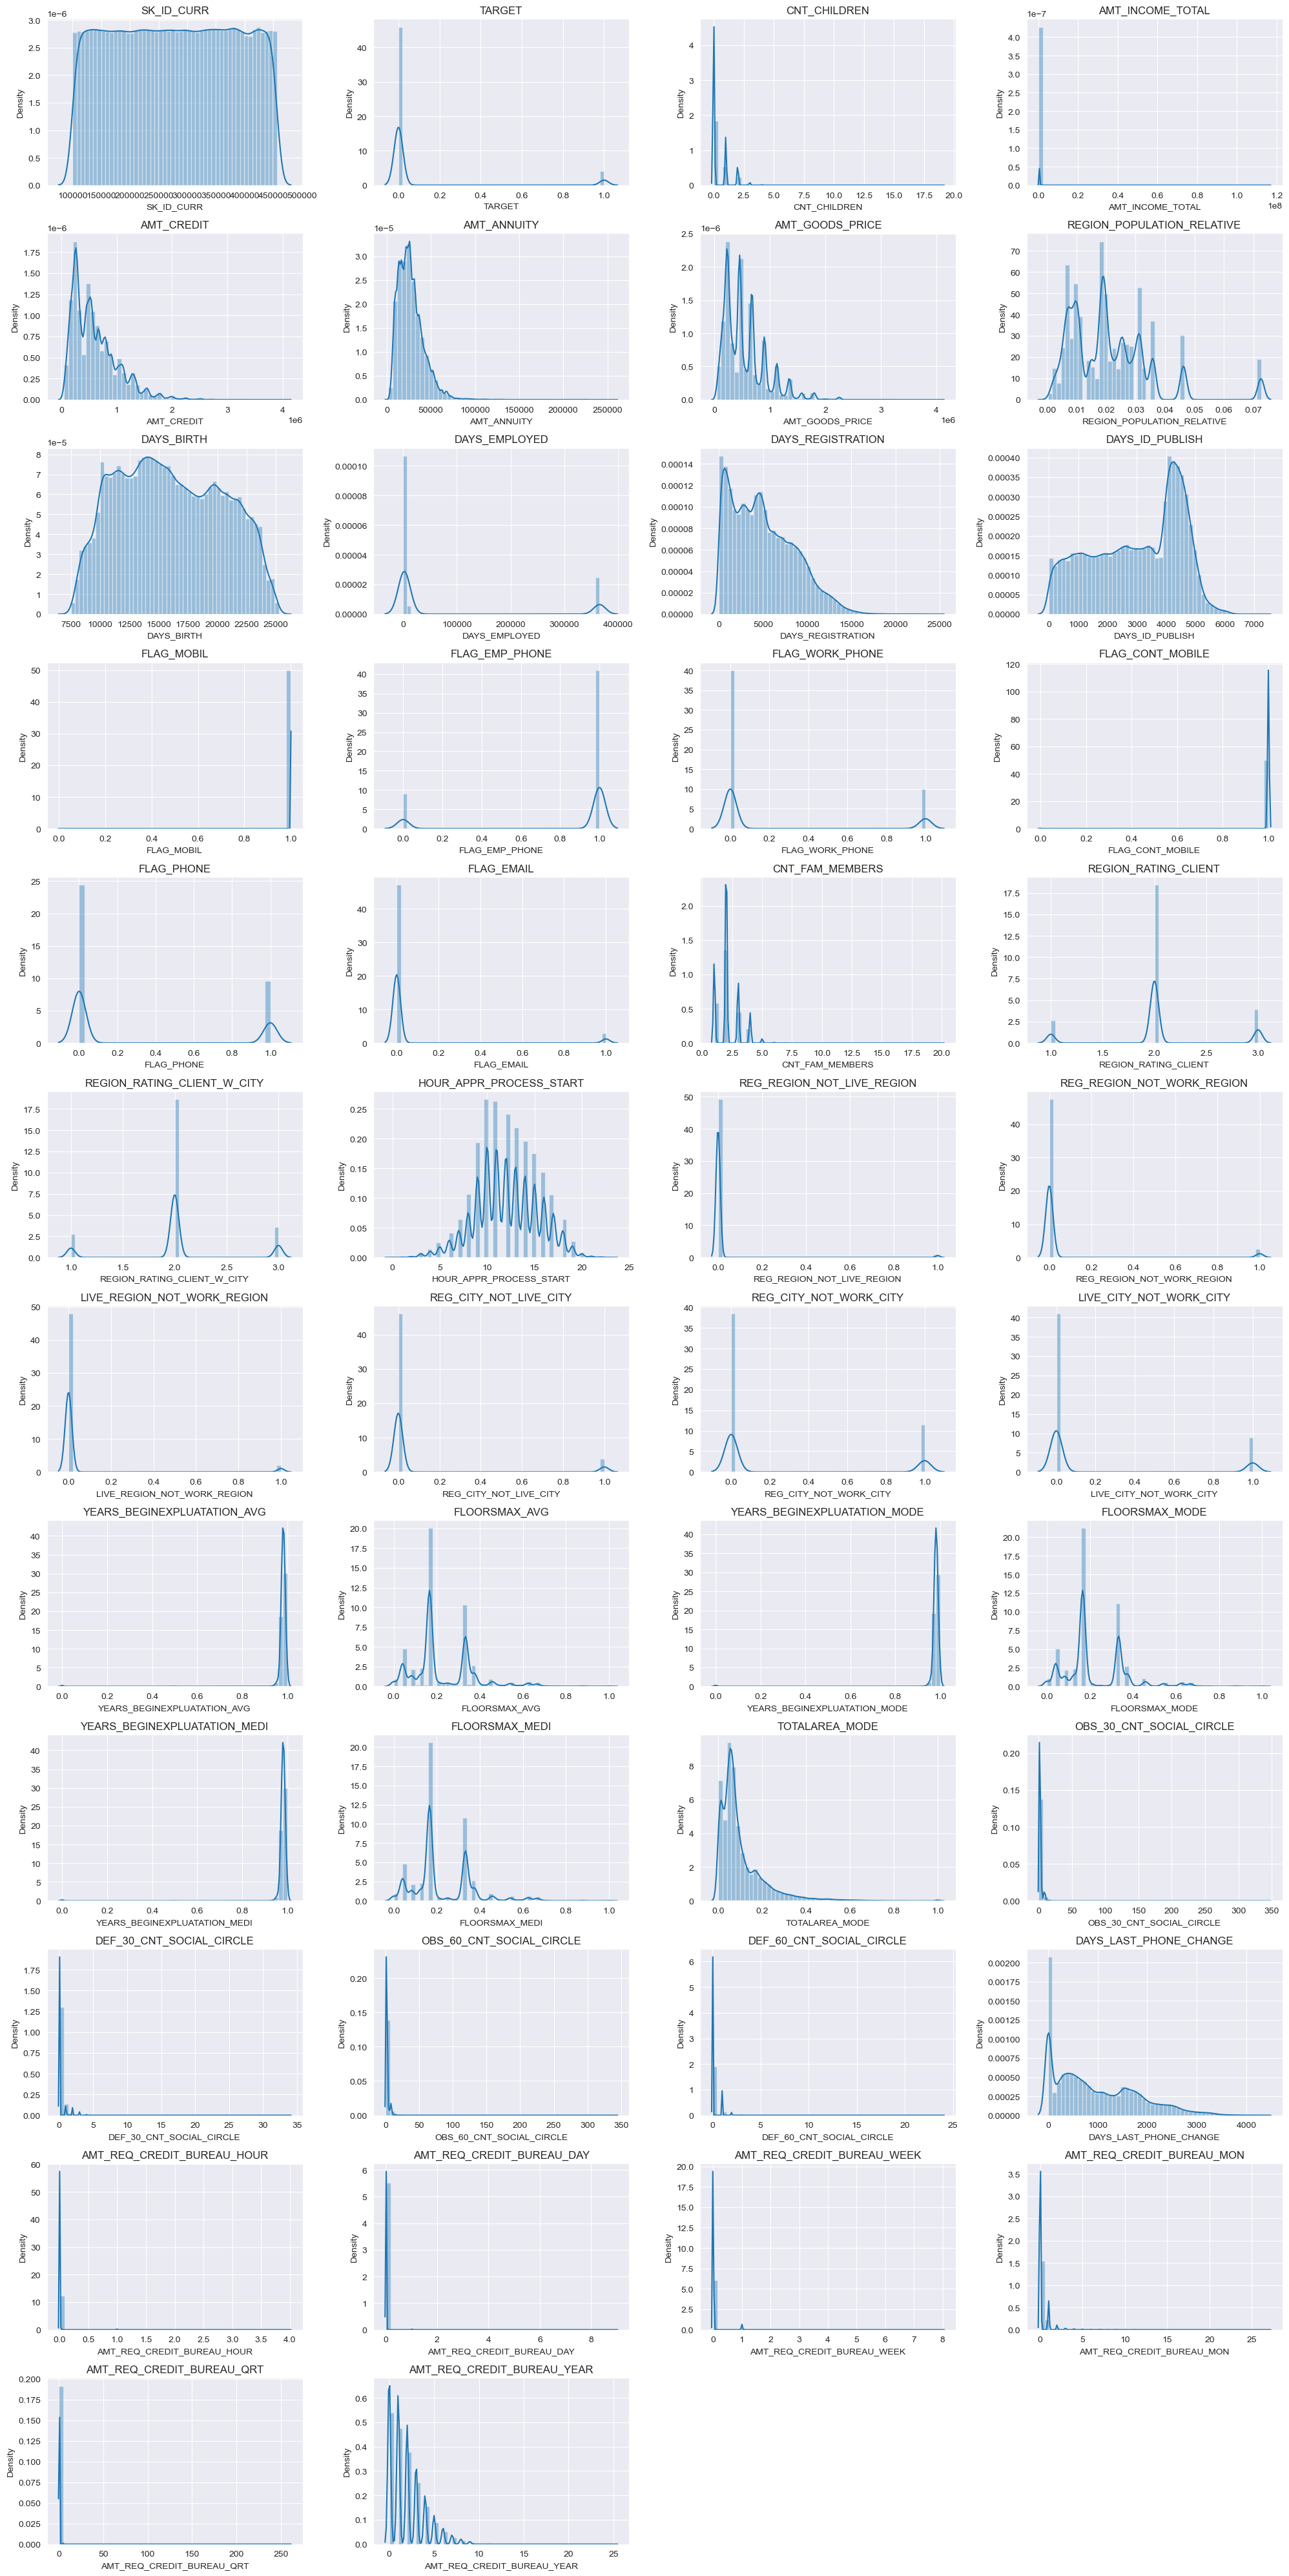

In [20]:
# Using histogram for quantitative variables - df_clean

# Number of numerical columns
ln = len(numerical_columns)

# Calculation for subplots
n = 4
m = (ln // n) + 1

# Setting figure size
fig, axes = plt.subplots(m, n, figsize=(20, 40))

# Running in loop to plot all columns as subplot
for i, column in enumerate(numerical_columns):
    row = i // n
    col = i % n

    # Plot histogram
    data = df_clean[column]
    sns.distplot(data.dropna(), ax=axes[row, col], hist=True)
    axes[row, col].set_title(column)

# Removing empty subplots
if ln < m * n:
    for i in range(ln, m * n):
        row = i // n
        col = i % n
        fig.delaxes(axes[row, col])

# Show graphs
plt.tight_layout()
plt.show()


line 20 insight: Outliers: Histograms also help in identifying outliers, which are values that fall far outside the expected range of the majority of the data points. Outliers can be observed as extreme values that are significantly distant from the other data points, often represented as bars that extend farther beyond the rest of the distribution. which has be done in line 17.

# 6. Remove Outliers from df_clean

In [21]:
# To remove Outliers from df_clean

# Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
# Upper cutoff = 75th percentile + 1.5 * (IQR)
# Lower cutoff = 25th percentile - 1.5 * (IQR)

def removeoutlier(df_clean,col):

    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=df_clean[col]

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)
    mask1 = (df_clean[col] > lower_cutoff) & (df_clean[col] < upper_cutoff)
    mask2 = (df_clean[col].isnull()==True)
#     print(col,lower_cutoff,upper_cutoff)
    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        return df_clean
        pass
    else:
        df_clean = df_clean.loc[mask1 | mask2]
        return df_clean


# # Running in loop to plot all columns as subplot
# We will not remove outliers from "DAYS_EMPLOYED"


for column in outlier_list:
    if(column!="DAYS_EMPLOYED"):
        df_clean = removeoutlier(df_clean,column)



In [22]:
# Review of df_clean dataframe after removing outliers
df_clean.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  269087.000000  269087.000000  269087.000000     269087.000000   
mean   278253.650288       0.083360       0.377201     149692.667699   
std    102799.406576       0.276426       0.640877      61000.804966   
min    100002.000000       0.000000       0.000000      25650.000000   
25%    189194.500000       0.000000       0.000000     108000.000000   
50%    278311.000000       0.000000       0.000000     135000.000000   
75%    367046.500000       0.000000       1.000000     180000.000000   
max    456255.000000       1.000000       2.000000     337050.000000   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.690870e+05  269077.000000     2.688260e+05   
mean   5.300438e+05   24511.576211     4.726503e+05   
std    3.182346e+05   11168.337289     2.846328e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.695500e+05   15808.500000     2.250000e+05   
50%    4.725000e+05   23580.000000     4.500000e+05   
75%    7.538400e+05   31576.500000     6.750000e+05   
max    1.558814e+06   57334.500000     1.345500e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               269087.000000  269087.000000  269087.000000   
mean                     0.020202   16042.292575   70579.574063   
std                      0.012841    4430.326738  141807.859710   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12309.000000     918.000000   
50%                      0.018850   15776.000000    2200.000000   
75%                      0.026392   19767.000000    6005.000000   
max                      0.072508   25201.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      269087.000000    269087.000000  269087.000000   269087.000000   
mean         5019.676573      2987.898156       0.999996        0.811949   
std          3494.642444      1507.204743       0.001928        0.390753   
min             0.000000         0.000000       0.000000        0.000000   
25%          2076.500000      1712.000000       1.000000        1.000000   
50%          4548.000000      3242.000000       1.000000        1.000000   
75%          7534.000000      4294.000000       1.000000        1.000000   
max         15781.000000      7197.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    269087.000000     269087.000000  269087.000000  269087.000000   
mean          0.199954          0.998261       0.276944       0.051861   
std           0.399966          0.041668       0.447489       0.221746   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    269086.000000         269087.000000                269087.000000   
mean          2.101540              2.076860                     2.057290   
std           0.844387              0.491714                     0.485548   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max           4.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            269087.000000               269087.000000   
mean                 12.008105                    0.013427   
std                   3.24359

In [23]:
#Converting DAYS into YEARS

# Derived column AGE_YEAR for Age in years for df_clean dataframe
df_clean["AGE_YEAR"]=(df_clean["DAYS_BIRTH"]//365)

In [24]:
# Derived column EMPLOYED_YEAR for Employed in years for df_clean dataframe
df_clean["EMPLOYED_YEAR"]=(df_clean["DAYS_EMPLOYED"]//365).astype(int)

In [25]:
# Derived column INCOME_CREDIT_RT for INCOME to CREDIT Ratio for df_clean dataframe
df_clean["INCOME_CREDIT_RT"]=round((df_clean["AMT_INCOME_TOTAL"]/df_clean["AMT_CREDIT"]),2)

In [26]:
# Derived column LTV_RT (Loan-to-value) for GOODS_PRICE to CREDIT Ratio for df_clean dataframe
df_clean["LTV_RT"]=round((df_clean["AMT_GOODS_PRICE"]/df_clean["AMT_CREDIT"]),2)

In [27]:
#Binning of Continous Variables

# Bining population ranges according to their normalized values.
# Less than 0.03       : LOW_POPULATION
# Between 0.03 and 0.06 : MID_POPULATION
# Greater than 0.06    : HIGH_POPULATION

df_clean['CATEGORY_REGION_POPULATION'] = pd.cut(x = df_clean['REGION_POPULATION_RELATIVE'], 
                                                   bins = [0, .03, .06, 1.0],
                                                   labels = ['LOW','MED','HIGH'])

In [28]:
# Bining df_clean["AGE_YEAR"] to Age by Decades.

df_clean['AGE_BY_DECADES'] = pd.cut(x=df_clean["AGE_YEAR"], 
                                             bins=[20, 29, 39, 49, 59, 69], 
                                             labels=['20s', '30s', '40s', '50s', '60s'])



In [29]:
df_clean['CATEGORY_WORK_EXPERIENCE'] = pd.cut(x=df_clean["EMPLOYED_YEAR"], 
                                             bins=[-1, 0, 2, 3, 6, 10, 45], 
                                             labels=['Not Experinced','Fresher', 'Entry Level', 'Mid Level', 'Senior Level', 'Higher Senior Level'])



In [30]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_clean['AMT_INCOME_RANGE']=pd.cut(df_clean['AMT_INCOME_TOTAL'],bins,labels=slot)

In [31]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df_clean['AMT_CREDIT_RANGE']=pd.cut(df_clean['AMT_CREDIT'],bins=bins,labels=slots)

# 7. Checking Imbalance Percentage.

In [32]:
# Checking the imbalance percentage w.r.t TARGET column.

(df_clean['TARGET'].value_counts(normalize=True)*100).round(2)

TARGET
0    91.66
1     8.34
Name: proportion, dtype: float64

Insight for line 32: 
- 91.66% of the records have a "TARGET" value of 0, indicating that the majority of the records in the dataset are classified as non-defaulters.
- 8.34% of the records have a "TARGET" value of 1, indicating that a smaller proportion of records in the dataset are classified as defaulters.
This insight suggests that there is a significant class imbalance in the "TARGET" variable, with a majority of the observations belonging to the non-default class. 

In [33]:
# Creating two separate dataframes target_1 and target_0

target_1 = df_clean[df_clean['TARGET'] == 1]
target_0 = df_clean[~df_clean.isin(target_1)]


df_target_1 = df_clean[df_clean['TARGET'] == 1]
df_target_0 = df_clean[df_clean['TARGET'] == 0]



# 8. Univariate Analysis on Target 0 and 1 Datasets

In [34]:
# Take out categorical variables from appilaction clean for target_1 and target_0
# List Categorical Variables from df_clean

categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_columns


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

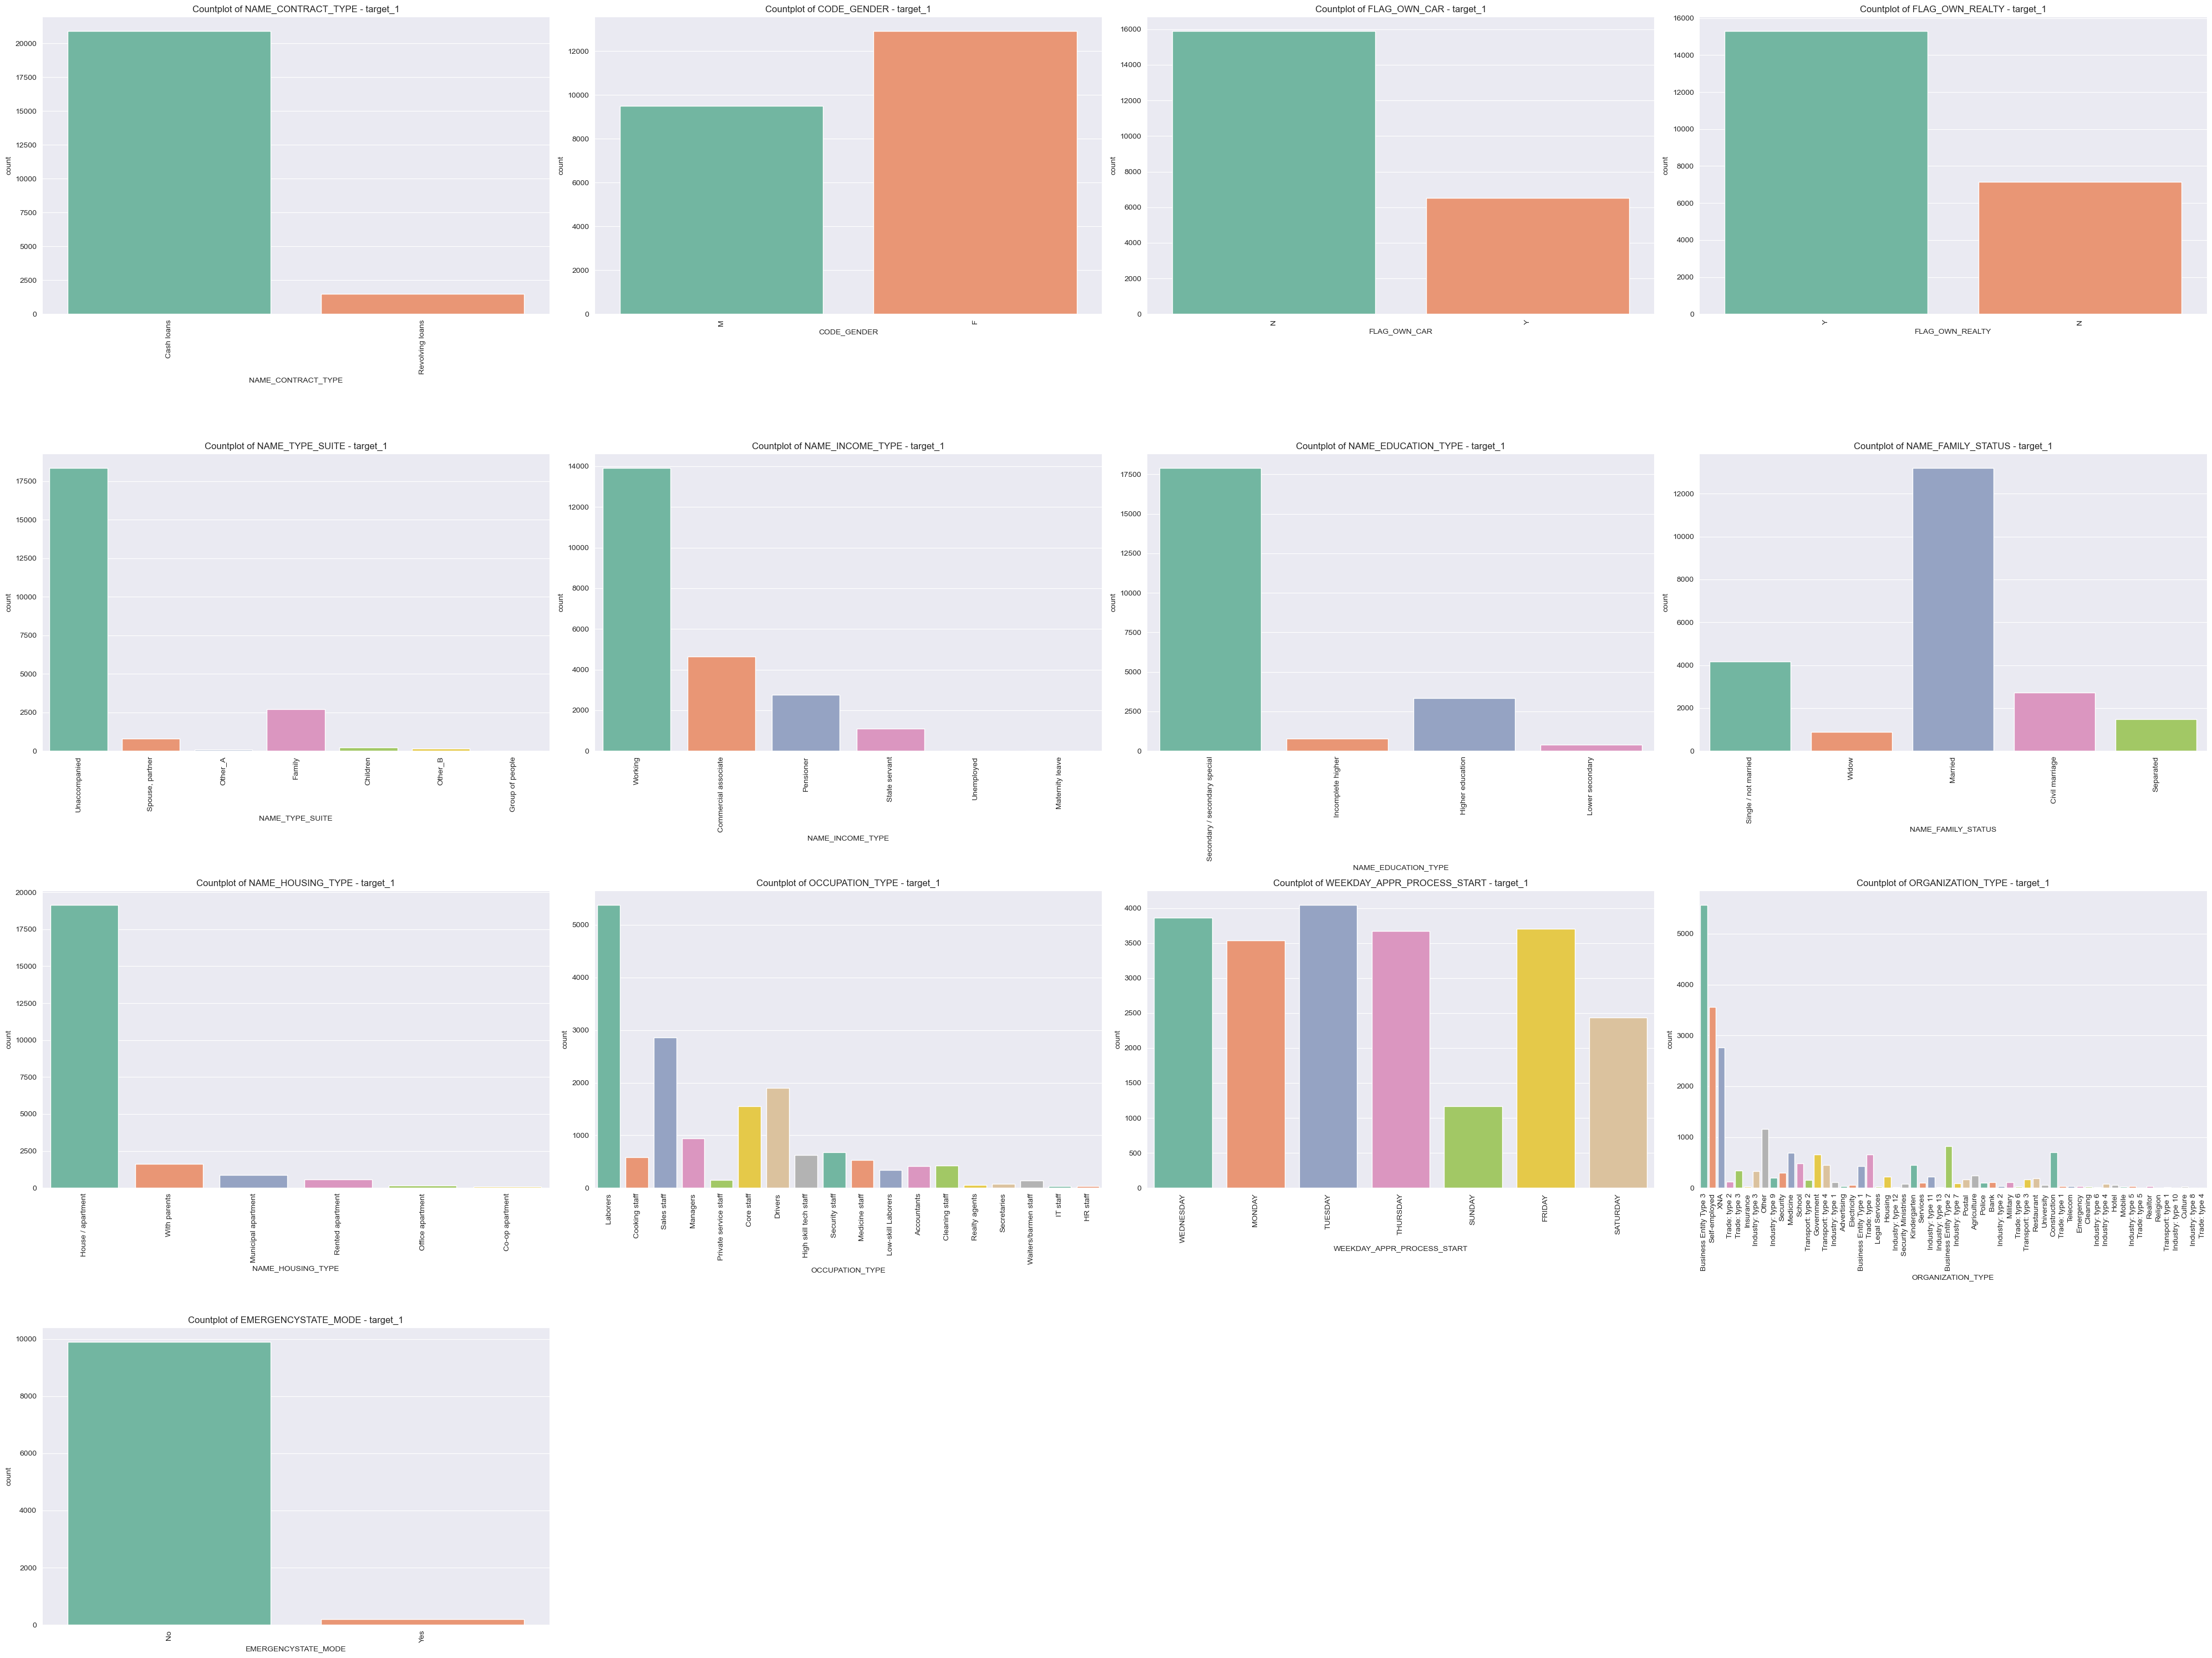

In [35]:
# Countplot for these categorical variables - target_1

# Number of categorical columns
ln = len(categorical_columns)

# Calculation for subplots
n = 4
m = (ln // n) + 1
ct = 1

# Setting figure size
plt.figure(2, figsize=(40, 30))

# Running in loop to plot all columns as subplots
for column in categorical_columns:
    plt.subplot(m, n, ct)
    
    plt.xticks(rotation=90)
    sns.countplot(x=column, data=target_1, palette='Set2')
    plt.title(f'Countplot of {column} - target_1')
    ct += 1

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()


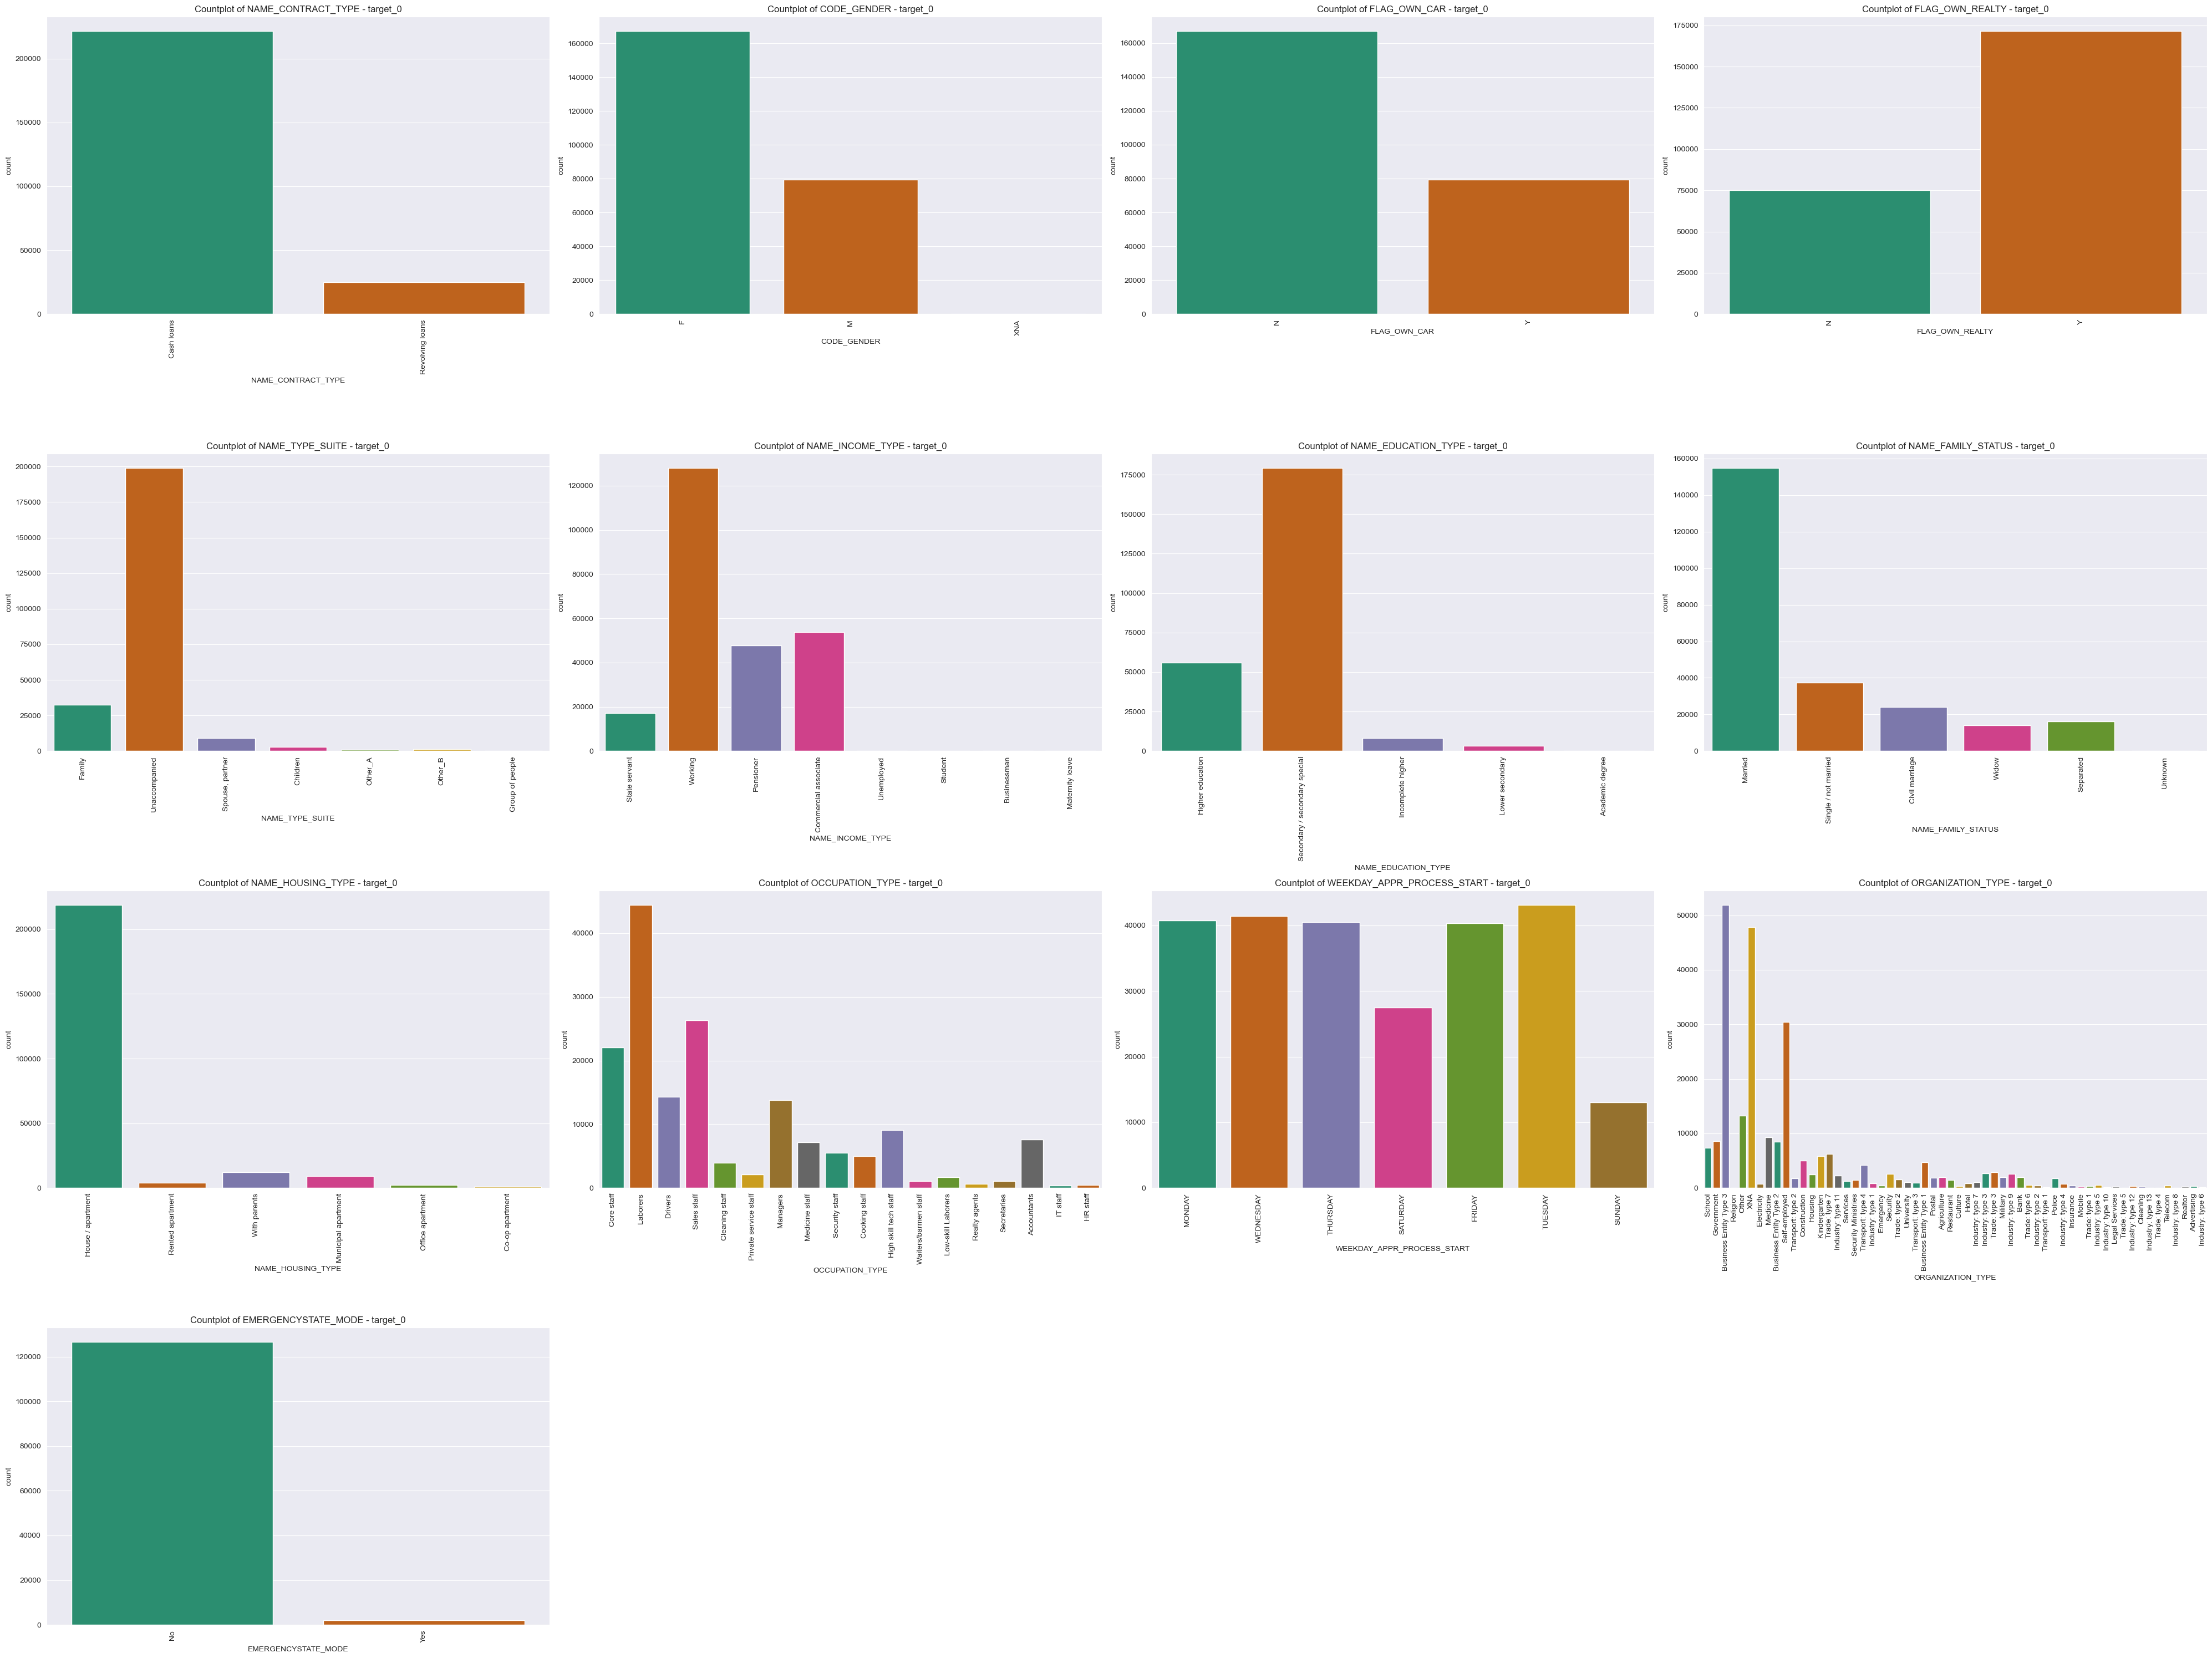

In [36]:
# Countplot for these categorical variables - target_0

# Number of cat egorical columns
ln = len(categorical_columns)

# Calculation for subplots
n = 4
m = (ln // n) + 1
ct = 1

# Setting figure size
plt.figure(2, figsize=(40, 30))

# Running in loop to plot all columns as subplots
for column in categorical_columns:
    plt.subplot(m, n, ct)
    
    plt.xticks(rotation=90)
    sns.countplot(x=column, data=target_0, palette='Dark2')
    plt.title(f'Countplot of {column} - target_0')
    ct += 1

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()


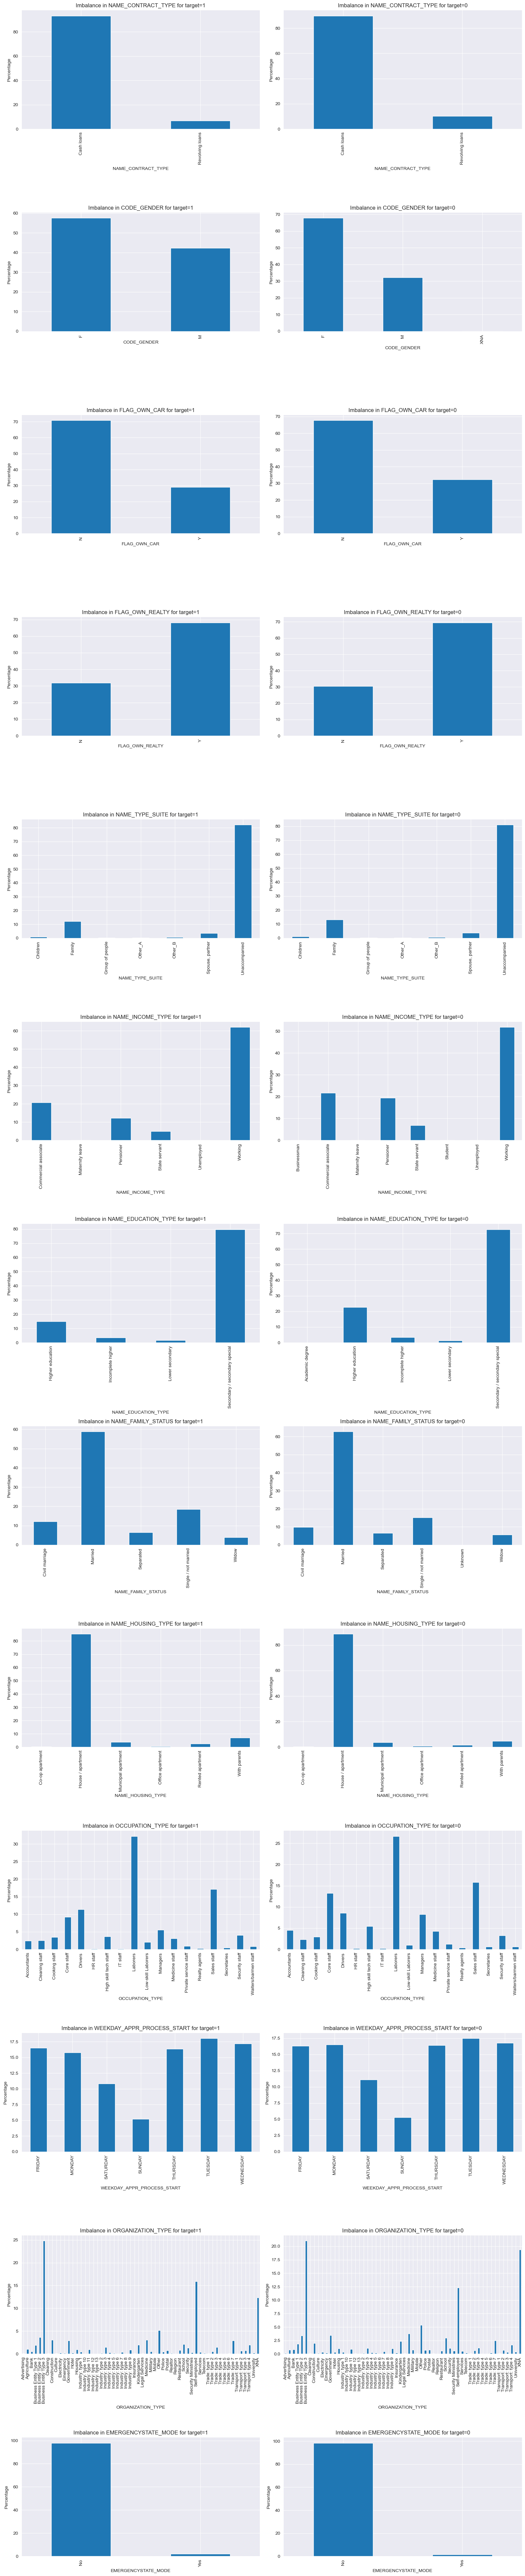

In [37]:
# Imbalance Calculation - Bar Chart for these categorical variables - df_clean for target_1 and target_0

# Calculate the value counts of each category in target_1 and target_0

target_1_counts = {columns: target_1[columns].value_counts(normalize=True) * 100 for columns in categorical_columns}
target_0_counts = {columns: target_0[columns].value_counts(normalize=True) * 100 for columns in categorical_columns}

#Plot bar charts for each categorical variable in target1_df and target0_df
fig, axes = plt.subplots(len(categorical_columns), 2, figsize=(16, 6*len(categorical_columns)))

for i, columns in enumerate(categorical_columns):
    ax1 = axes[i][0]
    ax2 = axes[i][1]
    
    target_1_counts[columns].sort_index().plot(kind='bar', ax=ax1)
    target_0_counts[columns].sort_index().plot(kind='bar', ax=ax2)
    
    ax1.set_title(f'Imbalance in {columns} for target=1')
    ax2.set_title(f'Imbalance in {columns} for target=0')
    
    ax1.set_xlabel(columns)
    ax1.set_ylabel('Percentage')
    
    ax2.set_xlabel(columns)
    ax2.set_ylabel('Percentage')
    
plt.tight_layout()
plt.show()



Insight for Imbalance Data:

In the case of the CONTRACT_TYPE column, over 90% of the population consists of 'Cash loans'. This indicates that there is a significant disproportion in the distribution of contract types, with a lack of representation of other types of loans.

Similarly, the NAME_TYPE_SUITE column reveals an imbalance where over 80% of the population consists of 'Unaccompanied'. This suggests that there may be a lack of diversity in the types of individuals included in the dataset, potentially limiting the insights derived from the analysis.

The NAME_HOUSING_TYPE column also exhibits an imbalance, with over 80% of the population representing 'House/apartment' as the housing type. This imbalance may affect any analysis related to housing types and their impact on credit applications or other relevant factors. 


# 7. Categorical Univariate Analysis on target_1 (Client with Payment Difficulty) 

In [38]:
#Categorical Univariate Analysis on target_1 (Client with no Payment Difficulty) Datasets - Demo View

# Count plotting in logarithmic scale

def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4 * len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='winter')
    ax.set_yscale('log')
    
    plt.show()


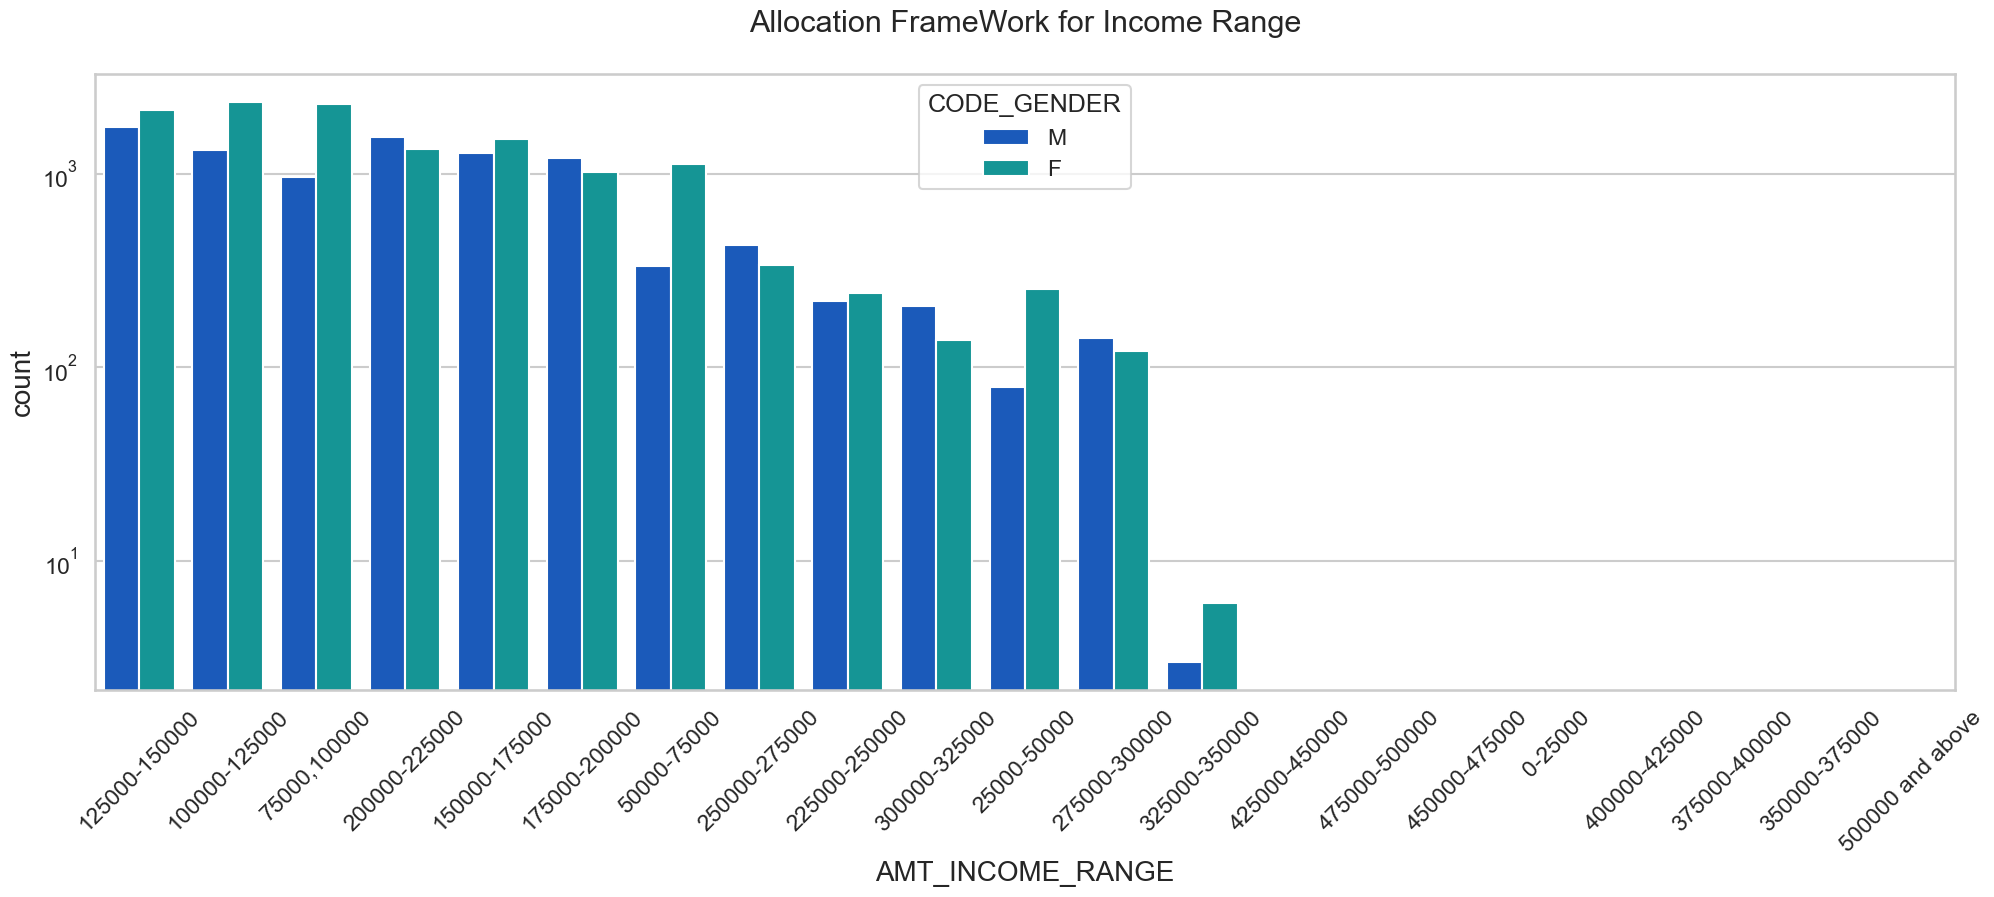

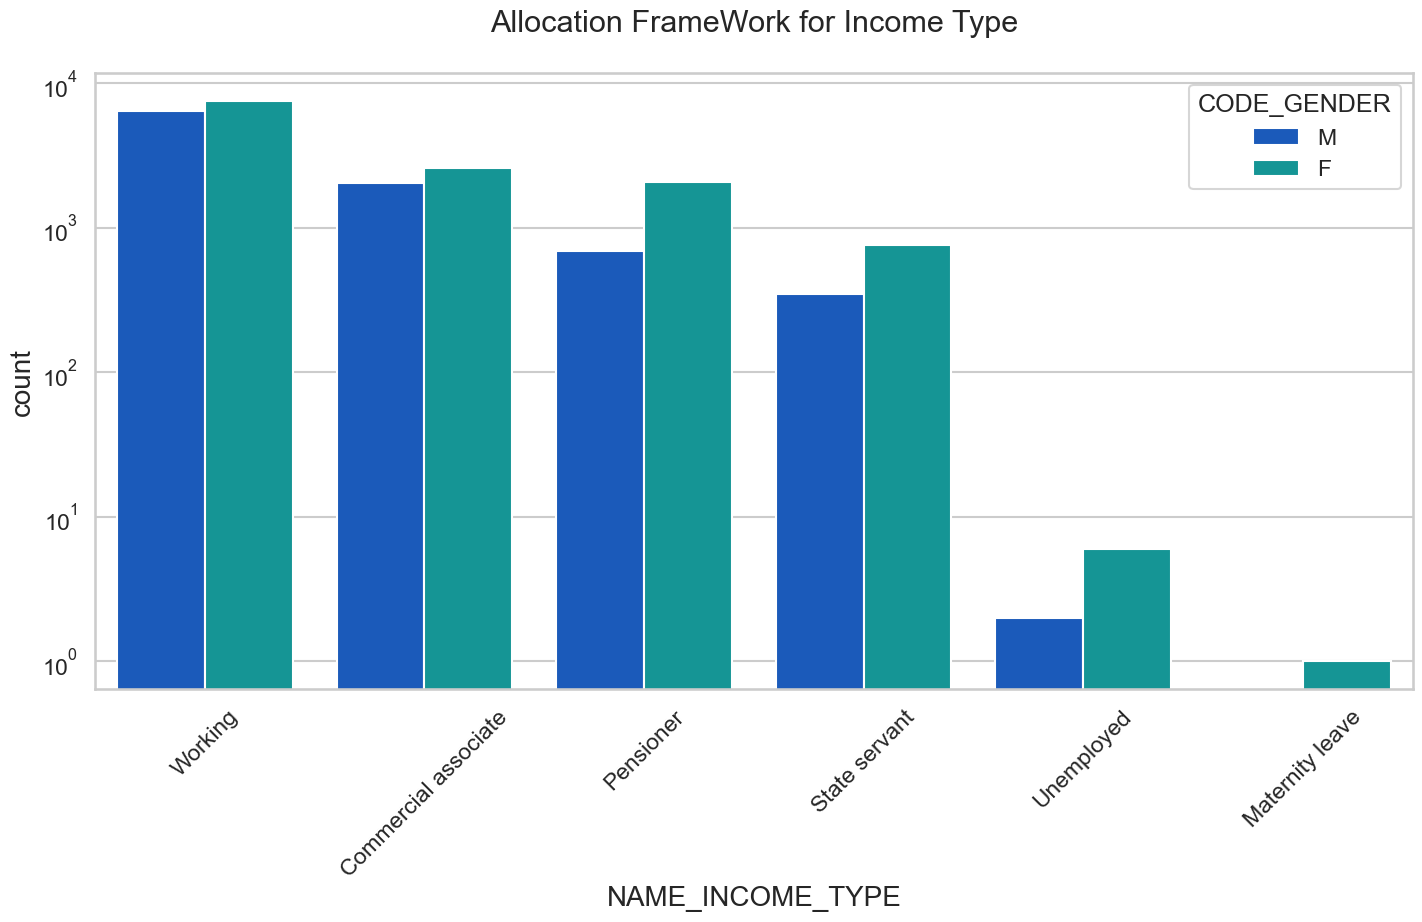

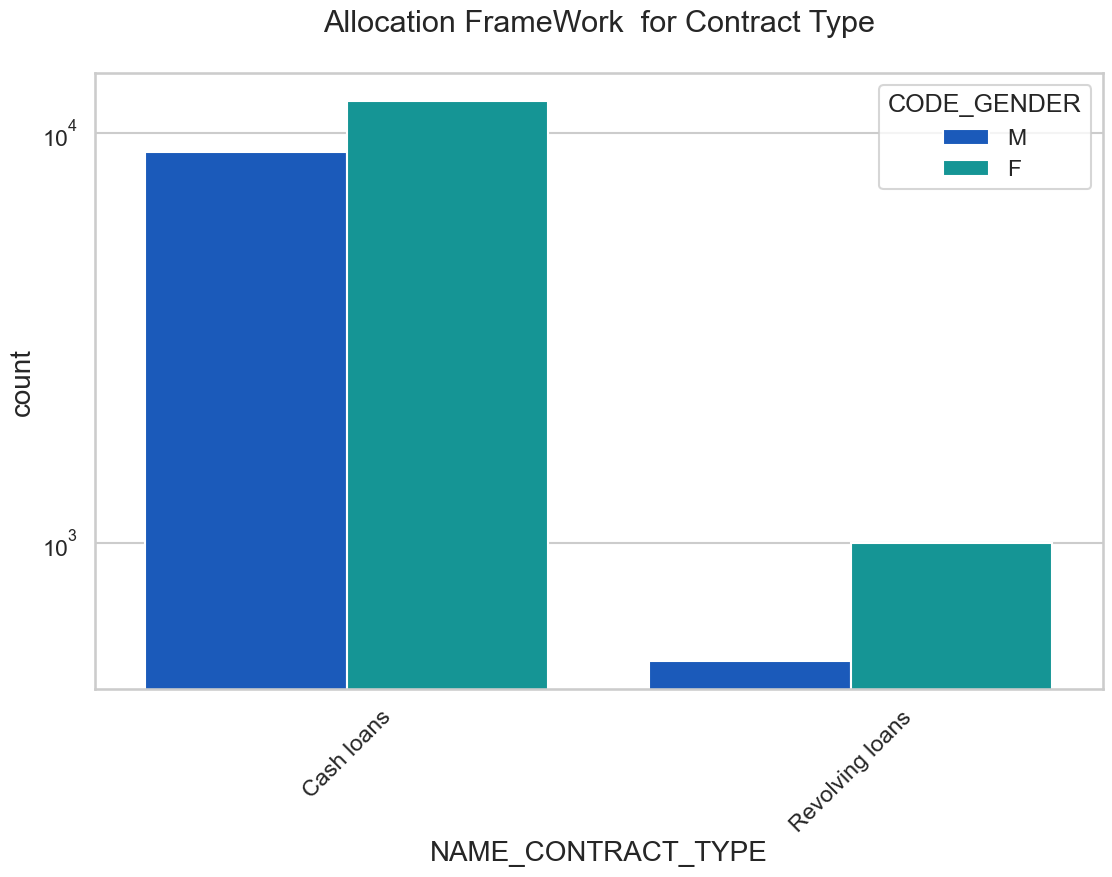

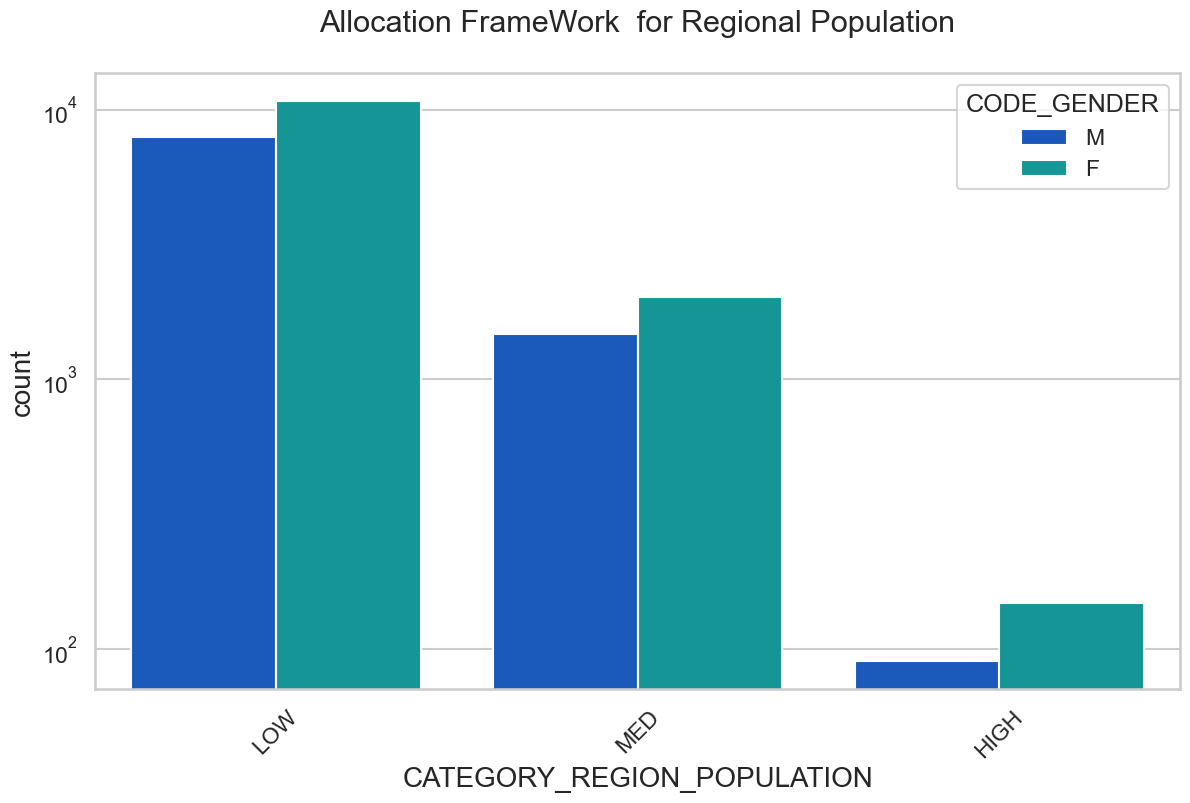

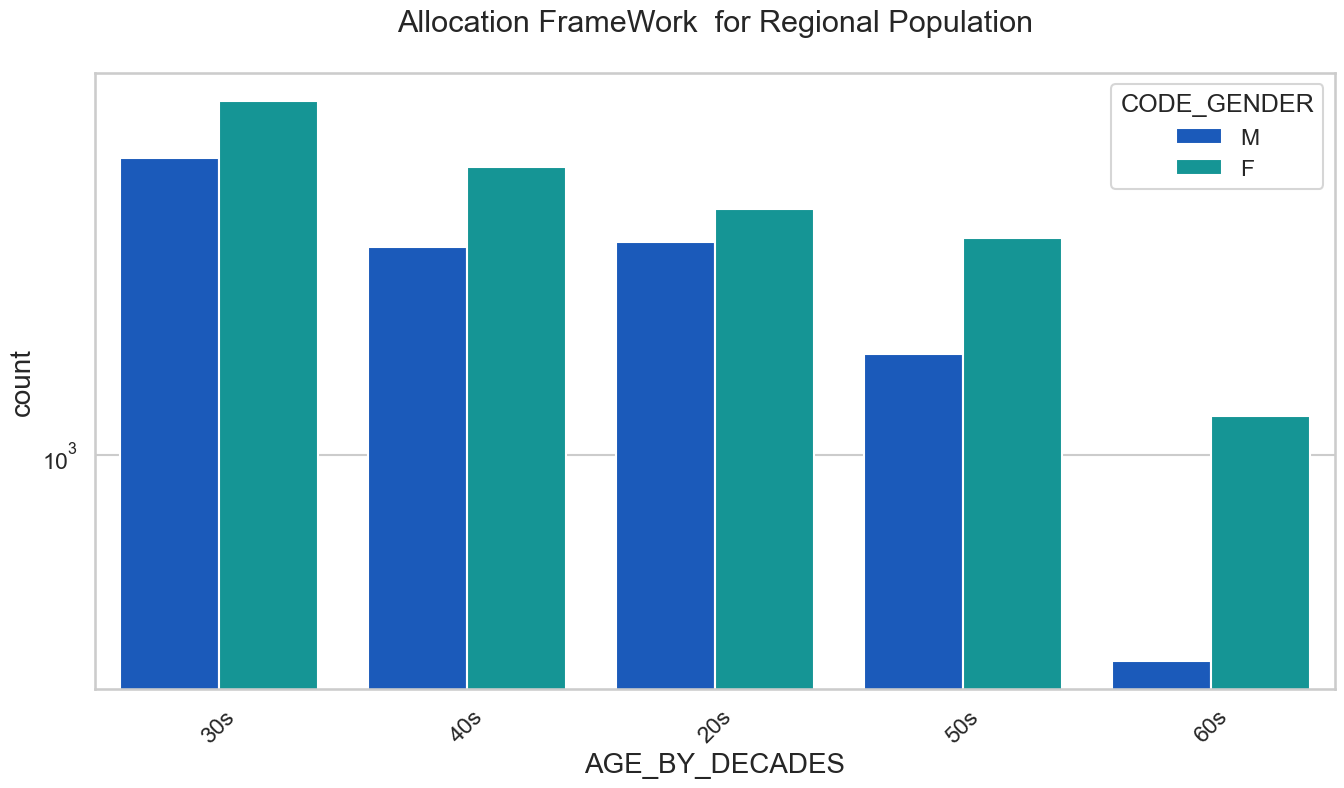

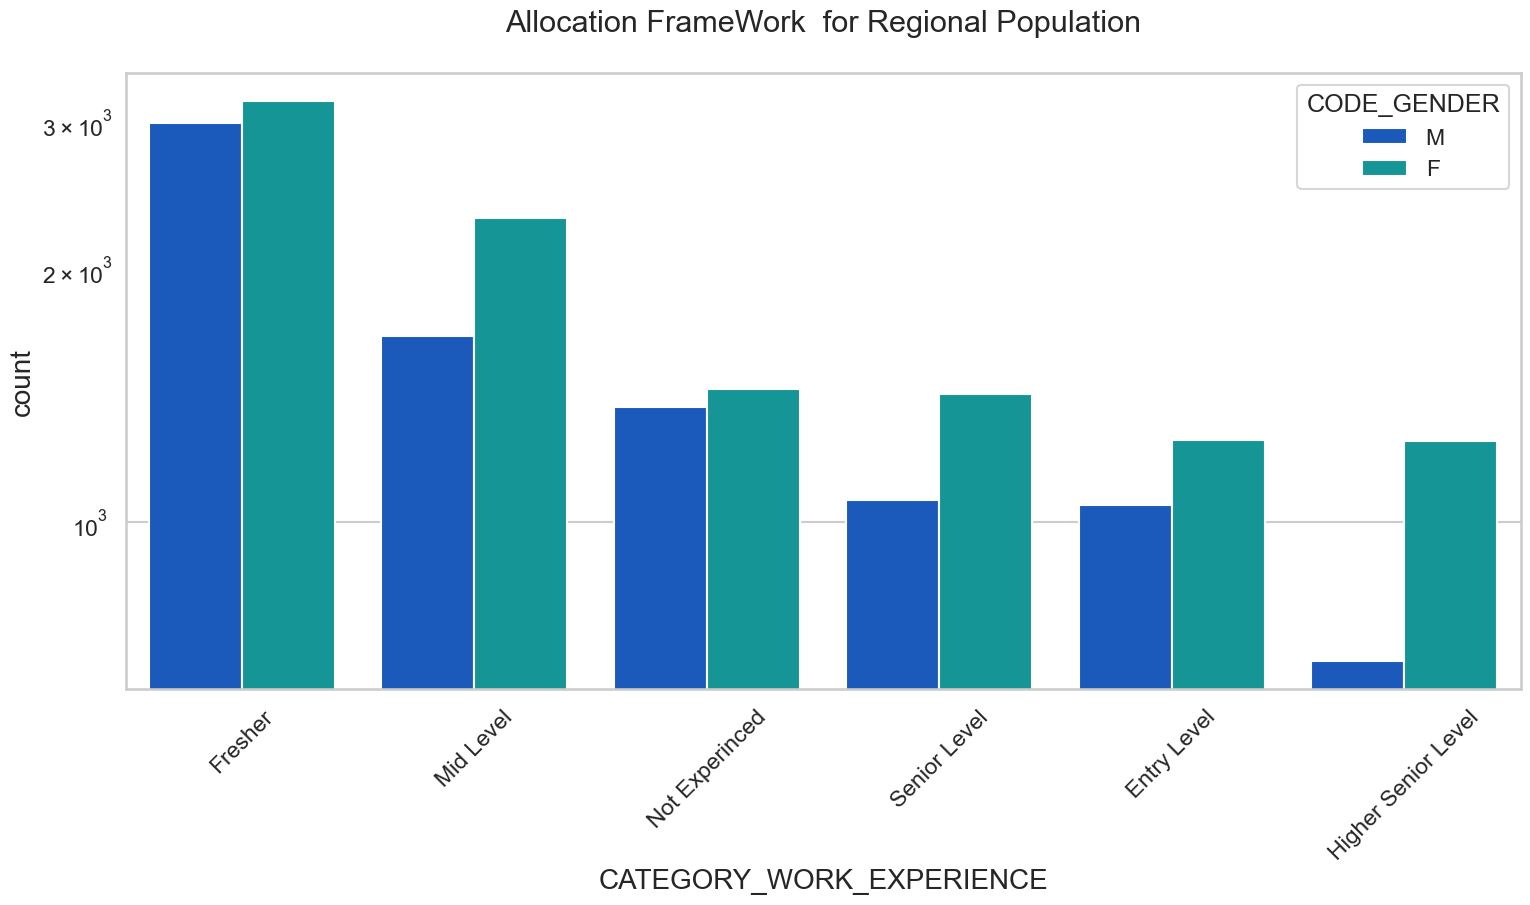

In [39]:
# PLotting for income range

uniplot(df_target_1, 'AMT_INCOME_RANGE', 'Allocation FrameWork for Income Range', hue='CODE_GENDER')

# Plotting for Income type

uniplot(df_target_1, 'NAME_INCOME_TYPE', 'Allocation FrameWork for Income Type', hue='CODE_GENDER')

# Plotting for Contract type

uniplot(df_target_1, 'NAME_CONTRACT_TYPE', 'Allocation FrameWork  for Contract Type', hue='CODE_GENDER')

# Plotting for Region Population

uniplot(df_target_1, 'CATEGORY_REGION_POPULATION', 'Allocation FrameWork  for Regional Population', hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(df_target_1, 'AGE_BY_DECADES', 'Allocation FrameWork  for Regional Population', hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(df_target_1, 'CATEGORY_WORK_EXPERIENCE', 'Allocation FrameWork  for Regional Population', hue='CODE_GENDER')


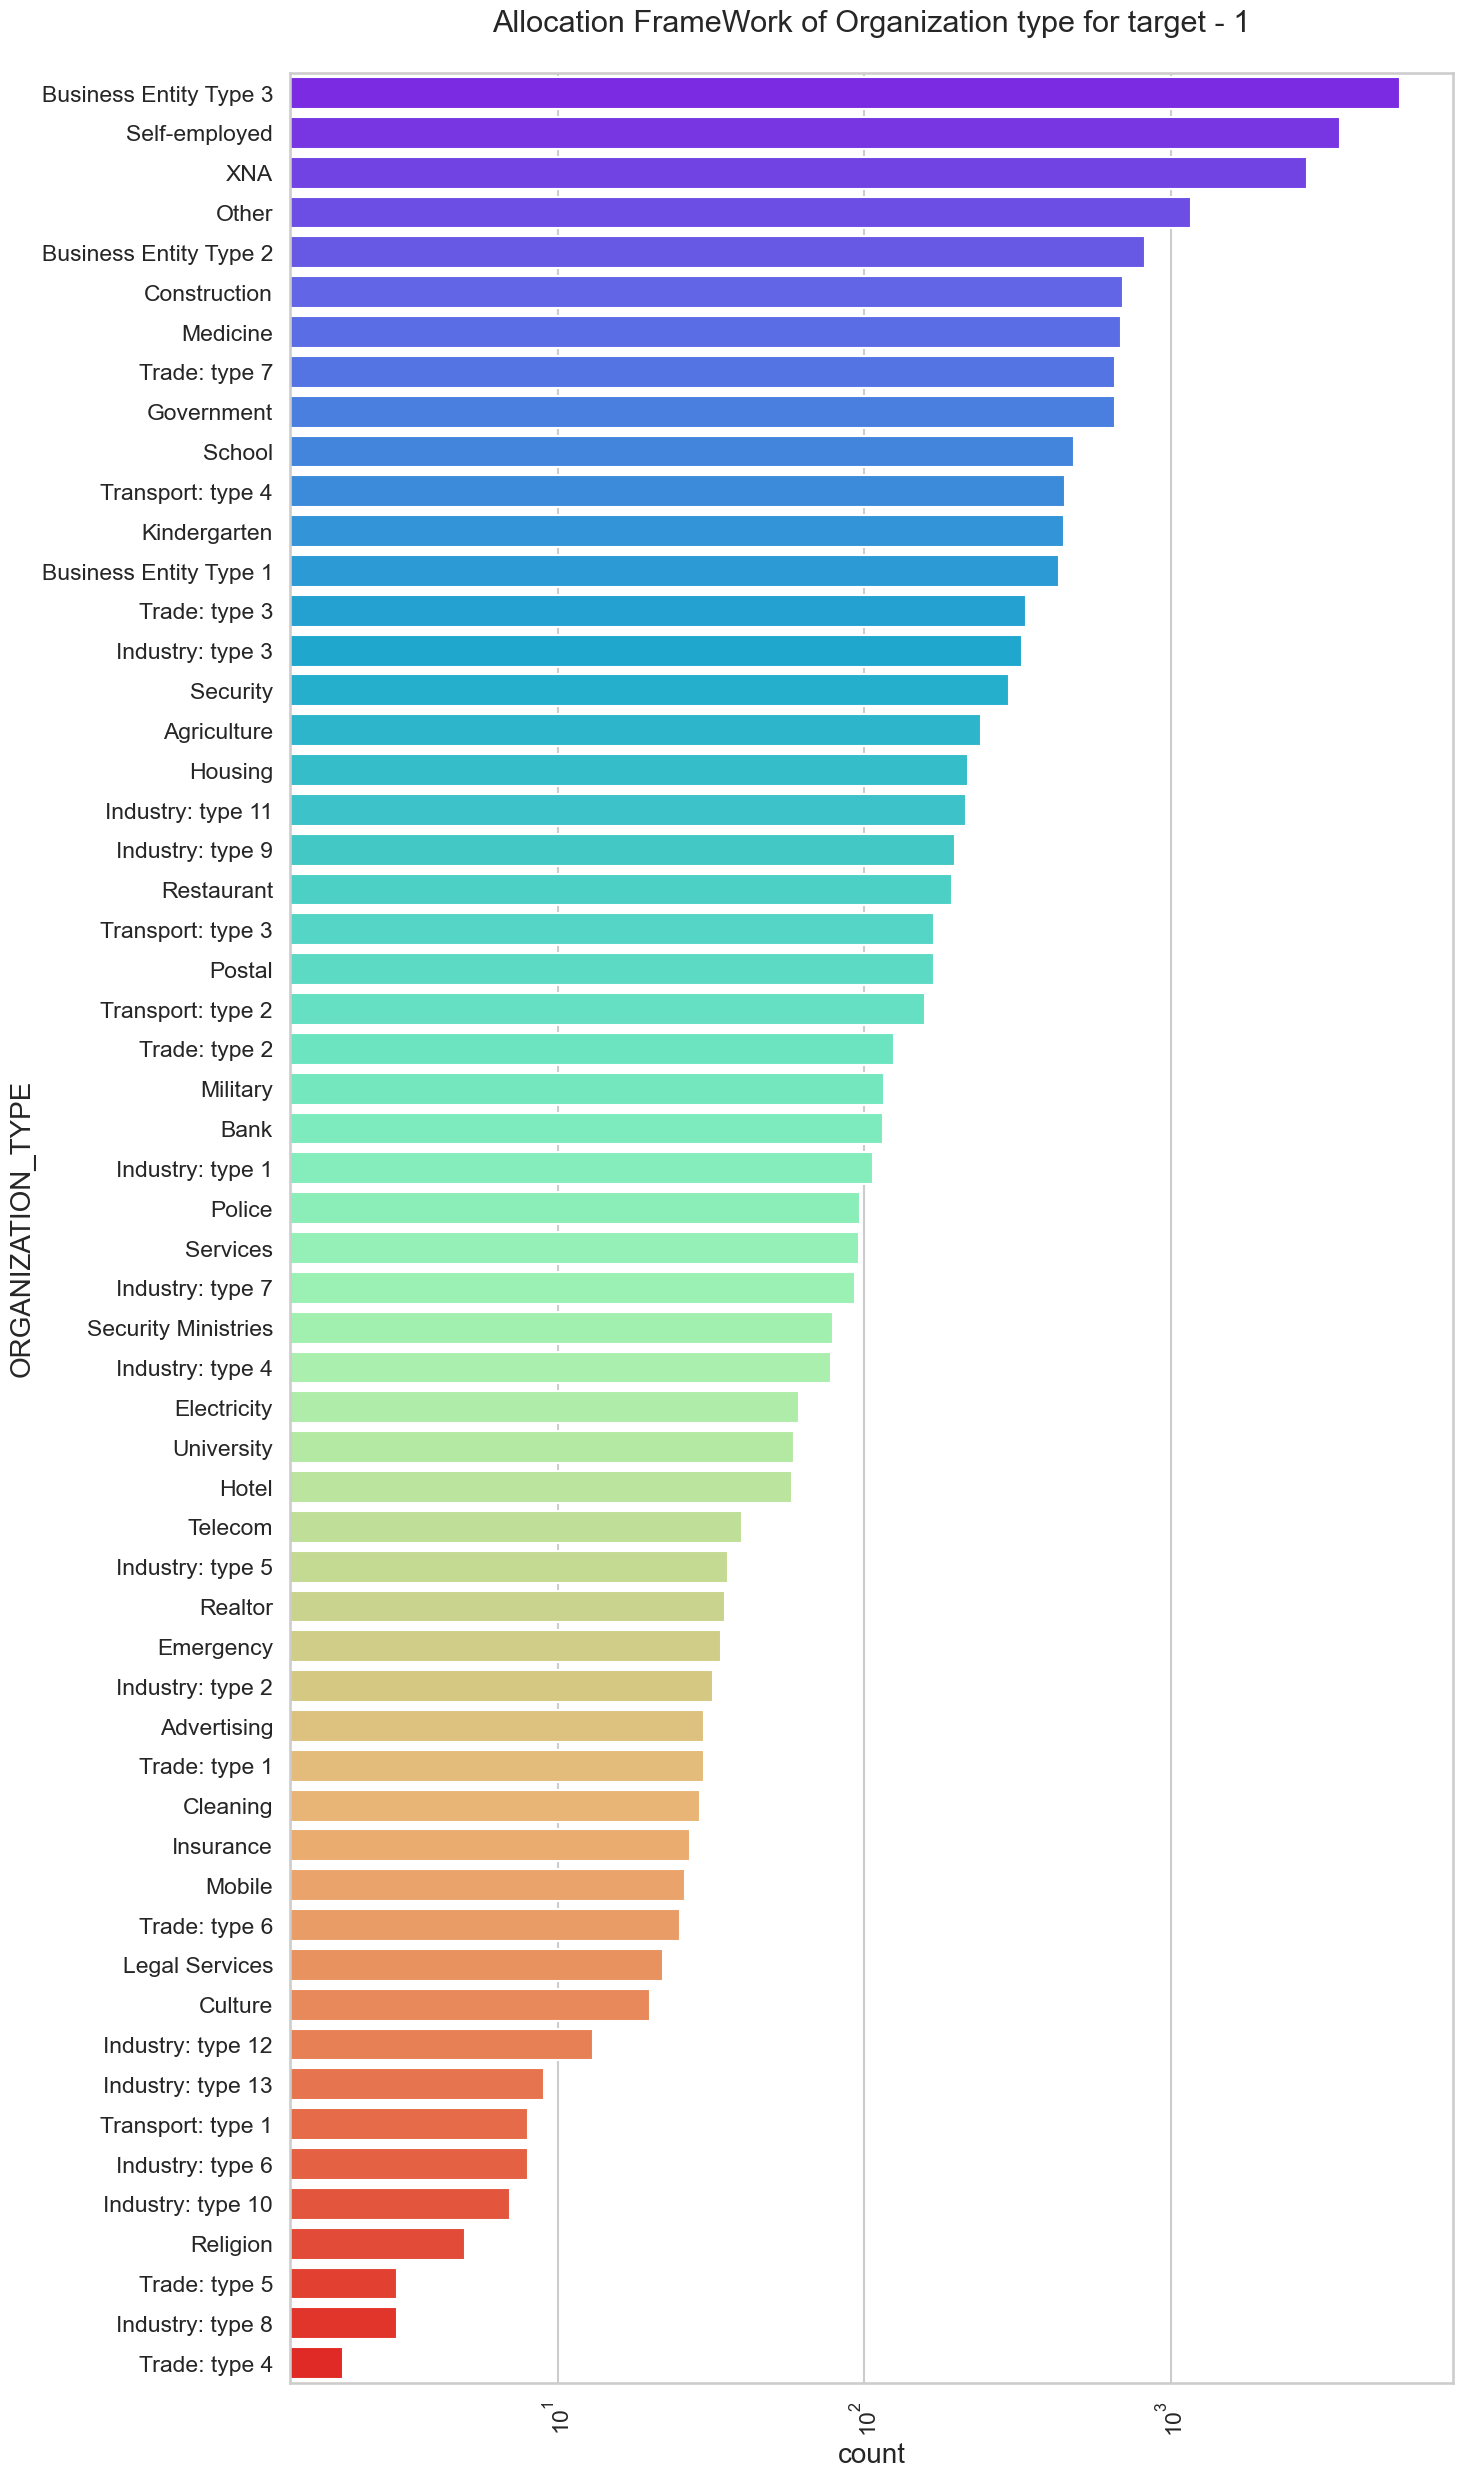

In [40]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Allocation FrameWork of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

ax = sns.countplot(data=df_target_1, y='ORGANIZATION_TYPE', order=df_target_1['ORGANIZATION_TYPE'].value_counts().index,palette='rainbow')

plt.show()




Based on the analysis on Target 1(Client with payment difficulty), we can observe the following trends:
    
1. There is a higher count of credit applications from males compared to females, indicating that males tend to borrow more.

2. The income range of 100,000 to 200,000 has the highest number of credit applications, and within this range, males have a higher count of credits than females.

3. The number of credit applications decreases significantly for income levels of 400,000 and above, suggesting that individuals in higher income brackets rely less on credit.

4. Certain income types, such as 'working', 'commercial associate', and 'State Servant', have a higher demand for credit compared to other categories like 'Maternity leave'. Females lead in credit applications for these income types.

5. 'Cash loans' are preferred over 'Revolving loans', with a higher number of credit applications for the former. Females also lead in applying for 'cash loans'.

6. Females have a higher count of credit applications across different loan types, indicating potential gender differences in borrowing preferences or financial goals.

7. Organizations categorized as 'Business entity Type 3', 'Self-employed', 'Other', 'Medicine', and 'Government' have the highest count of credit applications, suggesting a higher need for credit in these sectors.

8. On the other hand, organizations with Industry type 8, type 6, type 10, religion, trade type 5, and type 4 have relatively fewer credit applications, indicating either alternative funding sources or lower credit demand in these sectors.

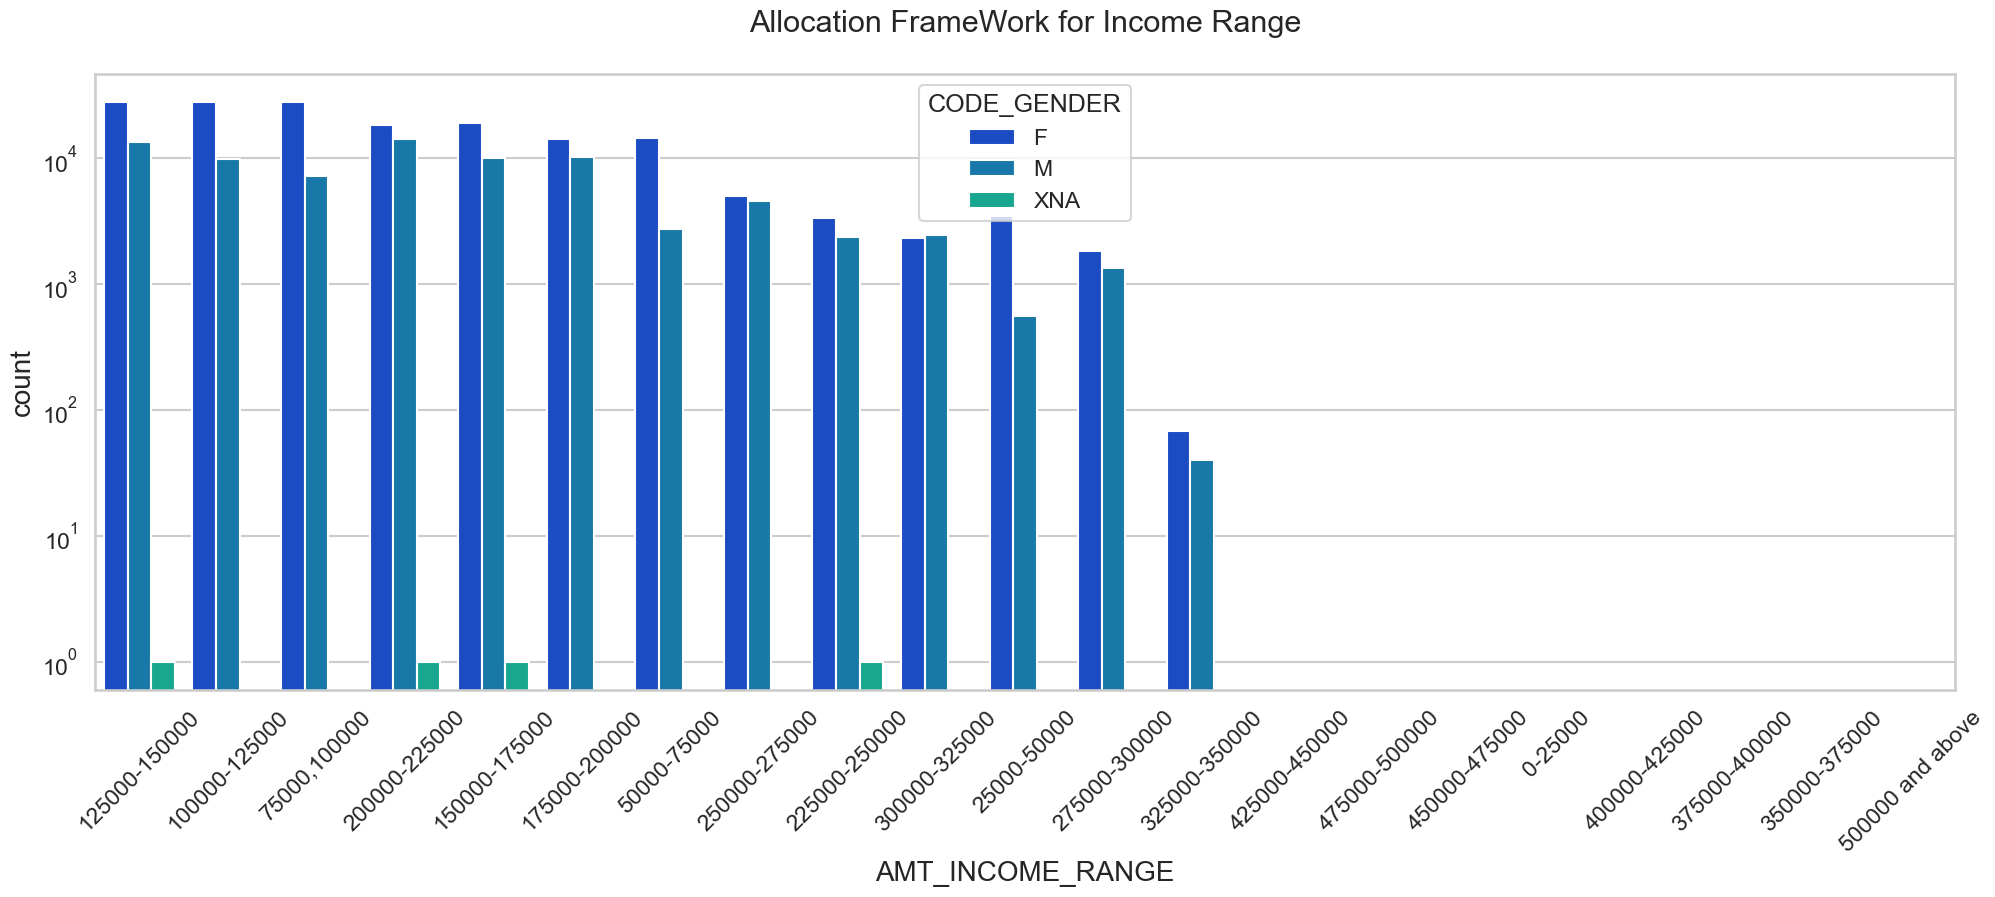

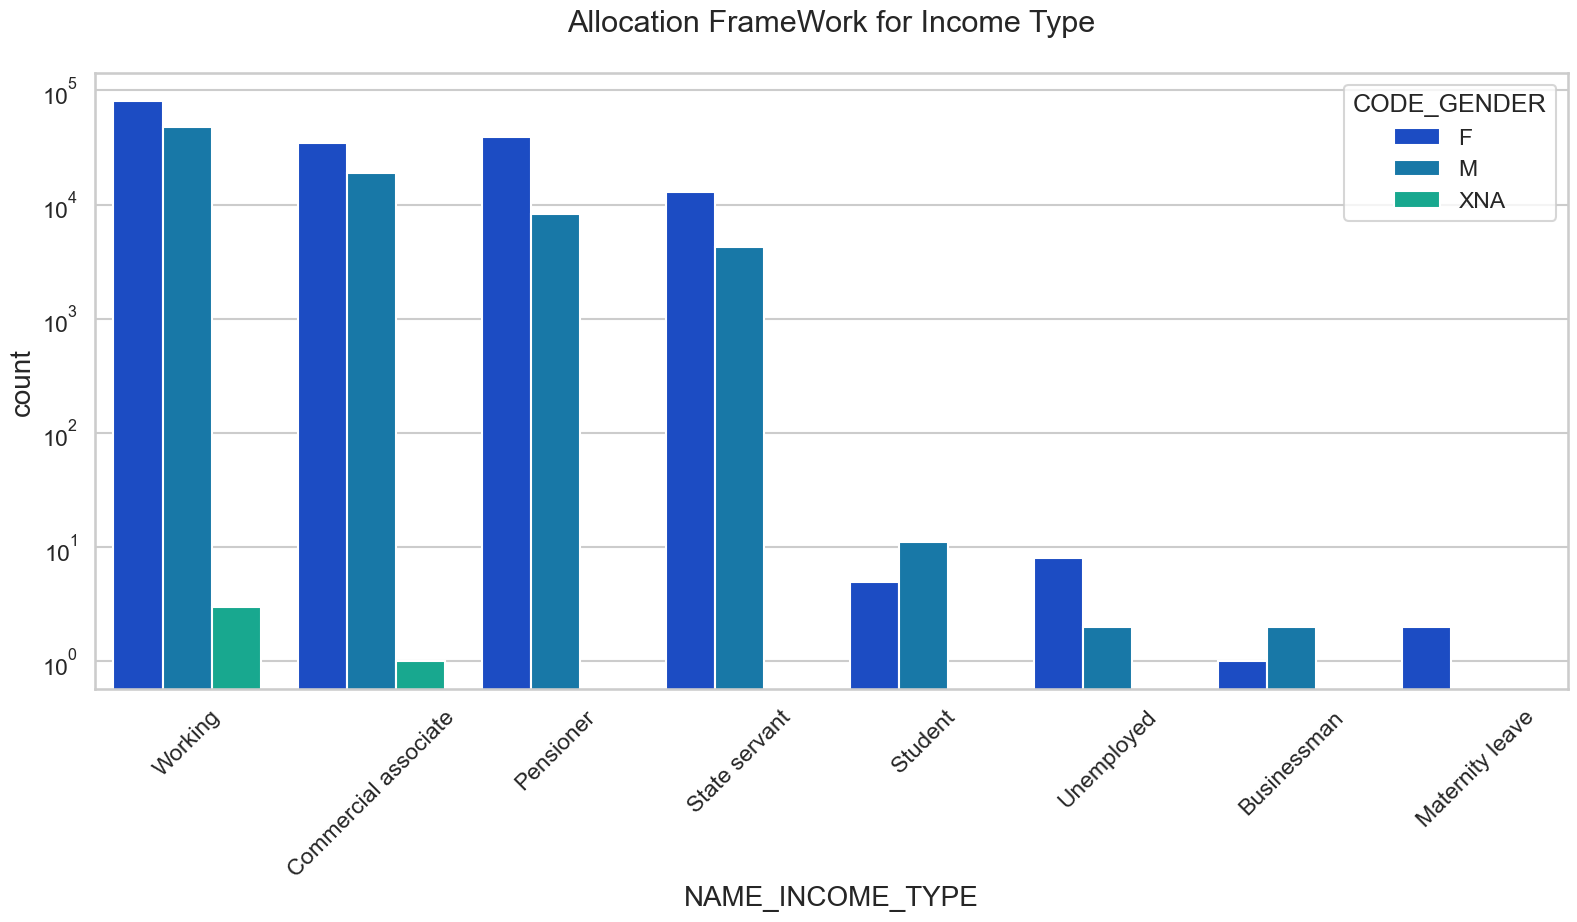

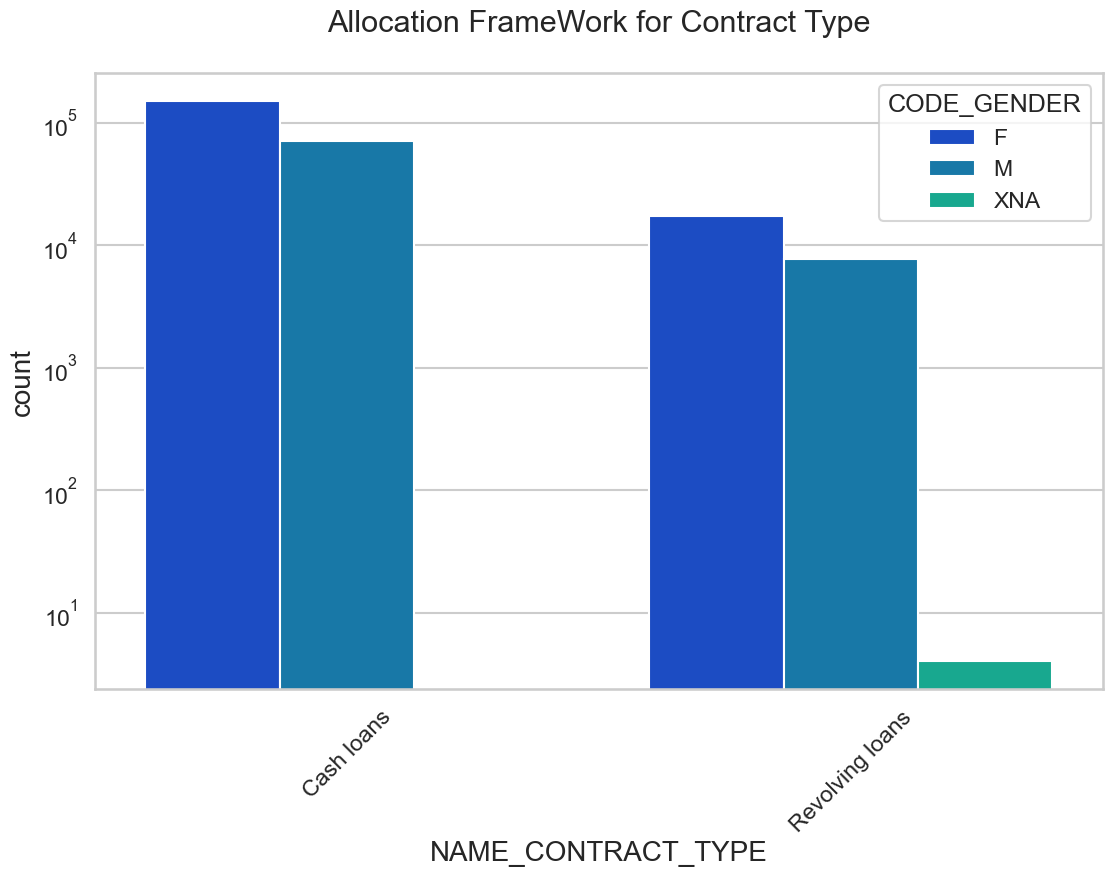

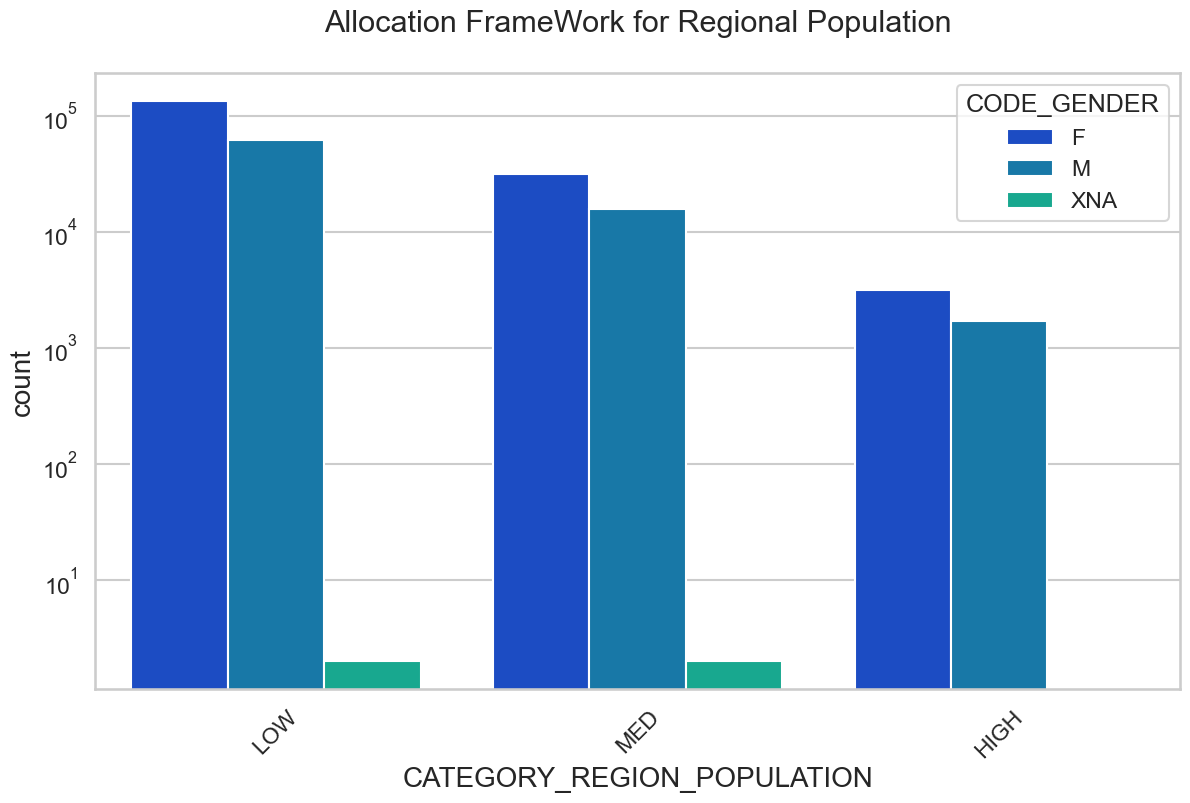

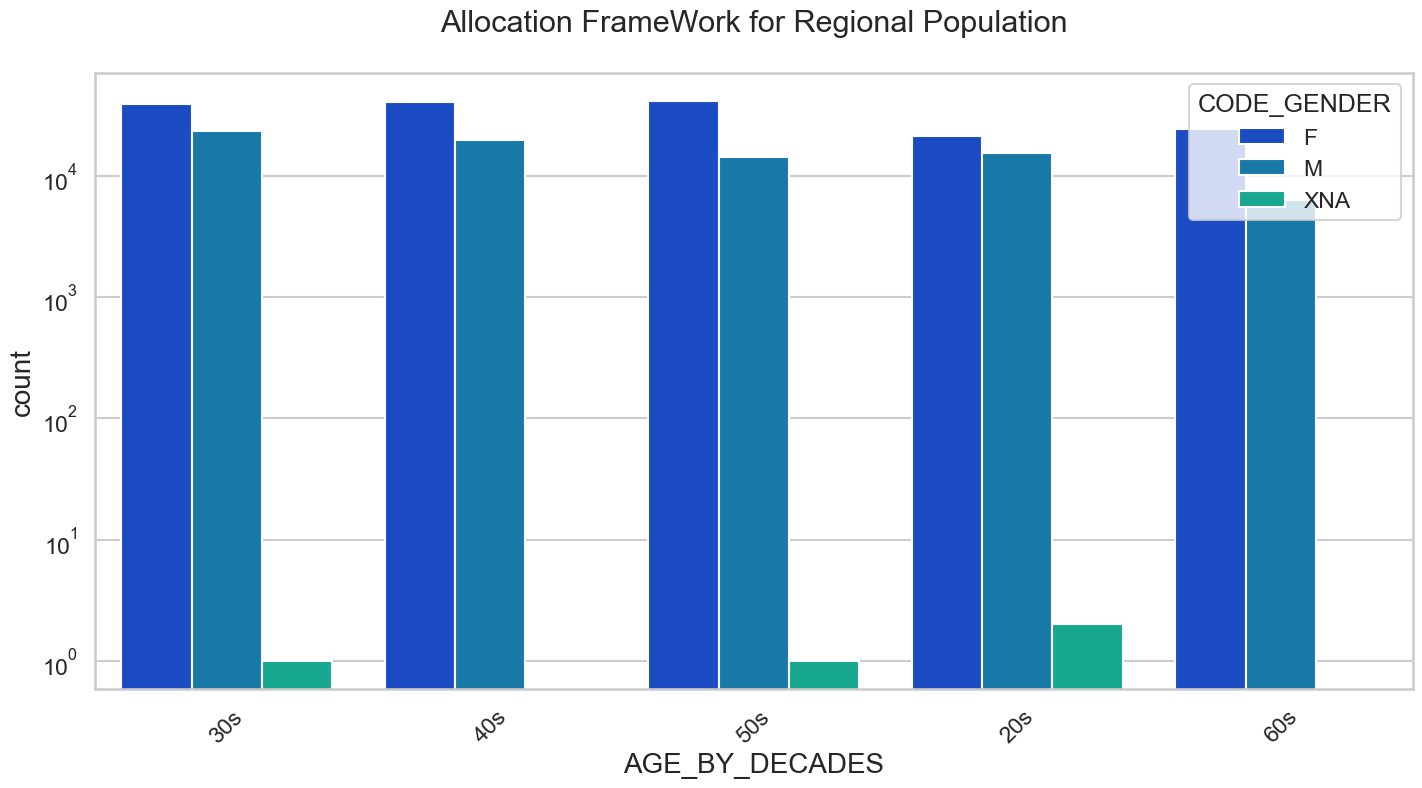

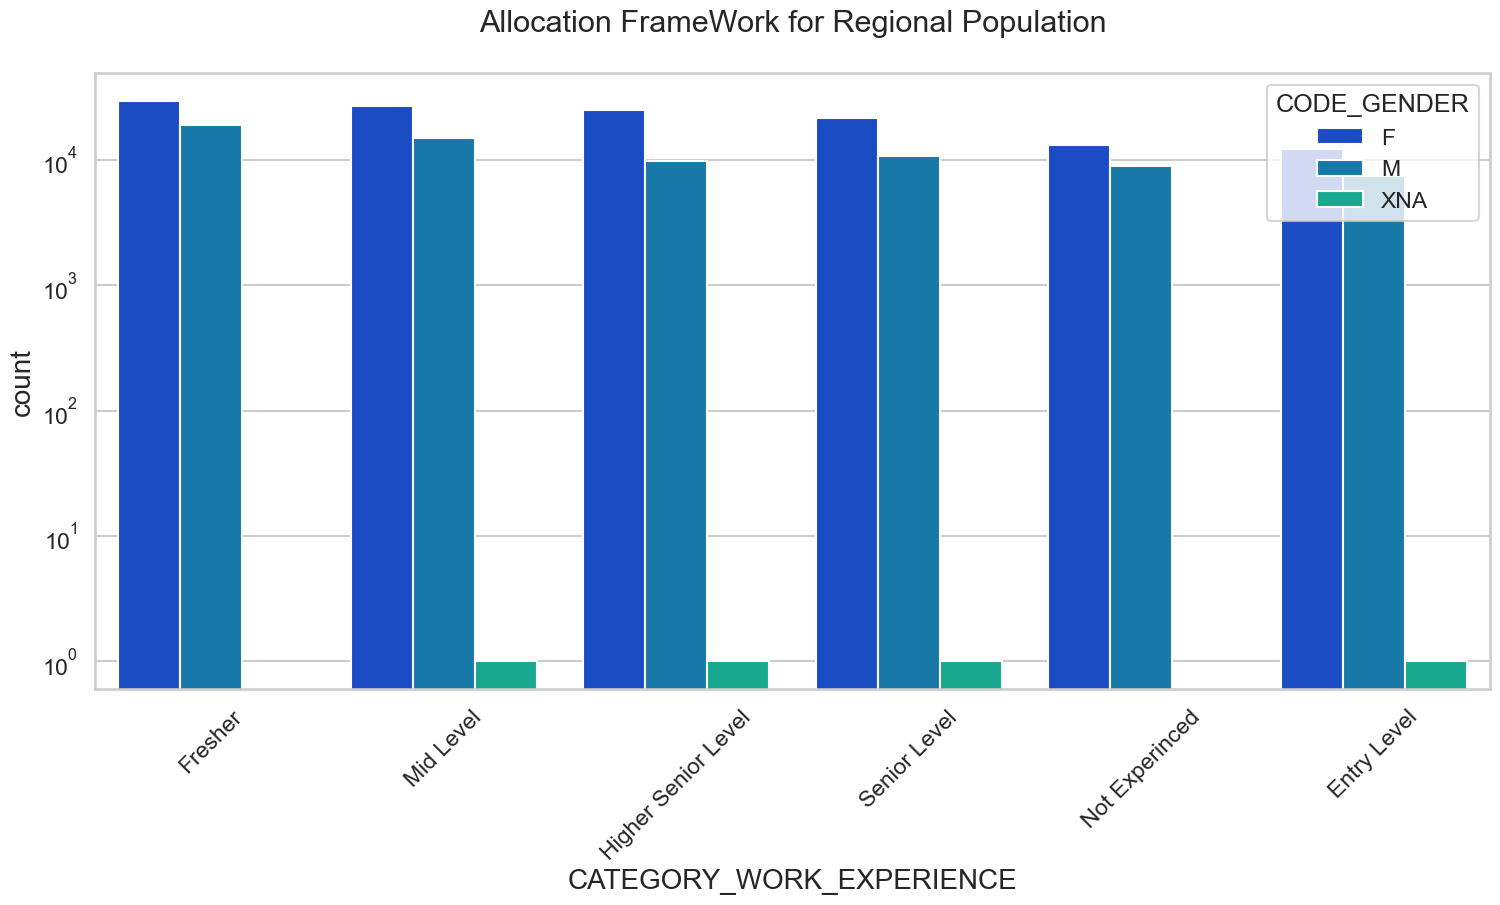

In [41]:
#Categorical Univariate Analysis on target_0 (Client with payment Difficulty) Datasets - Demo View

# PLotting for income range

uniplot(df_target_0,'AMT_INCOME_RANGE', 'Allocation FrameWork for Income Range', hue='CODE_GENDER')

# Plotting for Income type

uniplot(df_target_0,'NAME_INCOME_TYPE', 'Allocation FrameWork for Income Type', hue='CODE_GENDER')

# Plotting for Contract type

uniplot(df_target_0,'NAME_CONTRACT_TYPE', 'Allocation FrameWork for Contract Type', hue='CODE_GENDER')

# Plotting for Region Population

uniplot(df_target_0,'CATEGORY_REGION_POPULATION', 'Allocation FrameWork for Regional Population', hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(df_target_0,'AGE_BY_DECADES', 'Allocation FrameWork for Regional Population', hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(df_target_0,'CATEGORY_WORK_EXPERIENCE', 'Allocation FrameWork for Regional Population', hue='CODE_GENDER')



# 8.Categorical Univariate Analysis on target_0 (Client with no payment Difficulty)

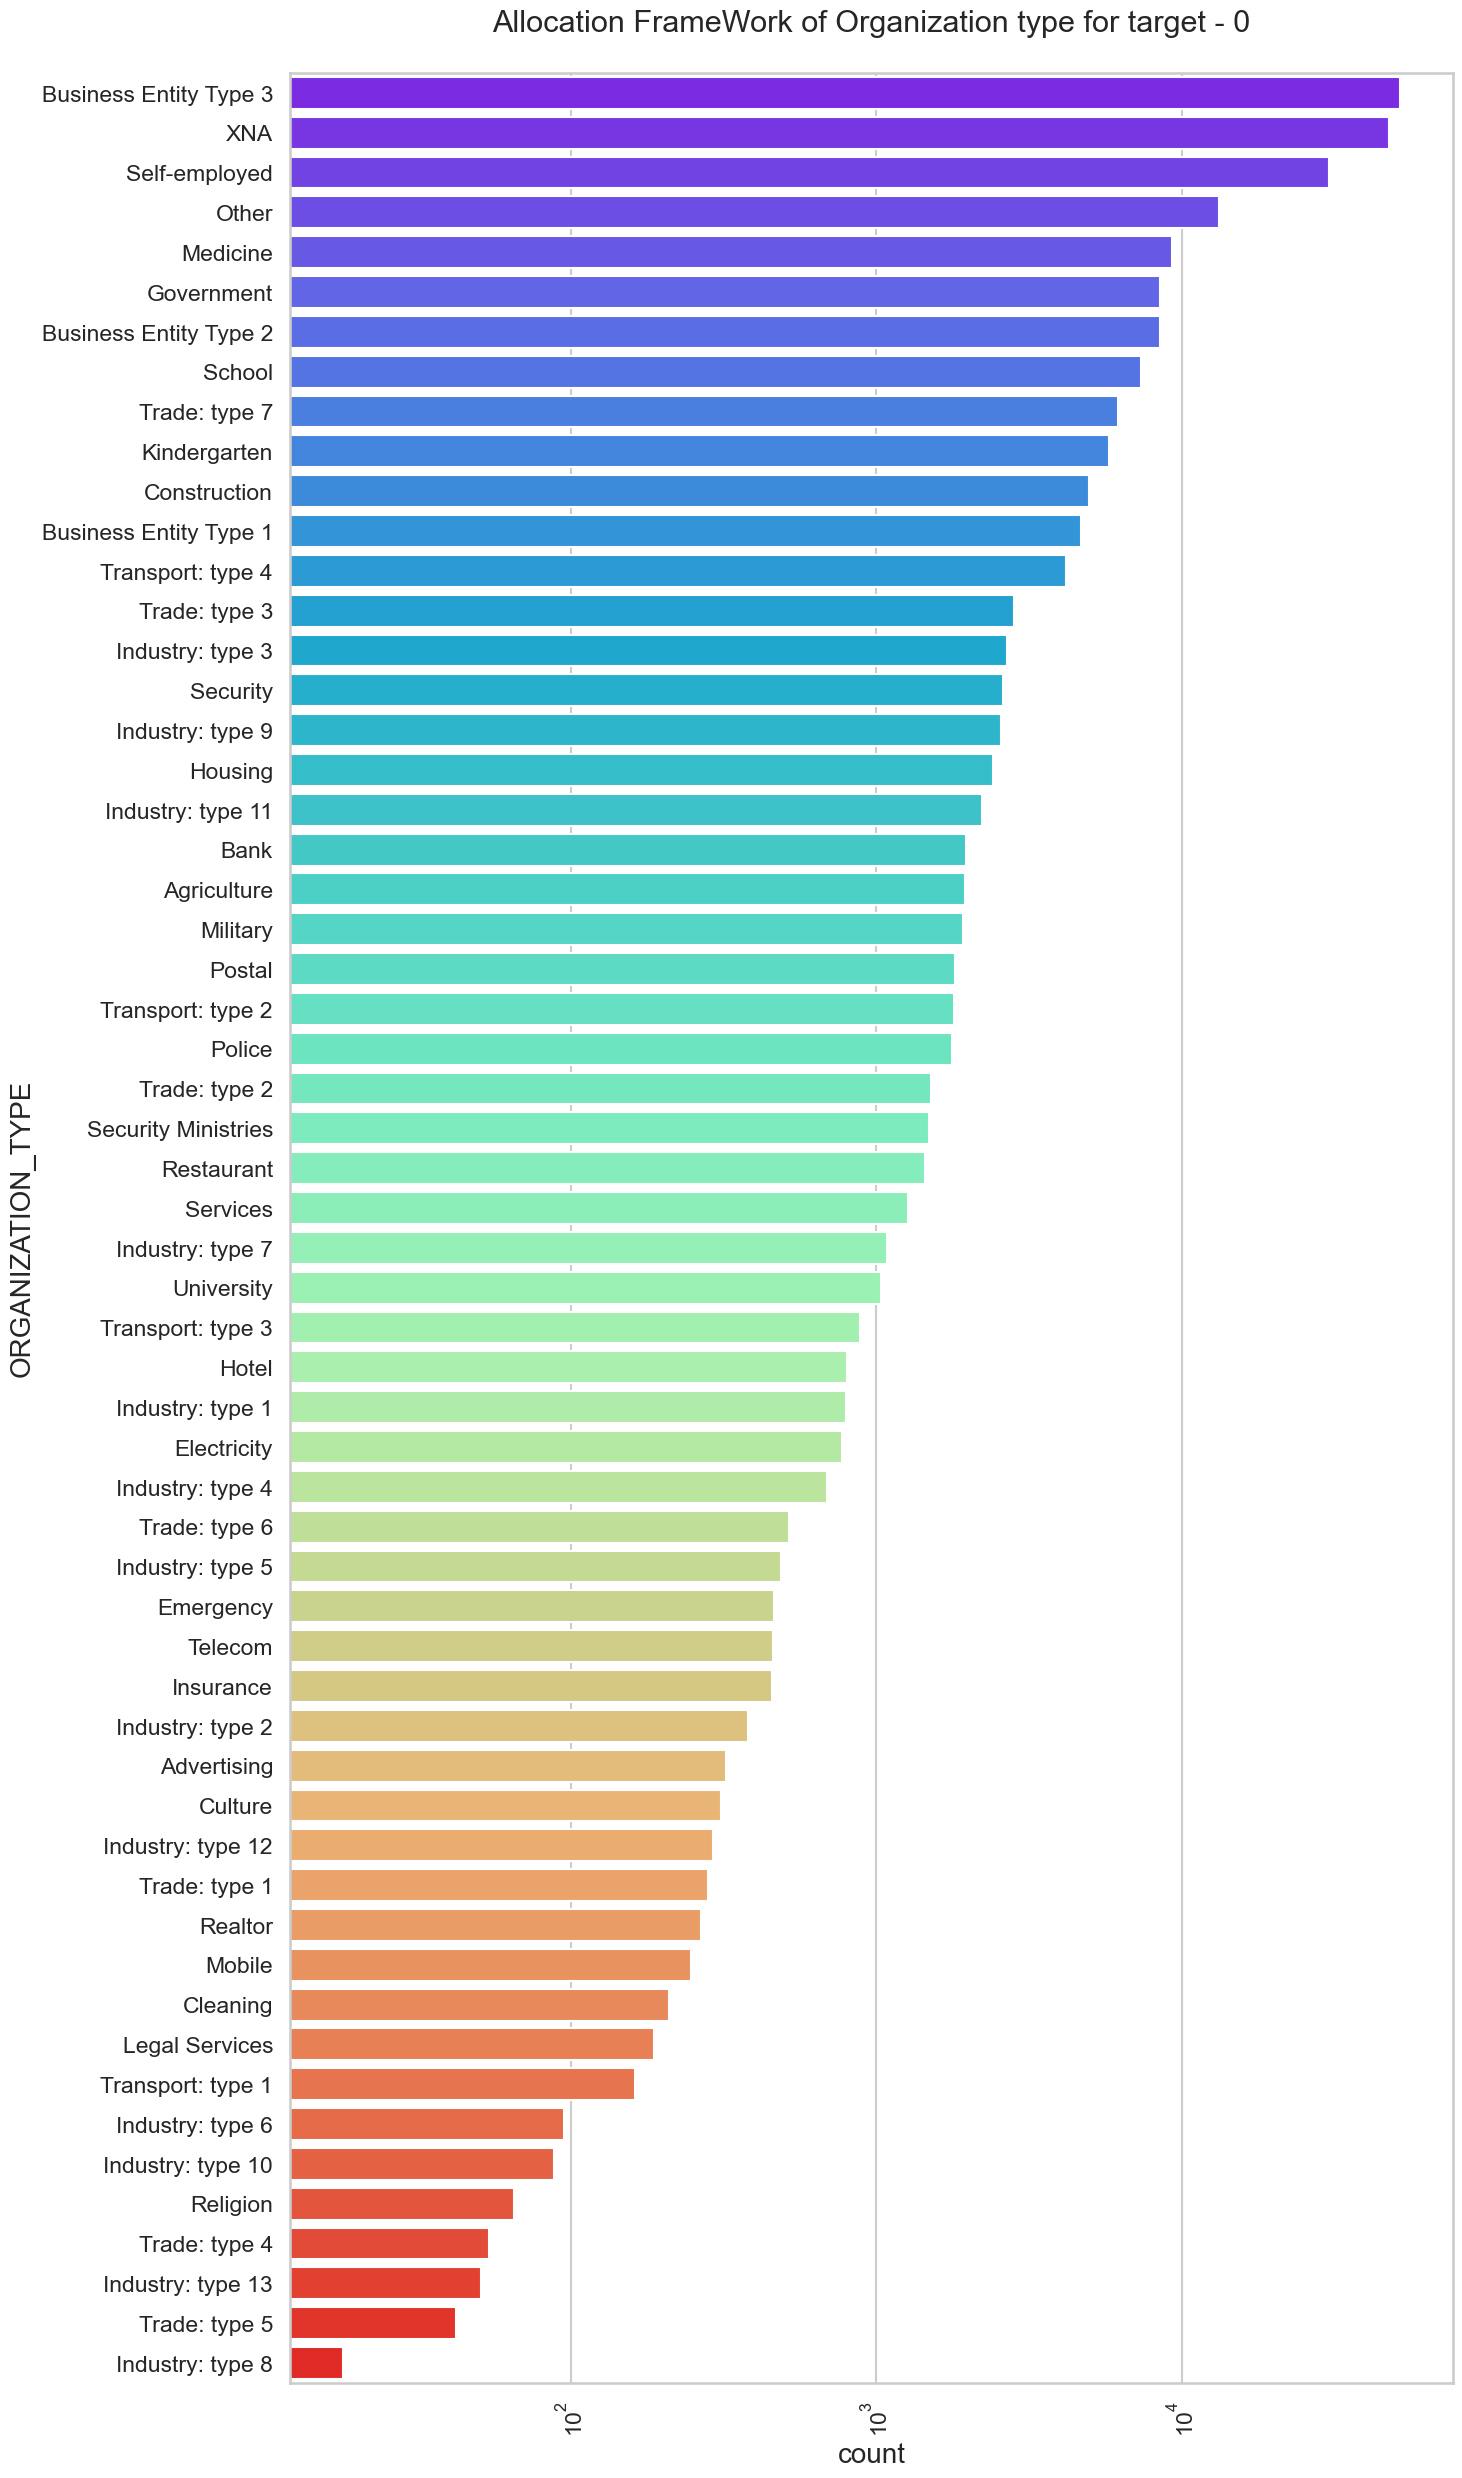

In [42]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Allocation FrameWork of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

ax = sns.countplot(data=df_target_0, y='ORGANIZATION_TYPE', order=df_target_0['ORGANIZATION_TYPE'].value_counts().index,palette='rainbow')

plt.show()

Based on the analysis on Target 0(Client with no payment difficulty) , i can draw the following conclusions:

1. Females have a higher count of credit applications compared to males, indicating that women are actively seeking credit for their financial needs.

2. The income range of 100,000 to 200,000 is the most popular for credit applications, suggesting that individuals within this range have a higher need for credit or financial stability.

3. Within the 100,000 to 200,000 income range, there is a higher count of credit applications from females compared to males. This indicates that women in this income bracket are actively seeking credit for their specific financial goals or needs.

4. There is a lower count of credit applications from individuals with an income of 400,000 and above, suggesting that they have alternative financial avenues or rely less on credit.

5. Certain income types, such as 'working', 'commercial associate', and 'State Servant', demonstrate a higher demand for credit, indicating diverse financial needs within these groups.

6. Females have a higher count of credit applications than males within these income types, highlighting potential gender variations in financial aspirations or borrowing behavior.

7. There is a lower number of credit applications from income types including 'student', 'pensioner', 'businessman', and those on 'maternity leave', indicating alternative funding sources or lower credit demand due to specific life circumstances.

8. 'Cash loans' receive a higher number of credit applications compared to 'Revolving loans', suggesting a preference for one-time lump-sum financing rather than a revolving line of credit.

9. Females lead in applying for different loan types, reflecting potential differences in financial goals, risk perceptions, or borrowing preferences between genders.

10. The most popular organization types for credit applications include 'Business entity Type 3', 'Self-employed', 'Other', 'Medicine', and 'Government', suggesting a higher need for credit in business, medical, or government-related expenses.

11. There is a lower count of credit applications from organizations categorized as Industry type 8, type 6, type 10, religion, trade type 5, and type 4, indicating alternate funding sources or lower credit demand for various reasons within these sectors.



# 9. Imbalance Data

A combination of sampling techniques and appropriate analysis approaches can help address data imbalance and improve the reliability and accuracy of insights derived from the dataset.

In [43]:
#Finding Correlation for Numerical columns in Target 1 and 0

# Exclude non-numeric columns from df_target_1 and df_target_0
numeric_cols_target_1 = df_target_1.select_dtypes(include=['float64', 'int64'])
numeric_cols_target_0 = df_target_0.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for target_1
target_1cor = numeric_cols_target_1.corr(method='spearman')

# Calculate correlation for target_0
target_0cor = numeric_cols_target_0.corr(method='spearman')


In [44]:
#Correlation for Target = 1

target_1cor

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN     -0.006189   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                   -0.006189     NaN      1.000000   
AMT_INCOME_TOTAL                0.005309     NaN     -0.001216   
AMT_CREDIT                     -0.004561     NaN      0.002777   
AMT_ANNUITY                    -0.005638     NaN      0.035477   
AMT_GOODS_PRICE                -0.005573     NaN     -0.005074   
REGION_POPULATION_RELATIVE      0.004283     NaN     -0.029459   
DAYS_BIRTH                      0.001168     NaN     -0.263681   
DAYS_EMPLOYED                   0.003427     NaN     -0.127251   
DAYS_REGISTRATION              -0.002895     NaN     -0.126602   
DAYS_ID_PUBLISH                 0.002666     NaN      0.019721   
FLAG_MOBIL                           NaN     NaN           NaN   
FLAG_EMP_PHONE                  0.003721     NaN      0.215559   
FLAG_WORK_PHONE                 0.007092     NaN      0.040587   
FLAG_CONT_MOBILE               -0.004810     NaN      0.002272   
FLAG_PHONE                      0.022797     NaN     -0.025656   
FLAG_EMAIL                     -0.002878     NaN      0.017334   
CNT_FAM_MEMBERS                -0.002592     NaN      0.810505   
REGION_RATING_CLIENT           -0.004753     NaN      0.037438   
REGION_RATING_CLIENT_W_CITY    -0.002065     NaN      0.038590   
HOUR_APPR_PROCESS_START         0.004204     NaN     -0.017894   
REG_REGION_NOT_LIVE_REGION     -0.006921     NaN     -0.027395   
REG_REGION_NOT_WORK_REGION      0.001621     NaN     -0.022665   
LIVE_REGION_NOT_WORK_REGION     0.003348     NaN     -0.013293   
REG_CITY_NOT_LIVE_CITY          0.008992     NaN      0.005875   
REG_CITY_NOT_WORK_CITY          0.001118     NaN      0.043350   
LIVE_CITY_NOT_WORK_CITY        -0.002589     NaN      0.045251   
YEARS_BEGINEXPLUATATION_AVG     0.007582     NaN     -0.002530   
FLOORSMAX_AVG                   0.019327     NaN     -0.024573   
YEARS_BEGINEXPLUATATION_MODE    0.007588     NaN     -0.000273   
FLOORSMAX_MODE                  0.018359     NaN     -0.023408   
YEARS_BEGINEXPLUATATION_MEDI    0.007279     NaN     -0.003100   
FLOORSMAX_MEDI                  0.020125     NaN     -0.024149   
TOTALAREA_MODE                  0.008049     NaN     -0.024890   
OBS_30_CNT_SOCIAL_CIRCLE       -0.009441     NaN      0.031807   
DEF_30_CNT_SOCIAL_CIRCLE       -0.005623     NaN     -0.006518   
OBS_60_CNT_SOCIAL_CIRCLE       -0.009206     NaN      0.031222   
DEF_60_CNT_SOCIAL_CIRCLE       -0.007931     NaN     -0.005902   
DAYS_LAST_PHONE_CHANGE          0.004350     NaN     -0.009590   
AMT_REQ_CREDIT_BUREAU_HOUR     -0.011789     NaN     -0.000530   
AMT_REQ_CREDIT_BUREAU_DAY      -0.013434     NaN     -0.012531   
AMT_REQ_CREDIT_BUREAU_WEEK     -0.006022     NaN     -0.008740   
AMT_REQ_CREDIT_BUREAU_MON      -0.000352     NaN     -0.009877   
AMT_REQ_CREDIT_BUREAU_QRT       0.002223     NaN     -0.016464   
AMT_REQ_CREDIT_BUREAU_YEAR      0.016774     NaN     -0.032294   
AGE_YEAR                        0.000931     NaN     -0.263511   
EMPLOYED_YEAR                   0.002983     NaN     -0.127185   
INCOME_CREDIT_RT                0.009101     NaN     -0.000994   
LTV_RT                         -0.001952     NaN     -0.035618   

                              AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                            0.005309   -0.004561    -0.005638   
TARGET                                     NaN         NaN          NaN   
CNT_CHILDREN                         -0.001216    0.002777     0.035477   
AMT_INCOME_TOTAL                      1.000000    0.318964     0.389422   
AMT_CREDIT                            0.318964    1.000000     0.797897   
AMT_ANNUITY                           0.389422    0.797897     1.000000   
AMT_GOODS_PRICE                       0.321972    0.974784     0.789149   
REGION_POPULATION_RELATIVE            0.035940    0.028273     

In [45]:
#Correlation for Target = 0

target_0cor

SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000     NaN      0.001125   
TARGET                               NaN     NaN           NaN   
CNT_CHILDREN                    0.001125     NaN      1.000000   
AMT_INCOME_TOTAL                0.003113     NaN      0.037784   
AMT_CREDIT                      0.001780     NaN     -0.000050   
AMT_ANNUITY                     0.002363     NaN      0.022857   
AMT_GOODS_PRICE                 0.002139     NaN     -0.003950   
REGION_POPULATION_RELATIVE      0.000246     NaN     -0.022485   
DAYS_BIRTH                      0.000623     NaN     -0.373093   
DAYS_EMPLOYED                   0.000728     NaN     -0.211710   
DAYS_REGISTRATION               0.001741     NaN     -0.176001   
DAYS_ID_PUBLISH                 0.000012     NaN      0.011923   
FLAG_MOBIL                      0.003130     NaN      0.001261   
FLAG_EMP_PHONE                 -0.000969     NaN      0.274914   
FLAG_WORK_PHONE                -0.000119     NaN      0.052515   
FLAG_CONT_MOBILE                0.002716     NaN     -0.002337   
FLAG_PHONE                      0.000649     NaN     -0.034552   
FLAG_EMAIL                     -0.002121     NaN      0.024167   
CNT_FAM_MEMBERS                -0.001882     NaN      0.796434   
REGION_RATING_CLIENT           -0.000625     NaN      0.018790   
REGION_RATING_CLIENT_W_CITY    -0.000987     NaN      0.017308   
HOUR_APPR_PROCESS_START        -0.000042     NaN      0.006230   
REG_REGION_NOT_LIVE_REGION      0.000358     NaN     -0.011035   
REG_REGION_NOT_WORK_REGION      0.001116     NaN      0.015554   
LIVE_REGION_NOT_WORK_REGION     0.002692     NaN      0.021840   
REG_CITY_NOT_LIVE_CITY         -0.002020     NaN      0.029050   
REG_CITY_NOT_WORK_CITY         -0.001879     NaN      0.076816   
LIVE_CITY_NOT_WORK_CITY        -0.000045     NaN      0.070545   
YEARS_BEGINEXPLUATATION_AVG     0.004167     NaN      0.014859   
FLOORSMAX_AVG                   0.004192     NaN     -0.014040   
YEARS_BEGINEXPLUATATION_MODE    0.003587     NaN      0.014638   
FLOORSMAX_MODE                  0.004248     NaN     -0.013159   
YEARS_BEGINEXPLUATATION_MEDI    0.003935     NaN      0.015062   
FLOORSMAX_MEDI                  0.004523     NaN     -0.013433   
TOTALAREA_MODE                  0.001569     NaN     -0.010775   
OBS_30_CNT_SOCIAL_CIRCLE       -0.001847     NaN      0.024617   
DEF_30_CNT_SOCIAL_CIRCLE        0.000674     NaN     -0.000292   
OBS_60_CNT_SOCIAL_CIRCLE       -0.001851     NaN      0.024231   
DEF_60_CNT_SOCIAL_CIRCLE        0.002291     NaN     -0.001006   
DAYS_LAST_PHONE_CHANGE          0.001435     NaN      0.010984   
AMT_REQ_CREDIT_BUREAU_HOUR     -0.000640     NaN      0.001173   
AMT_REQ_CREDIT_BUREAU_DAY      -0.001467     NaN      0.000922   
AMT_REQ_CREDIT_BUREAU_WEEK      0.005478     NaN     -0.001704   
AMT_REQ_CREDIT_BUREAU_MON       0.001125     NaN     -0.000941   
AMT_REQ_CREDIT_BUREAU_QRT      -0.000143     NaN     -0.007201   
AMT_REQ_CREDIT_BUREAU_YEAR      0.004344     NaN     -0.043667   
AGE_YEAR                        0.000599     NaN     -0.373111   
EMPLOYED_YEAR                   0.000621     NaN     -0.211900   
INCOME_CREDIT_RT                0.000513     NaN      0.026779   
LTV_RT                          0.000748     NaN     -0.016199   

                              AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                            0.003113    0.001780     0.002363   
TARGET                                     NaN         NaN          NaN   
CNT_CHILDREN                          0.037784   -0.000050     0.022857   
AMT_INCOME_TOTAL                      1.000000    0.346881     0.416594   
AMT_CREDIT                            0.346881    1.000000     0.809580   
AMT_ANNUITY                           0.416594    0.809580     1.000000   
AMT_GOODS_PRICE                       0.349820    0.982749     0.805873   
REGION_POPULATION_RELATIVE            0.063865    0.025644     

<Axes: >

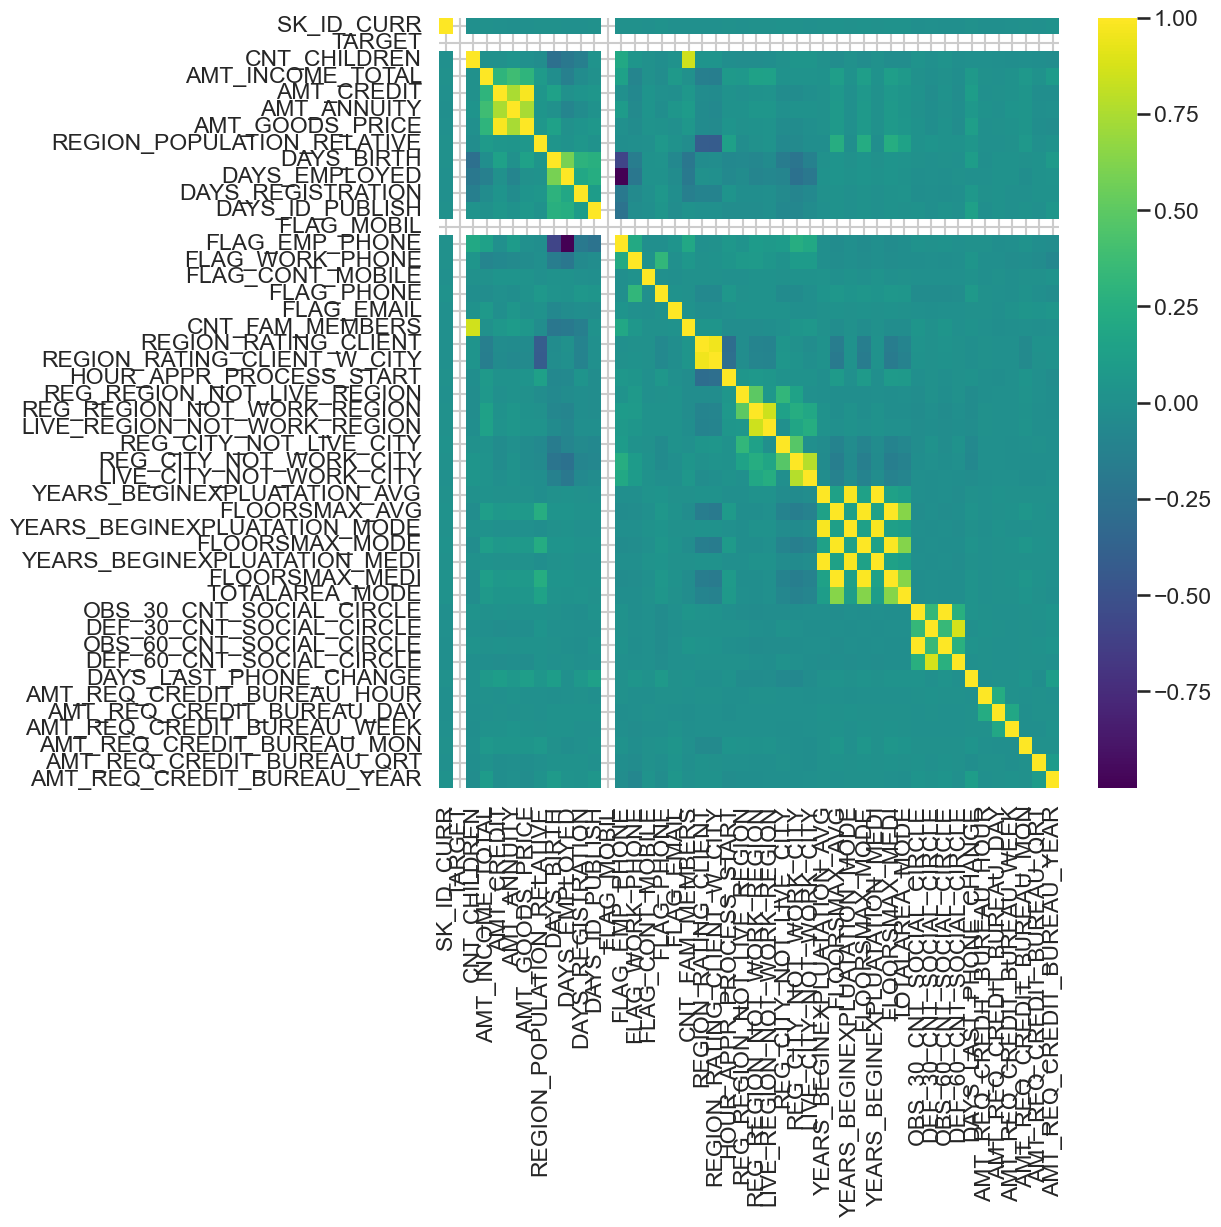

In [46]:
# Correlation for key quantitative variables from df_clean with TARGET=1

plt.figure(6,figsize=(10,10))

columns_to_impute_corr1=target_1[numerical_columns].corr()

sns.heatmap(columns_to_impute_corr1 ,xticklabels=True, yticklabels=True,cmap="viridis")

<Axes: >

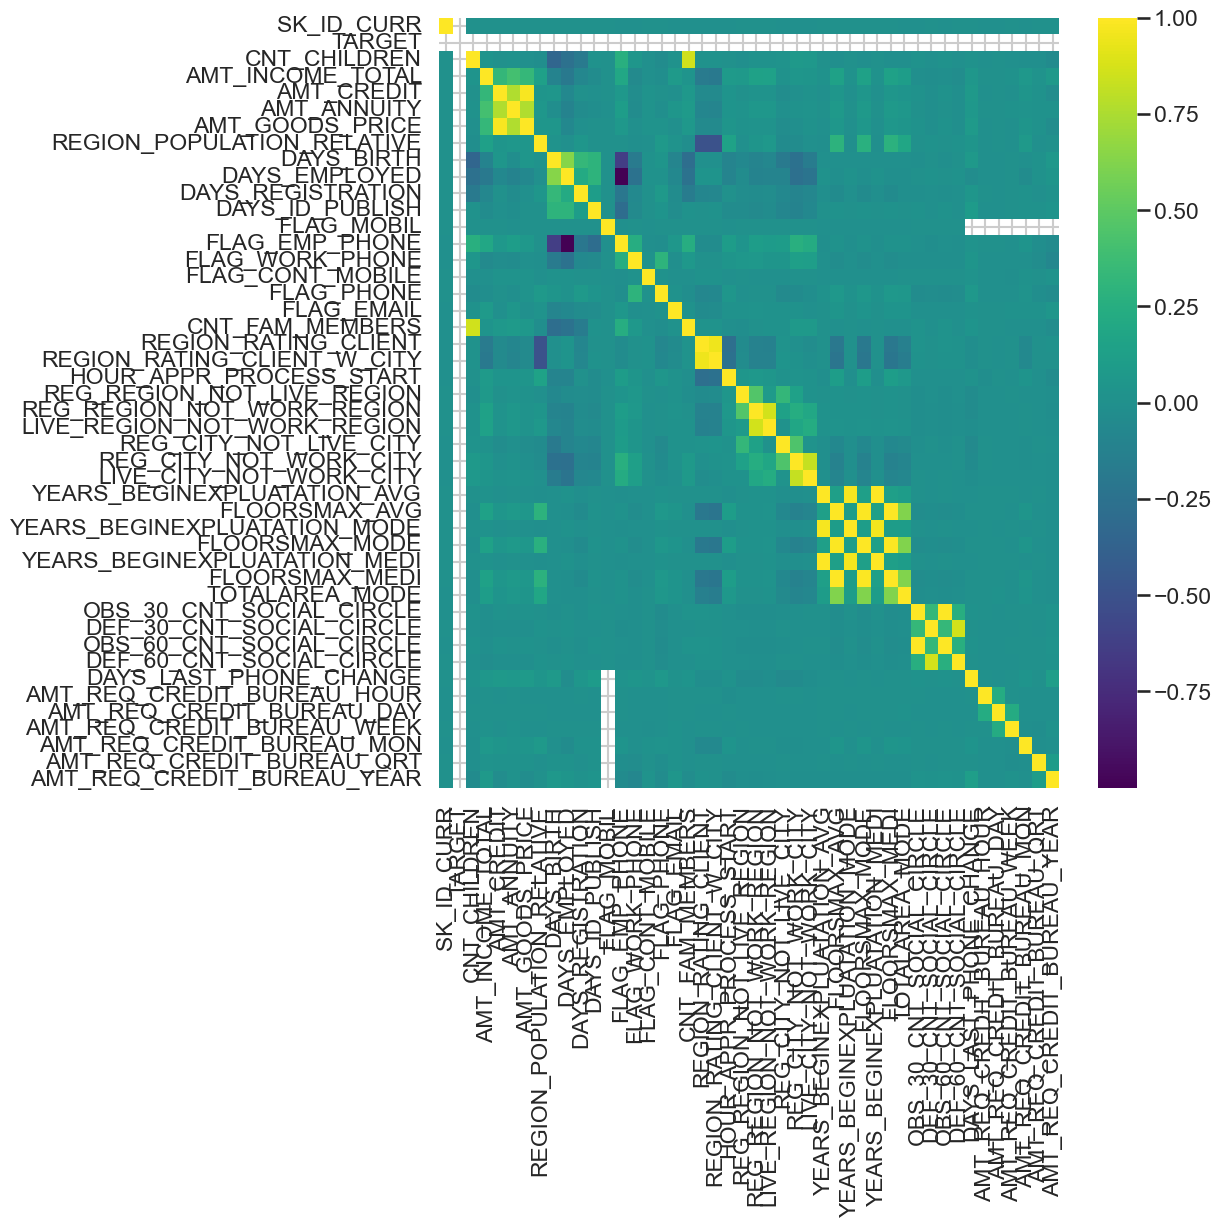

In [47]:
plt.figure(6,figsize=(10,10))

columns_to_impute_corr=target_0[numerical_columns].corr()

sns.heatmap(columns_to_impute_corr,xticklabels=True, yticklabels=True,cmap="viridis")

In [48]:
# Exclude non-numeric columns from target_1 DataFrame
numeric_cols_target_1 = target_1.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for target_1 DataFrame
target_1_corr = numeric_cols_target_1.corr()

# Remove diagonal and lower triangle elements
df_target_1_corr = target_1_corr.where(np.triu(np.ones(target_1_corr.shape), k=1).astype(bool))

# Reset index and rename columns
df_target_1_corr = df_target_1_corr.unstack().reset_index()
df_target_1_corr.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values in Correlation column
df_target_1_corr.dropna(subset=['Correlation'], inplace=True)

# Take absolute value and round to 2 decimal places
df_target_1_corr['Correlation'] = abs(df_target_1_corr['Correlation']).round(2)

# Sort by Correlation column in descending order and take top 10 rows
top_10_correlations = df_target_1_corr.sort_values(by='Correlation', ascending=False).head(10)
top_10_correlations

Var1                         Var2  Correlation
1885      OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE         1.00
1628  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG         1.00
2359                 EMPLOYED_YEAR                DAYS_EMPLOYED         1.00
2363                 EMPLOYED_YEAR               FLAG_EMP_PHONE         1.00
1679                FLOORSMAX_MEDI                FLOORSMAX_AVG         1.00
659                 FLAG_EMP_PHONE                DAYS_EMPLOYED         1.00
2308                      AGE_YEAR                   DAYS_BIRTH         1.00
1579                FLOORSMAX_MODE                FLOORSMAX_AVG         0.99
1681                FLOORSMAX_MEDI               FLOORSMAX_MODE         0.99
1528  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG         0.98

In [49]:
# Exclude non-numeric columns from target_1 DataFrame
numeric_cols_target_0 = target_0.select_dtypes(include=['float64', 'int64'])

# Calculate correlation for target_1 DataFrame
target_0_corr = numeric_cols_target_0.corr()

# Remove diagonal and lower triangle elements
df_target_0_corr = target_0_corr.where(np.triu(np.ones(target_0_corr.shape), k=1).astype(bool))

# Reset index and rename columns
df_target_0_corr = df_target_0_corr.unstack().reset_index()
df_target_0_corr.columns = ['Var1', 'Var2', 'Correlation']

# Drop rows with NaN values in Correlation column
df_target_0_corr.dropna(subset=['Correlation'], inplace=True)

# Take absolute value and round to 2 decimal places
df_target_0_corr['Correlation'] = abs(df_target_0_corr['Correlation']).round(2)

# Sort by Correlation column in descending order and take top 10 rows
top_10_correlations = df_target_0_corr.sort_values(by='Correlation', ascending=False).head(10)
top_10_correlations

Var1                         Var2  Correlation
2359                 EMPLOYED_YEAR                DAYS_EMPLOYED         1.00
2308                      AGE_YEAR                   DAYS_BIRTH         1.00
2363                 EMPLOYED_YEAR               FLAG_EMP_PHONE         1.00
1679                FLOORSMAX_MEDI                FLOORSMAX_AVG         1.00
659                 FLAG_EMP_PHONE                DAYS_EMPLOYED         1.00
1885      OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE         1.00
1579                FLOORSMAX_MODE                FLOORSMAX_AVG         0.99
1681                FLOORSMAX_MEDI               FLOORSMAX_MODE         0.99
1628  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG         0.99
304                AMT_GOODS_PRICE                   AMT_CREDIT         0.98

The insight from the given correlation table from Target 1 and Target 0 shows variables that have a strong positive correlation with each other. A correlation of 1.00 indicates a perfect positive linear relationship between the variables.



# 10. Checking and Comparing correlation of both Target 1 and 0.

In [50]:
#Checking and Comparing correlation of both Target 1 and 0.

df_corr = pd.merge(df_target_1_corr,df_target_0_corr,how='inner',on=['Var1','Var2'],suffixes=('_0','_1'))
df_corr[df_corr.Correlation_1 == df_corr.Correlation_0].head(10)
# corr_df[corr_df.Correlation_0 > corr_df.Correlation_1]
# corr_df[corr_df.Correlation_0 < corr_df.Correlation_1]

Var1                        Var2  Correlation_0  \
0                 CNT_CHILDREN                  SK_ID_CURR           0.00   
3                   AMT_CREDIT                  SK_ID_CURR           0.00   
4                   AMT_CREDIT                CNT_CHILDREN           0.00   
10             AMT_GOODS_PRICE                  SK_ID_CURR           0.00   
13             AMT_GOODS_PRICE                  AMT_CREDIT           0.98   
15  REGION_POPULATION_RELATIVE                  SK_ID_CURR           0.00   
21                  DAYS_BIRTH                  SK_ID_CURR           0.00   
28               DAYS_EMPLOYED                  SK_ID_CURR           0.00   
36           DAYS_REGISTRATION                  SK_ID_CURR           0.00   
42           DAYS_REGISTRATION  REGION_POPULATION_RELATIVE           0.05   

    Correlation_1  
0            0.00  
3            0.00  
4            0.00  
10           0.00  
13           0.98  
15           0.00  
21           0.00  
28           0.00  
36           0.00  
42           0.05

The overall insight from this comparison is that the majority of variables do not show a strong correlation with either target class. This suggests that the relationship between these variables and the target variable may not be significant. However, the variables Var13 (AMT_GOODS_PRICE) and Var4 (AMT_CREDIT) appear to be strongly correlated with the target variable for both target classes, indicating that these variables may have a stronger association with the target.

# 11. Segmented Univariate Analysis of df Clean DataFrame

Check for Outliers by Boxplots

In [51]:
#Check for Outliers by Boxplots

## Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data, col, title):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['axes.titlepad'] = 20
    flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linewidth=0.5,linestyle='-')
    
    plt.title(title)
    plt.yscale('log')    
    plt.boxplot(data=df_target_1, x=col, flierprops=flierprops)  
    plt.show()

    

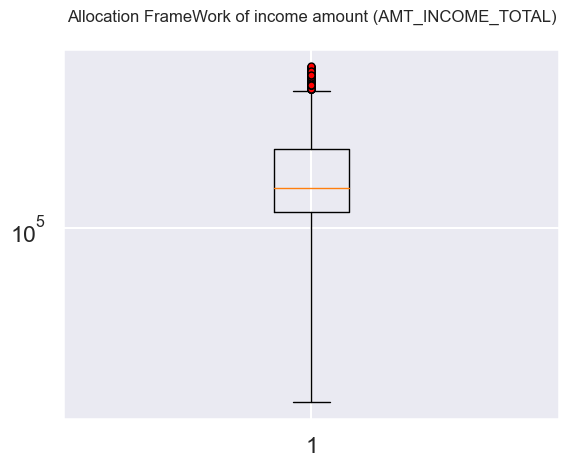

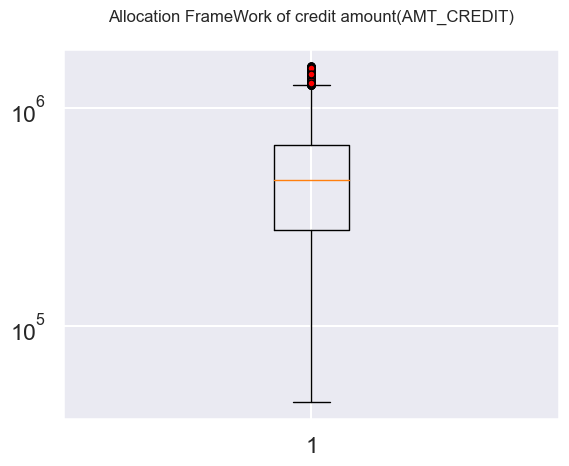

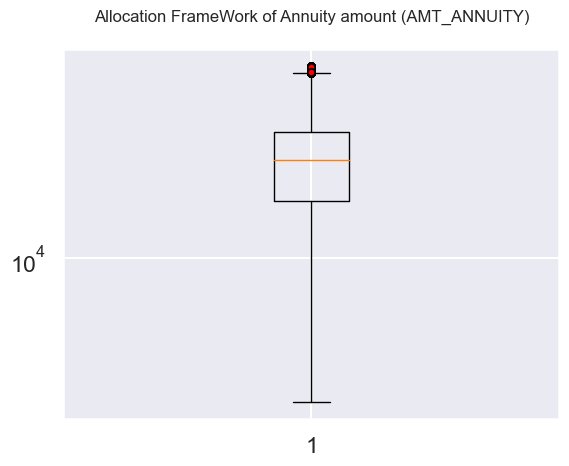

In [52]:
#Boxplot Analysis for Target 1

# Allocation FrameWork of income amount

univariate_numerical(df_target_1, 'AMT_INCOME_TOTAL', 'Allocation FrameWork of income amount (AMT_INCOME_TOTAL)')

# Allocation FrameWork of credit amount

univariate_numerical(df_target_1, 'AMT_CREDIT', 'Allocation FrameWork of credit amount(AMT_CREDIT)')

# Allocation FrameWork of anuuity amount

univariate_numerical(df_target_1, 'AMT_ANNUITY', 'Allocation FrameWork of Annuity amount (AMT_ANNUITY)')



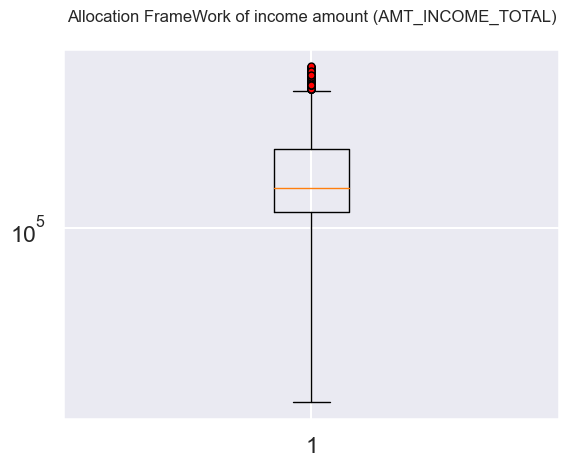

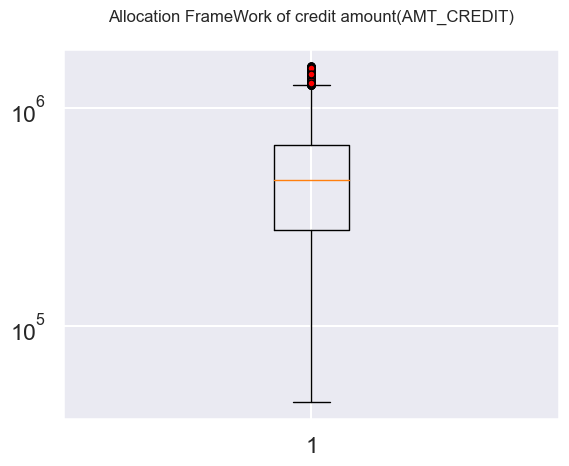

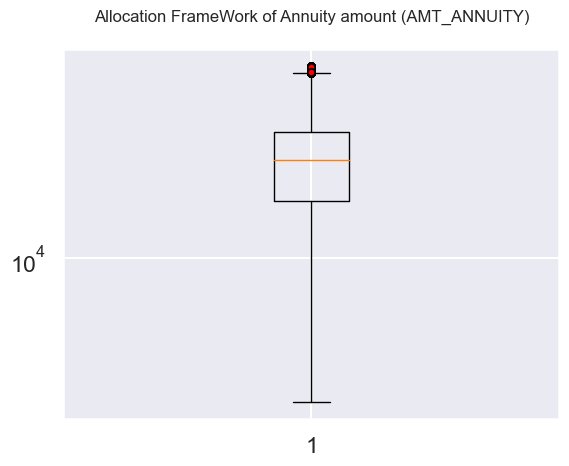

In [53]:
#Boxplot Analysis for Target 0

# Allocation FrameWork of income amount

univariate_numerical(df_target_0, 'AMT_INCOME_TOTAL', 'Allocation FrameWork of income amount (AMT_INCOME_TOTAL)')

# Allocation FrameWork of credit amount

univariate_numerical(df_target_0, 'AMT_CREDIT', 'Allocation FrameWork of credit amount(AMT_CREDIT)')

# Allocation FrameWork of anuuity amount

univariate_numerical(df_target_0, 'AMT_ANNUITY', 'Allocation FrameWork of Annuity amount (AMT_ANNUITY)')




length:  13


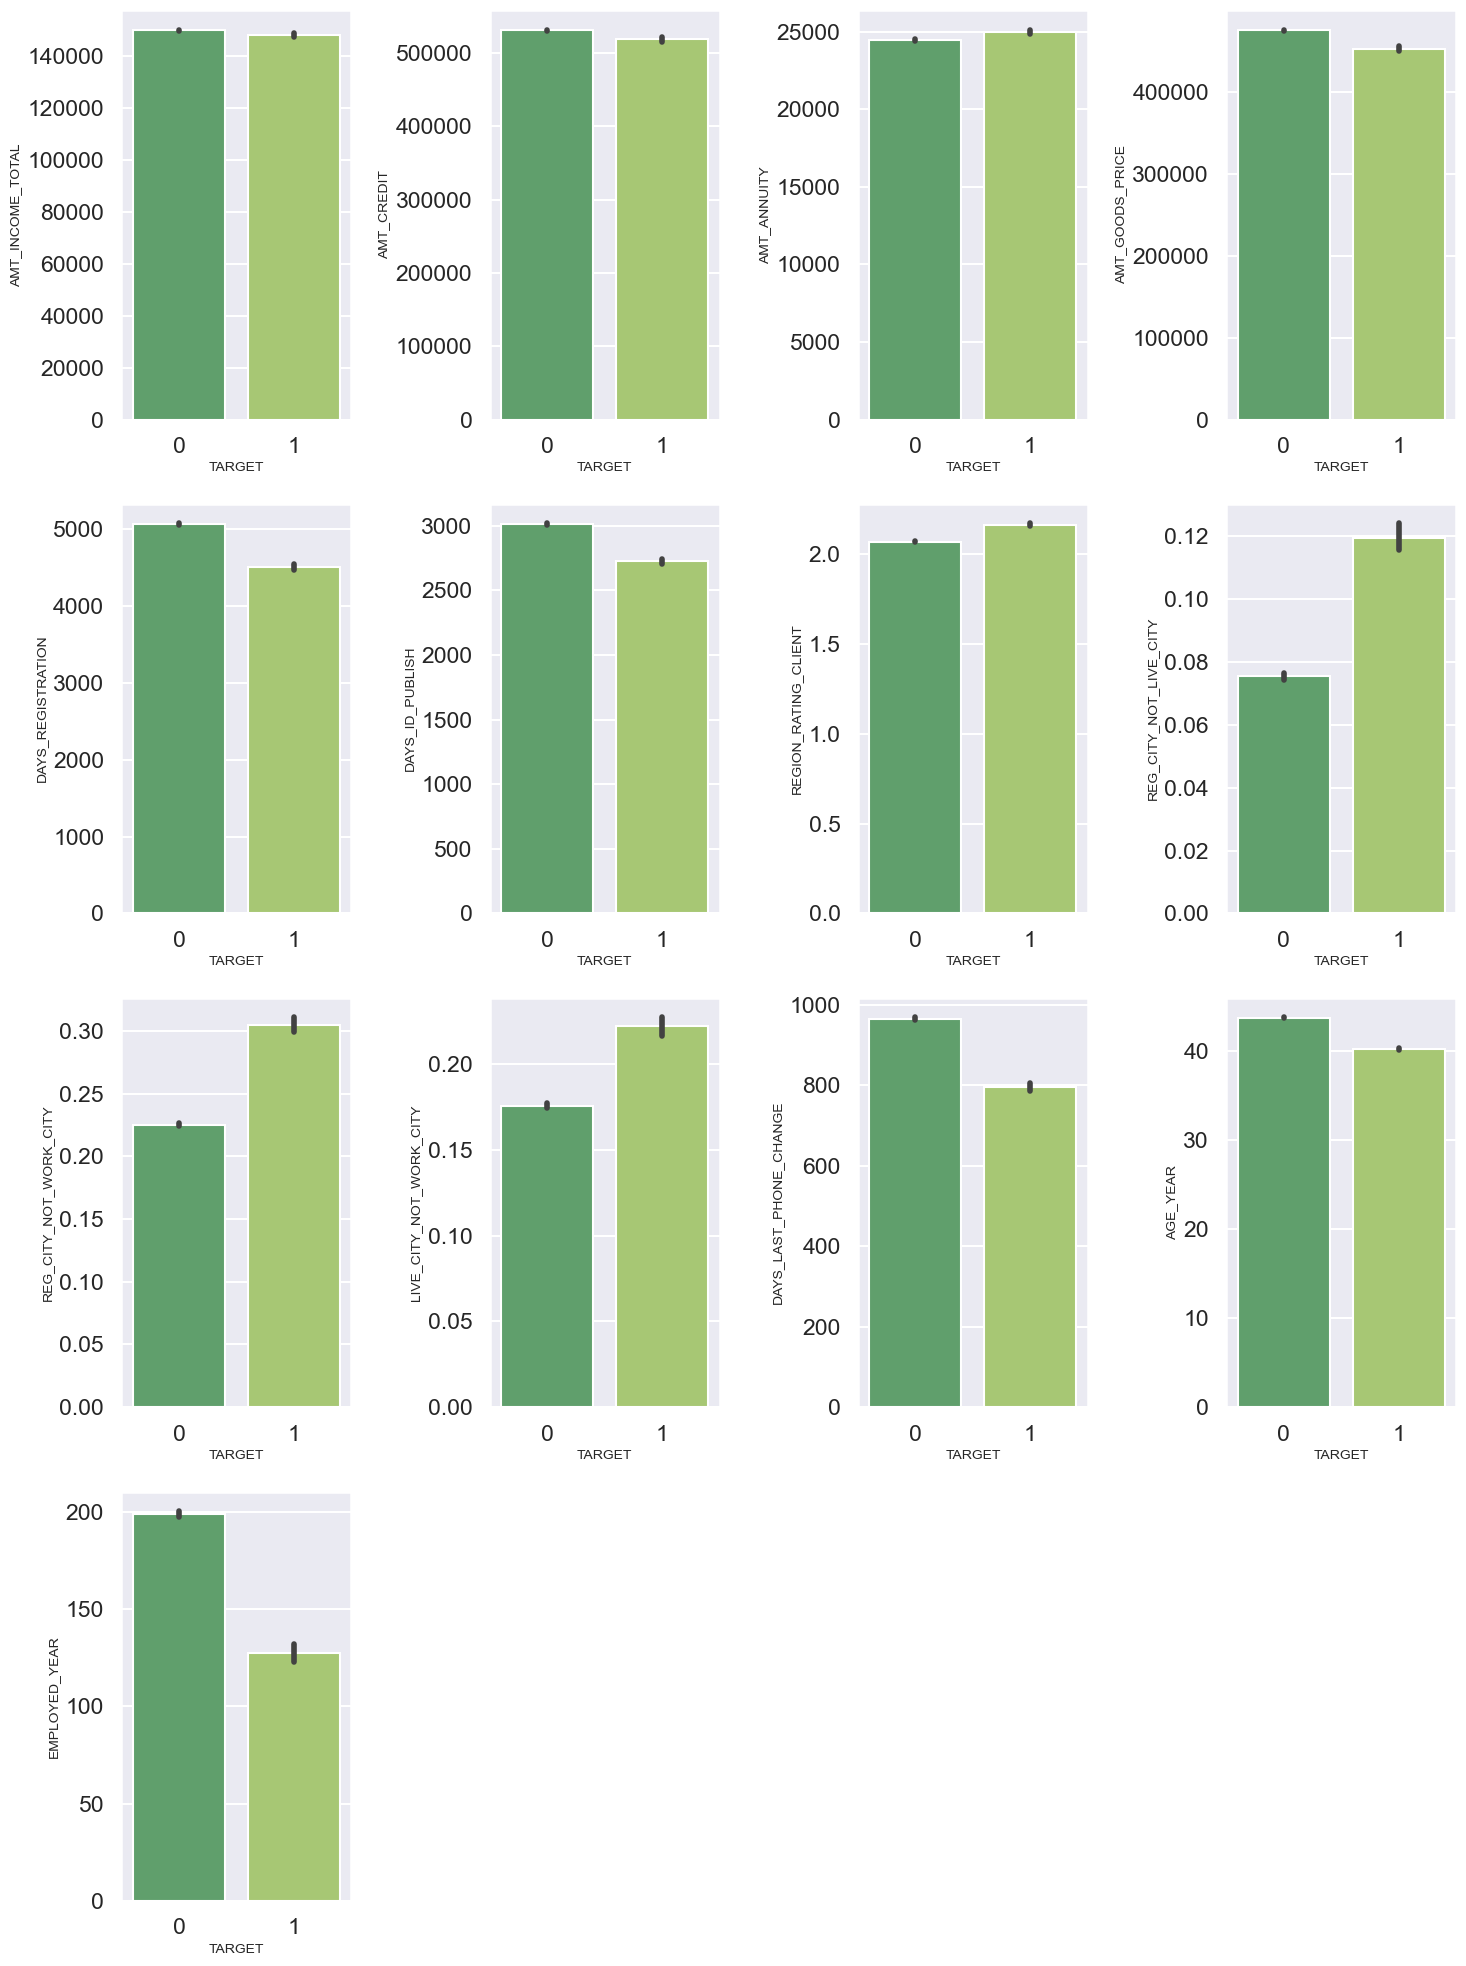

In [54]:
#Segmented Univariate Analysis overall

# Segmented Univariate Analysis - df_clean
# Analyze impact of target on other quantitative variables.

# Running analysis on selected relevant columns for segmented analysis

seg_numerical_columns = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE", "DAYS_REGISTRATION", 
              "DAYS_ID_PUBLISH", "REGION_RATING_CLIENT","REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", 
              "LIVE_CITY_NOT_WORK_CITY", "DAYS_LAST_PHONE_CHANGE", "AGE_YEAR", "EMPLOYED_YEAR"]

# Number of numerical columns
ln=len(seg_numerical_columns)
print("length: ",ln)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(5,figsize=(15,20))

# Running in loop to plot all columns as subplot
for column in seg_numerical_columns:
#     print("ct: ",ct)
    plt.subplot(m,n,ct)

    #     plt.yscale("log")
    sns.barplot(y=column,x="TARGET",data=df_clean,palette='summer')
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

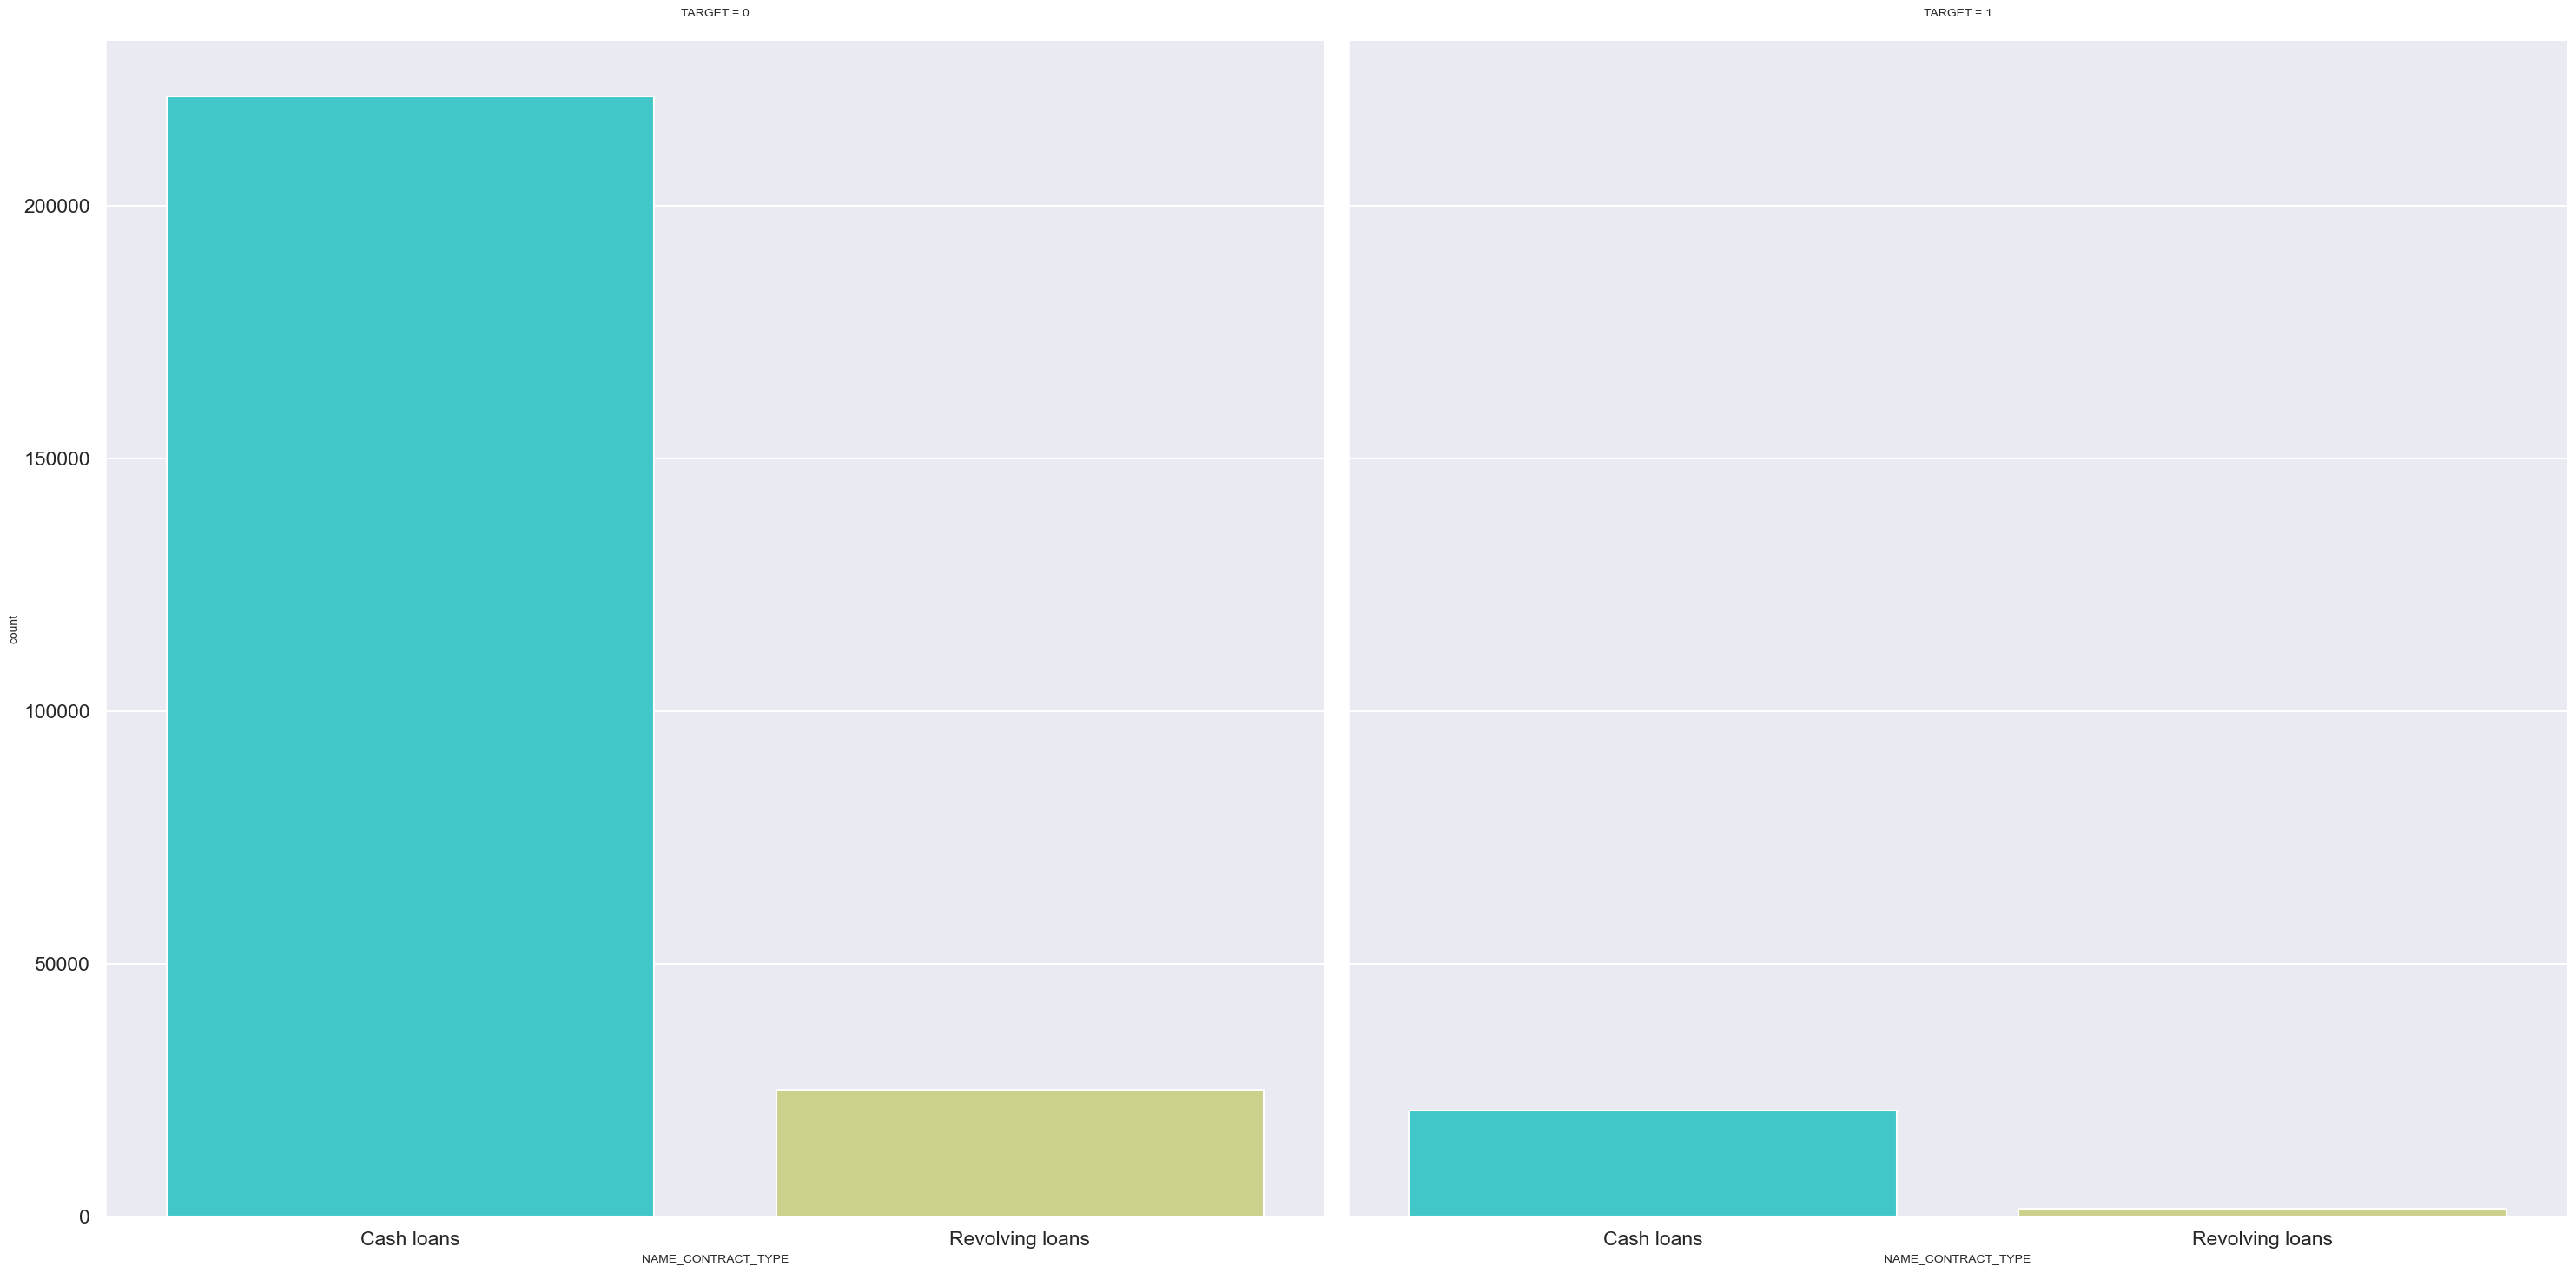

<Figure size 2000x500 with 0 Axes>

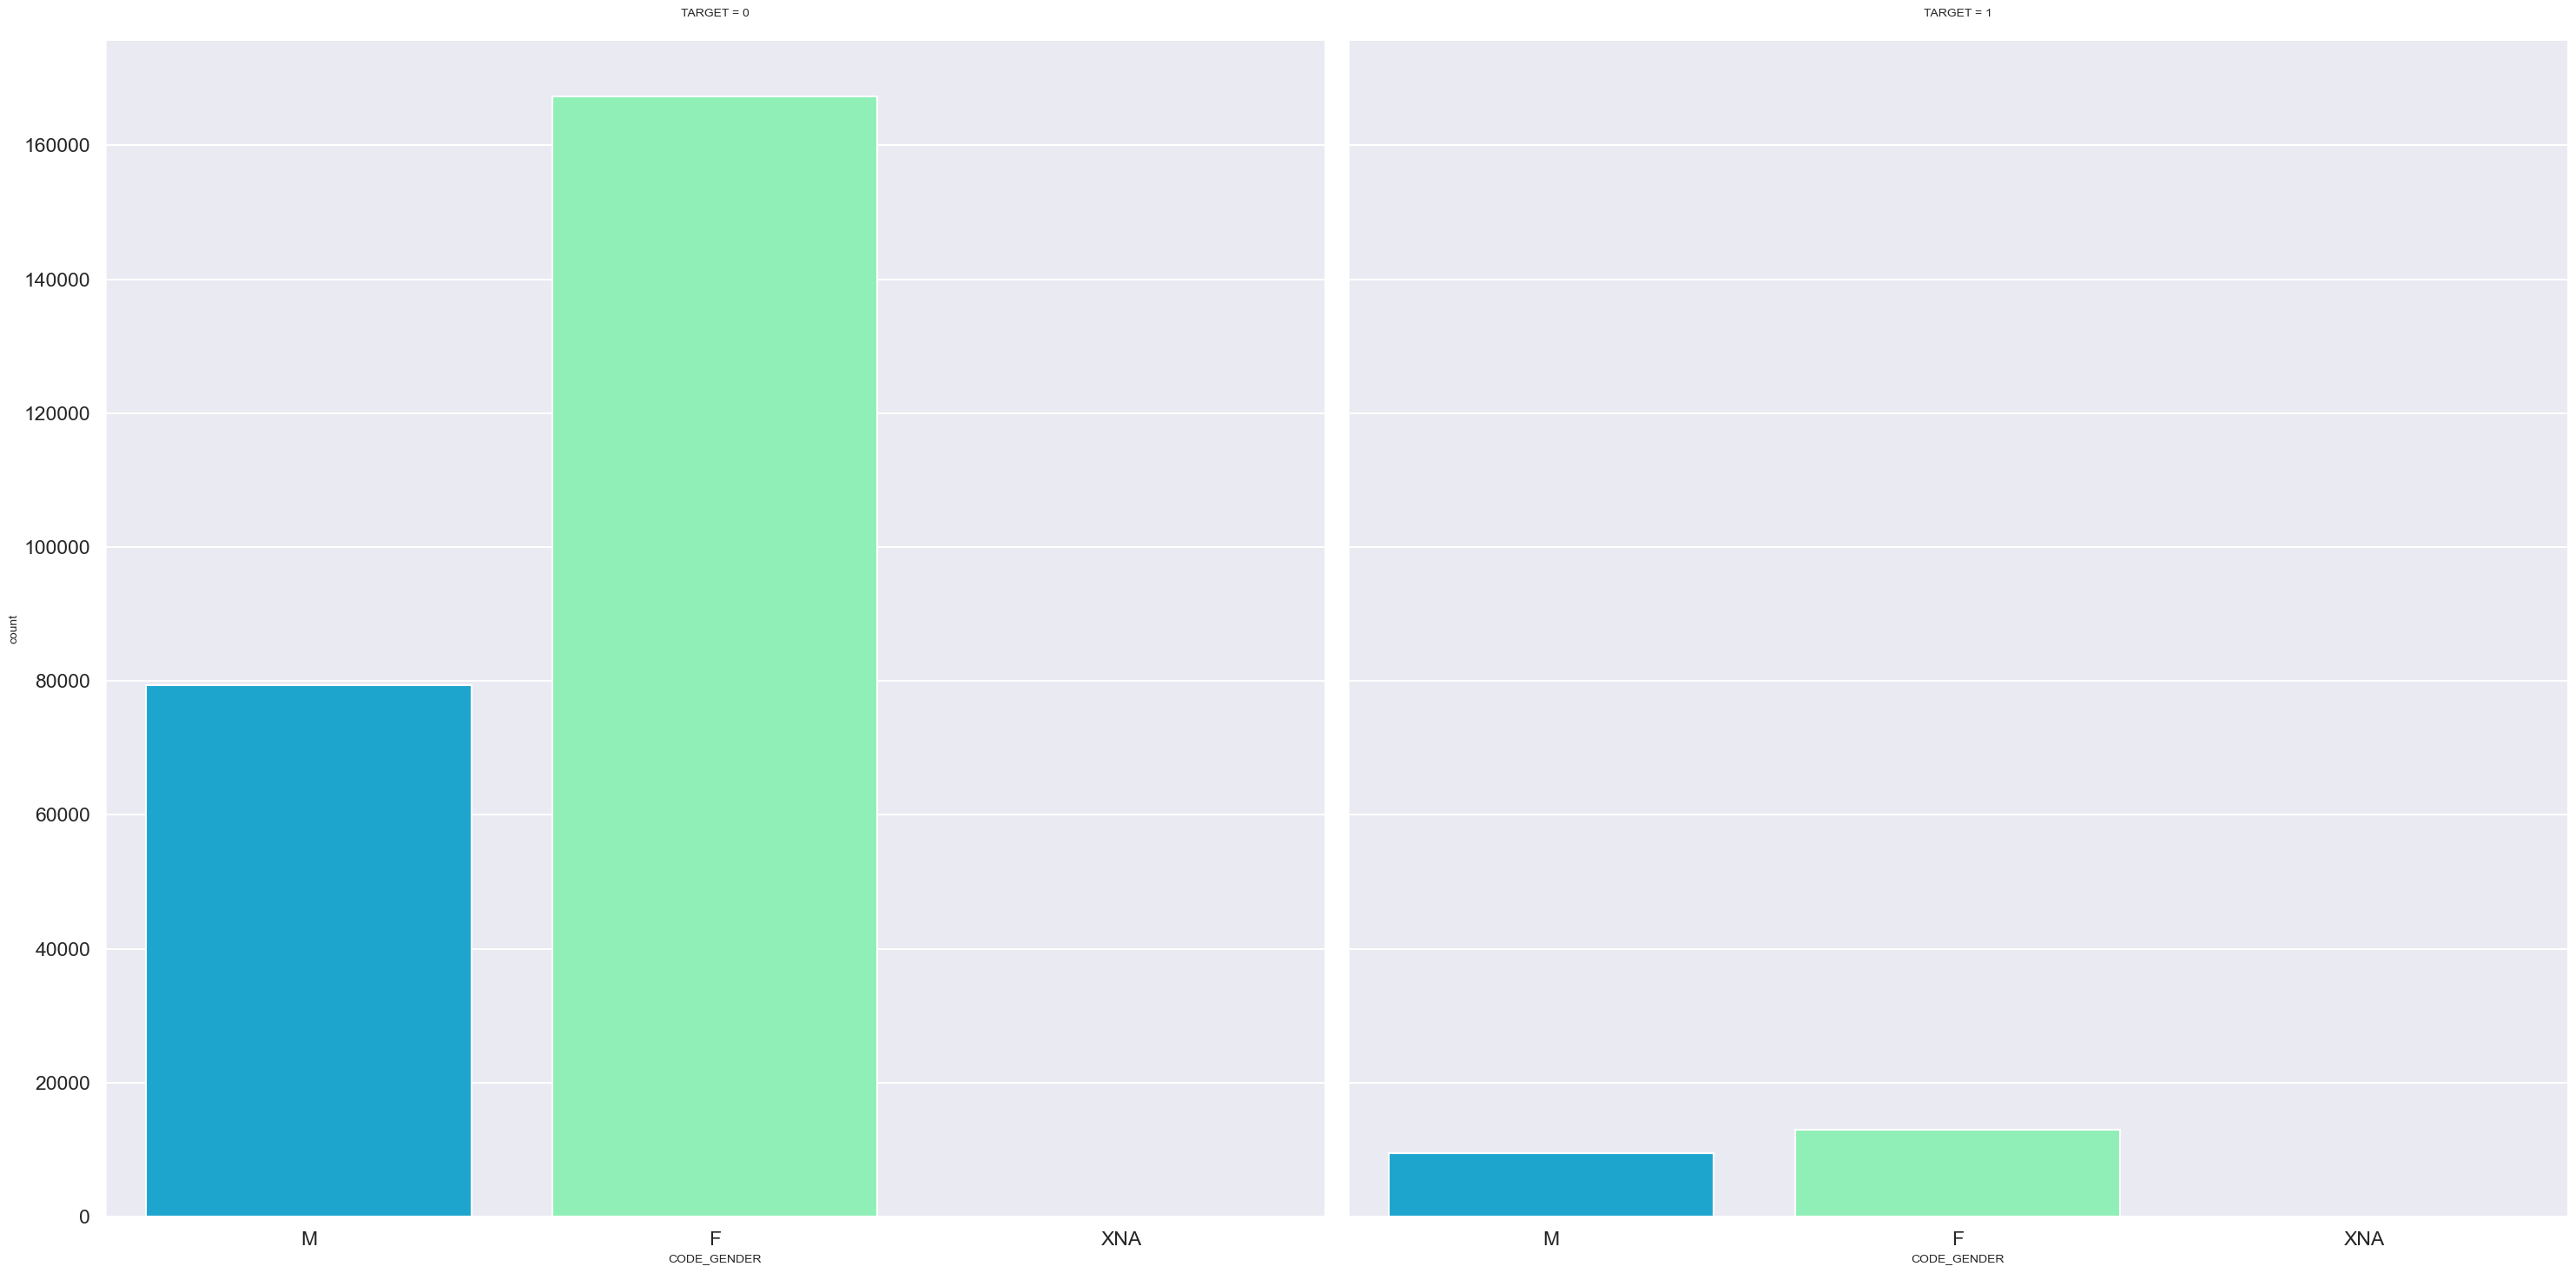

<Figure size 2000x500 with 0 Axes>

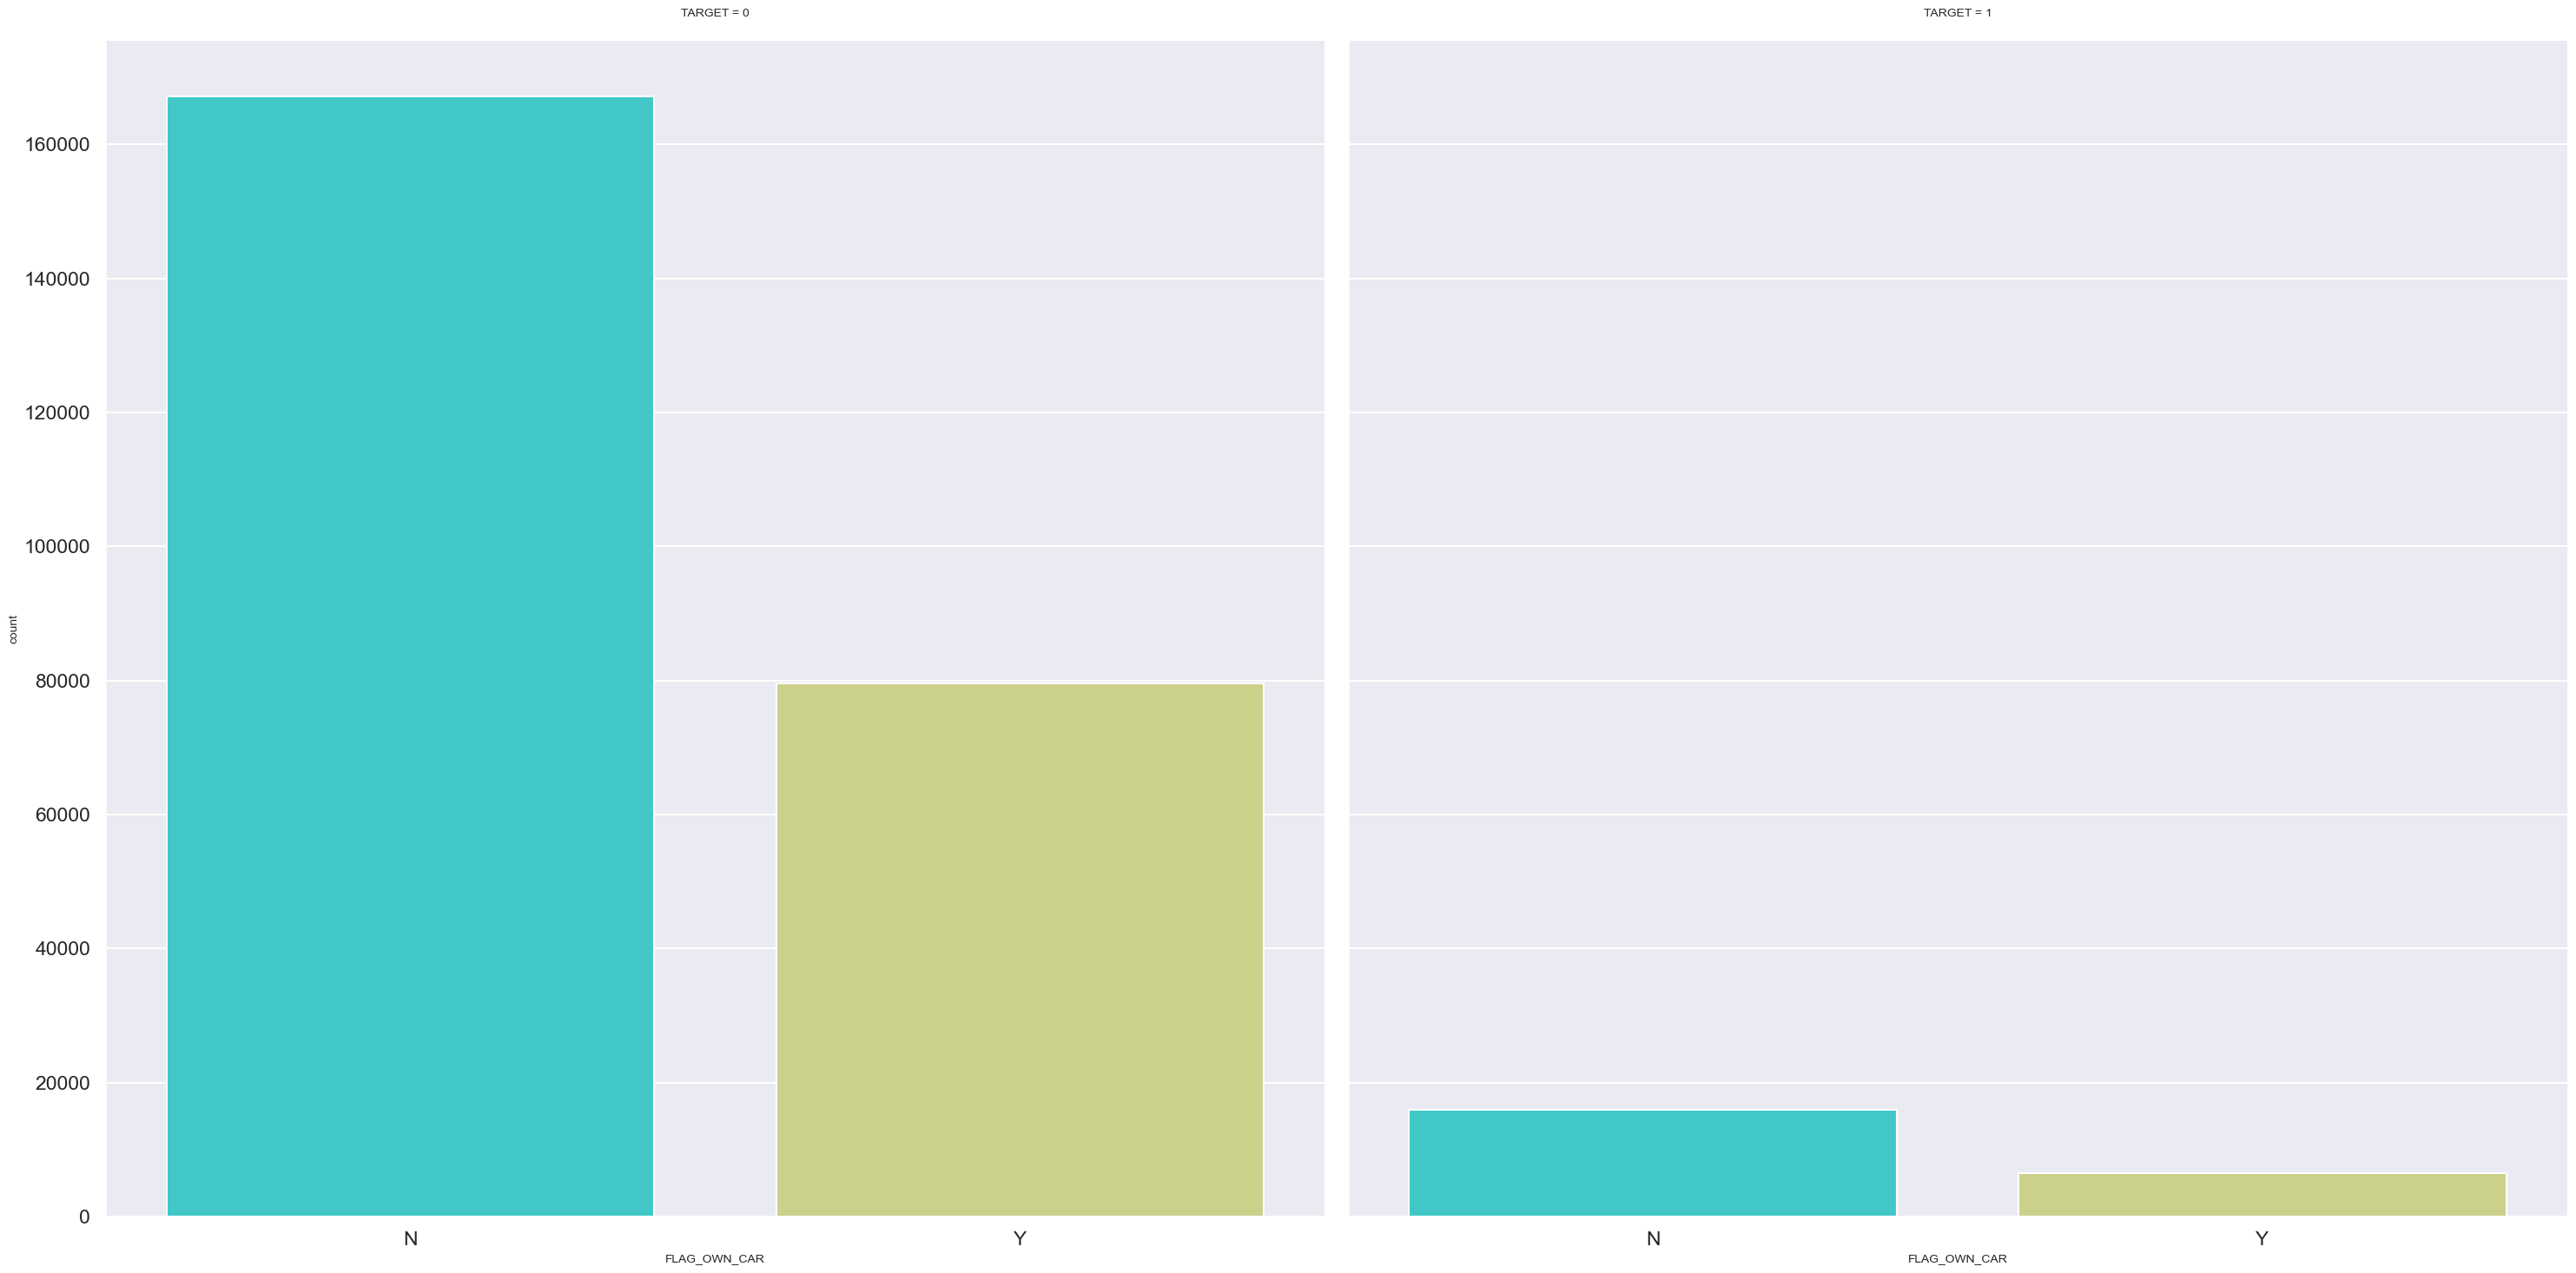

<Figure size 2000x500 with 0 Axes>

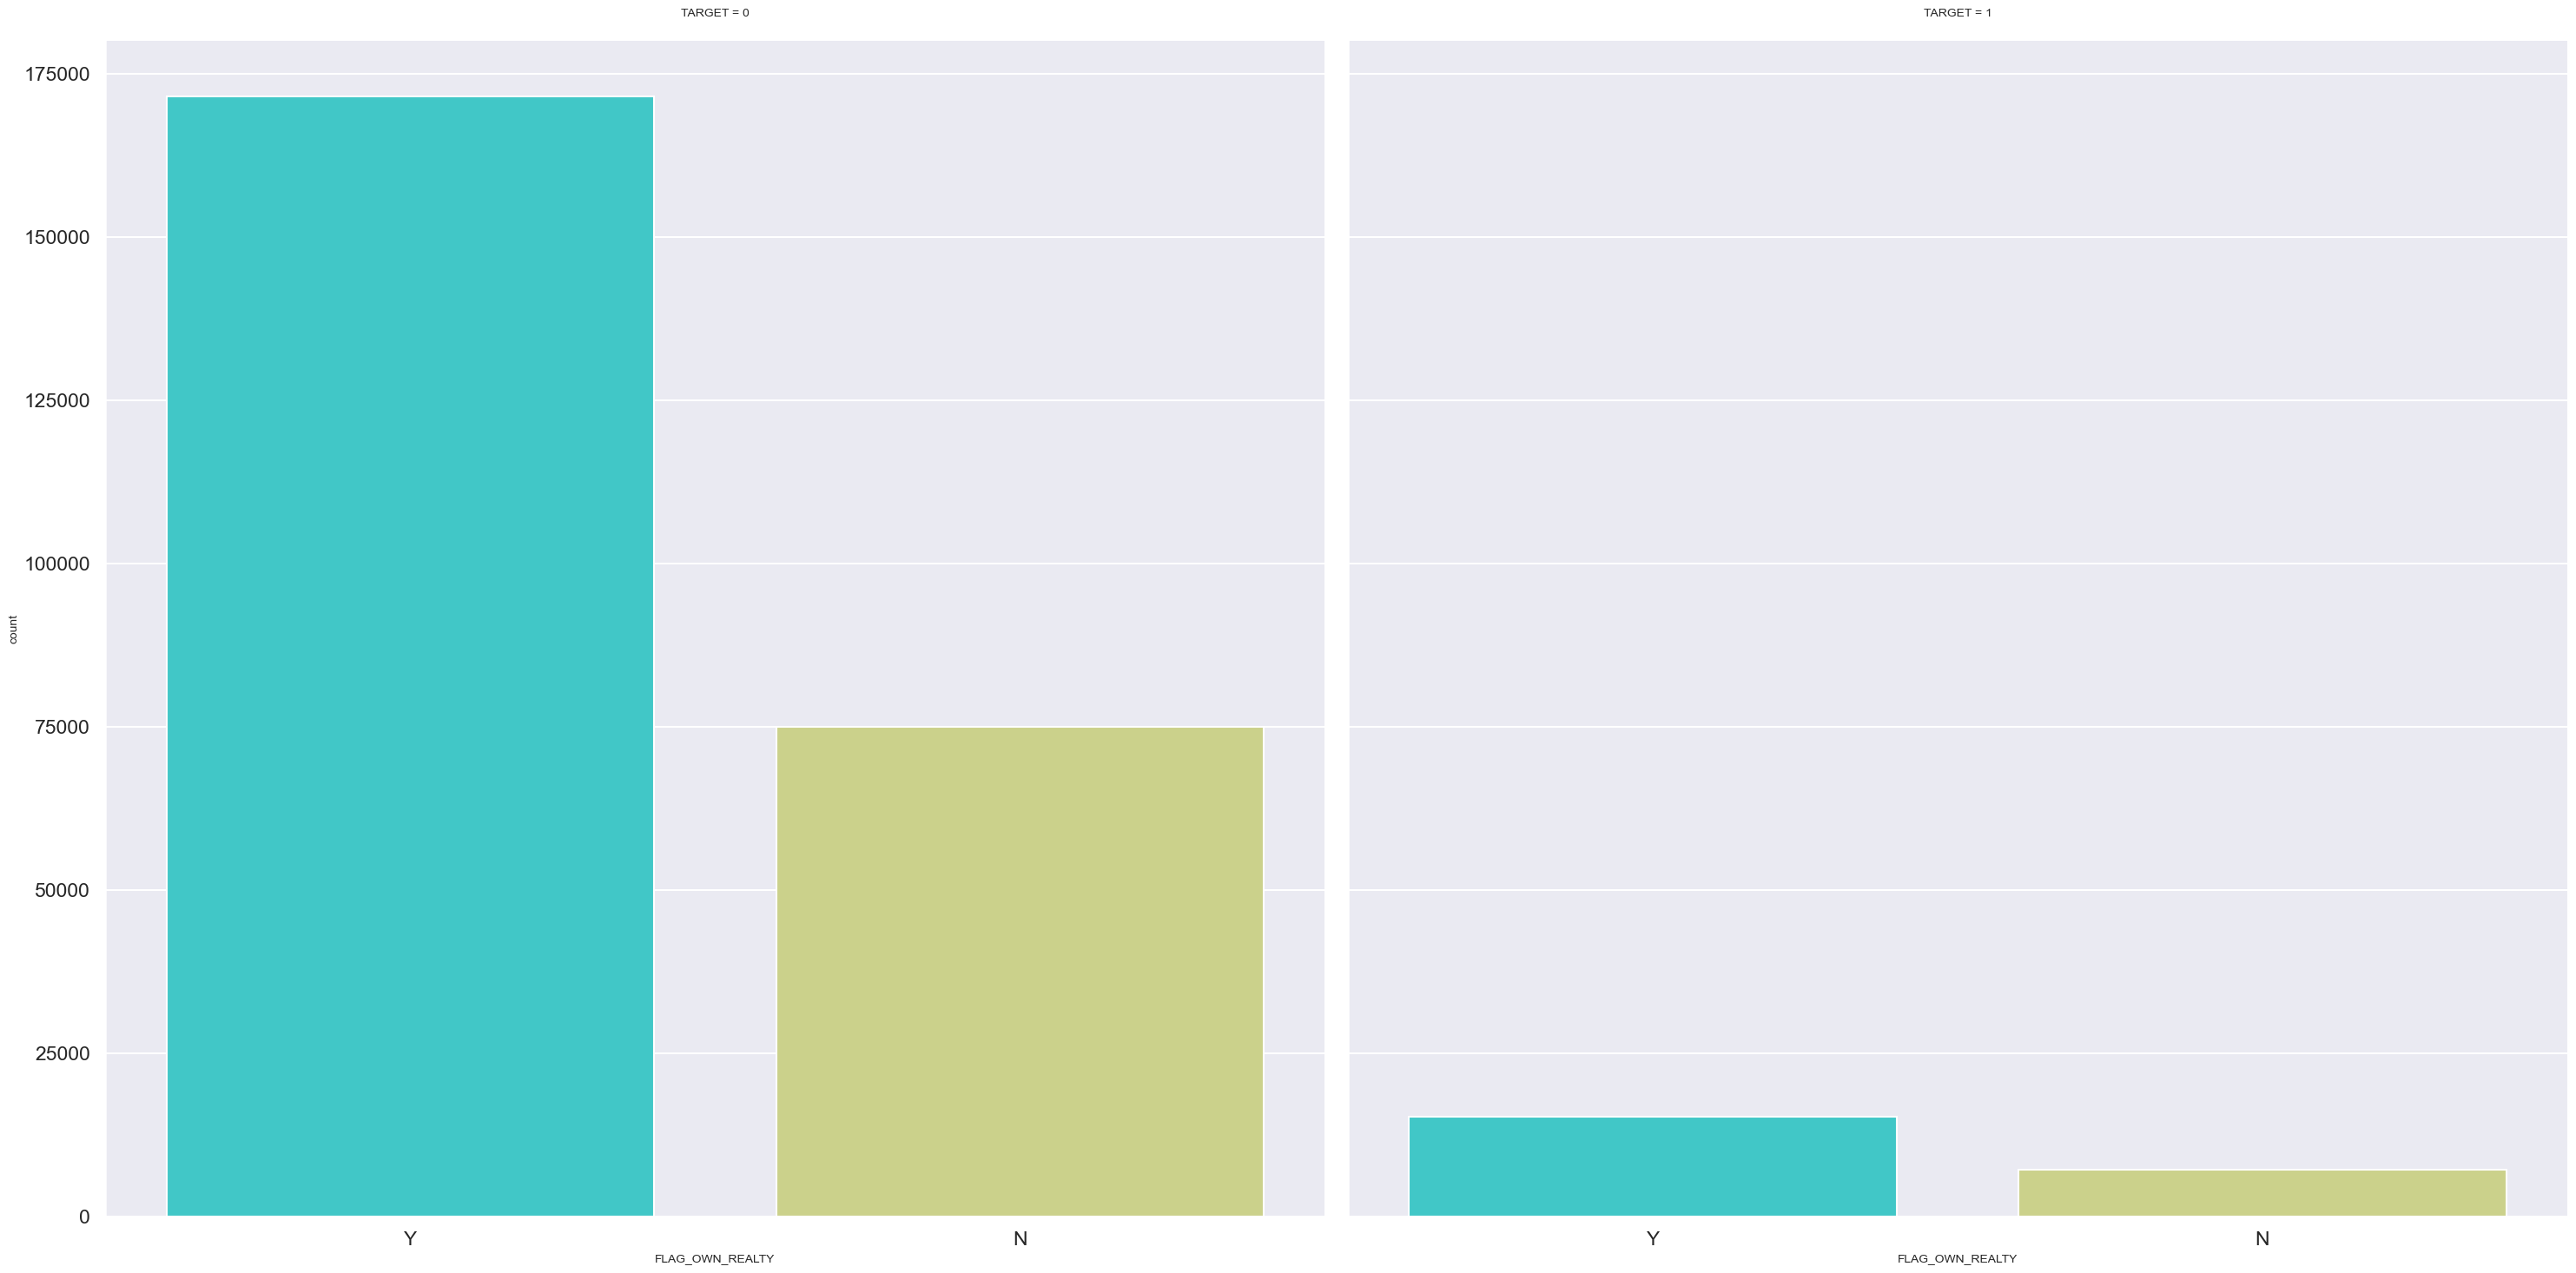

<Figure size 2000x500 with 0 Axes>

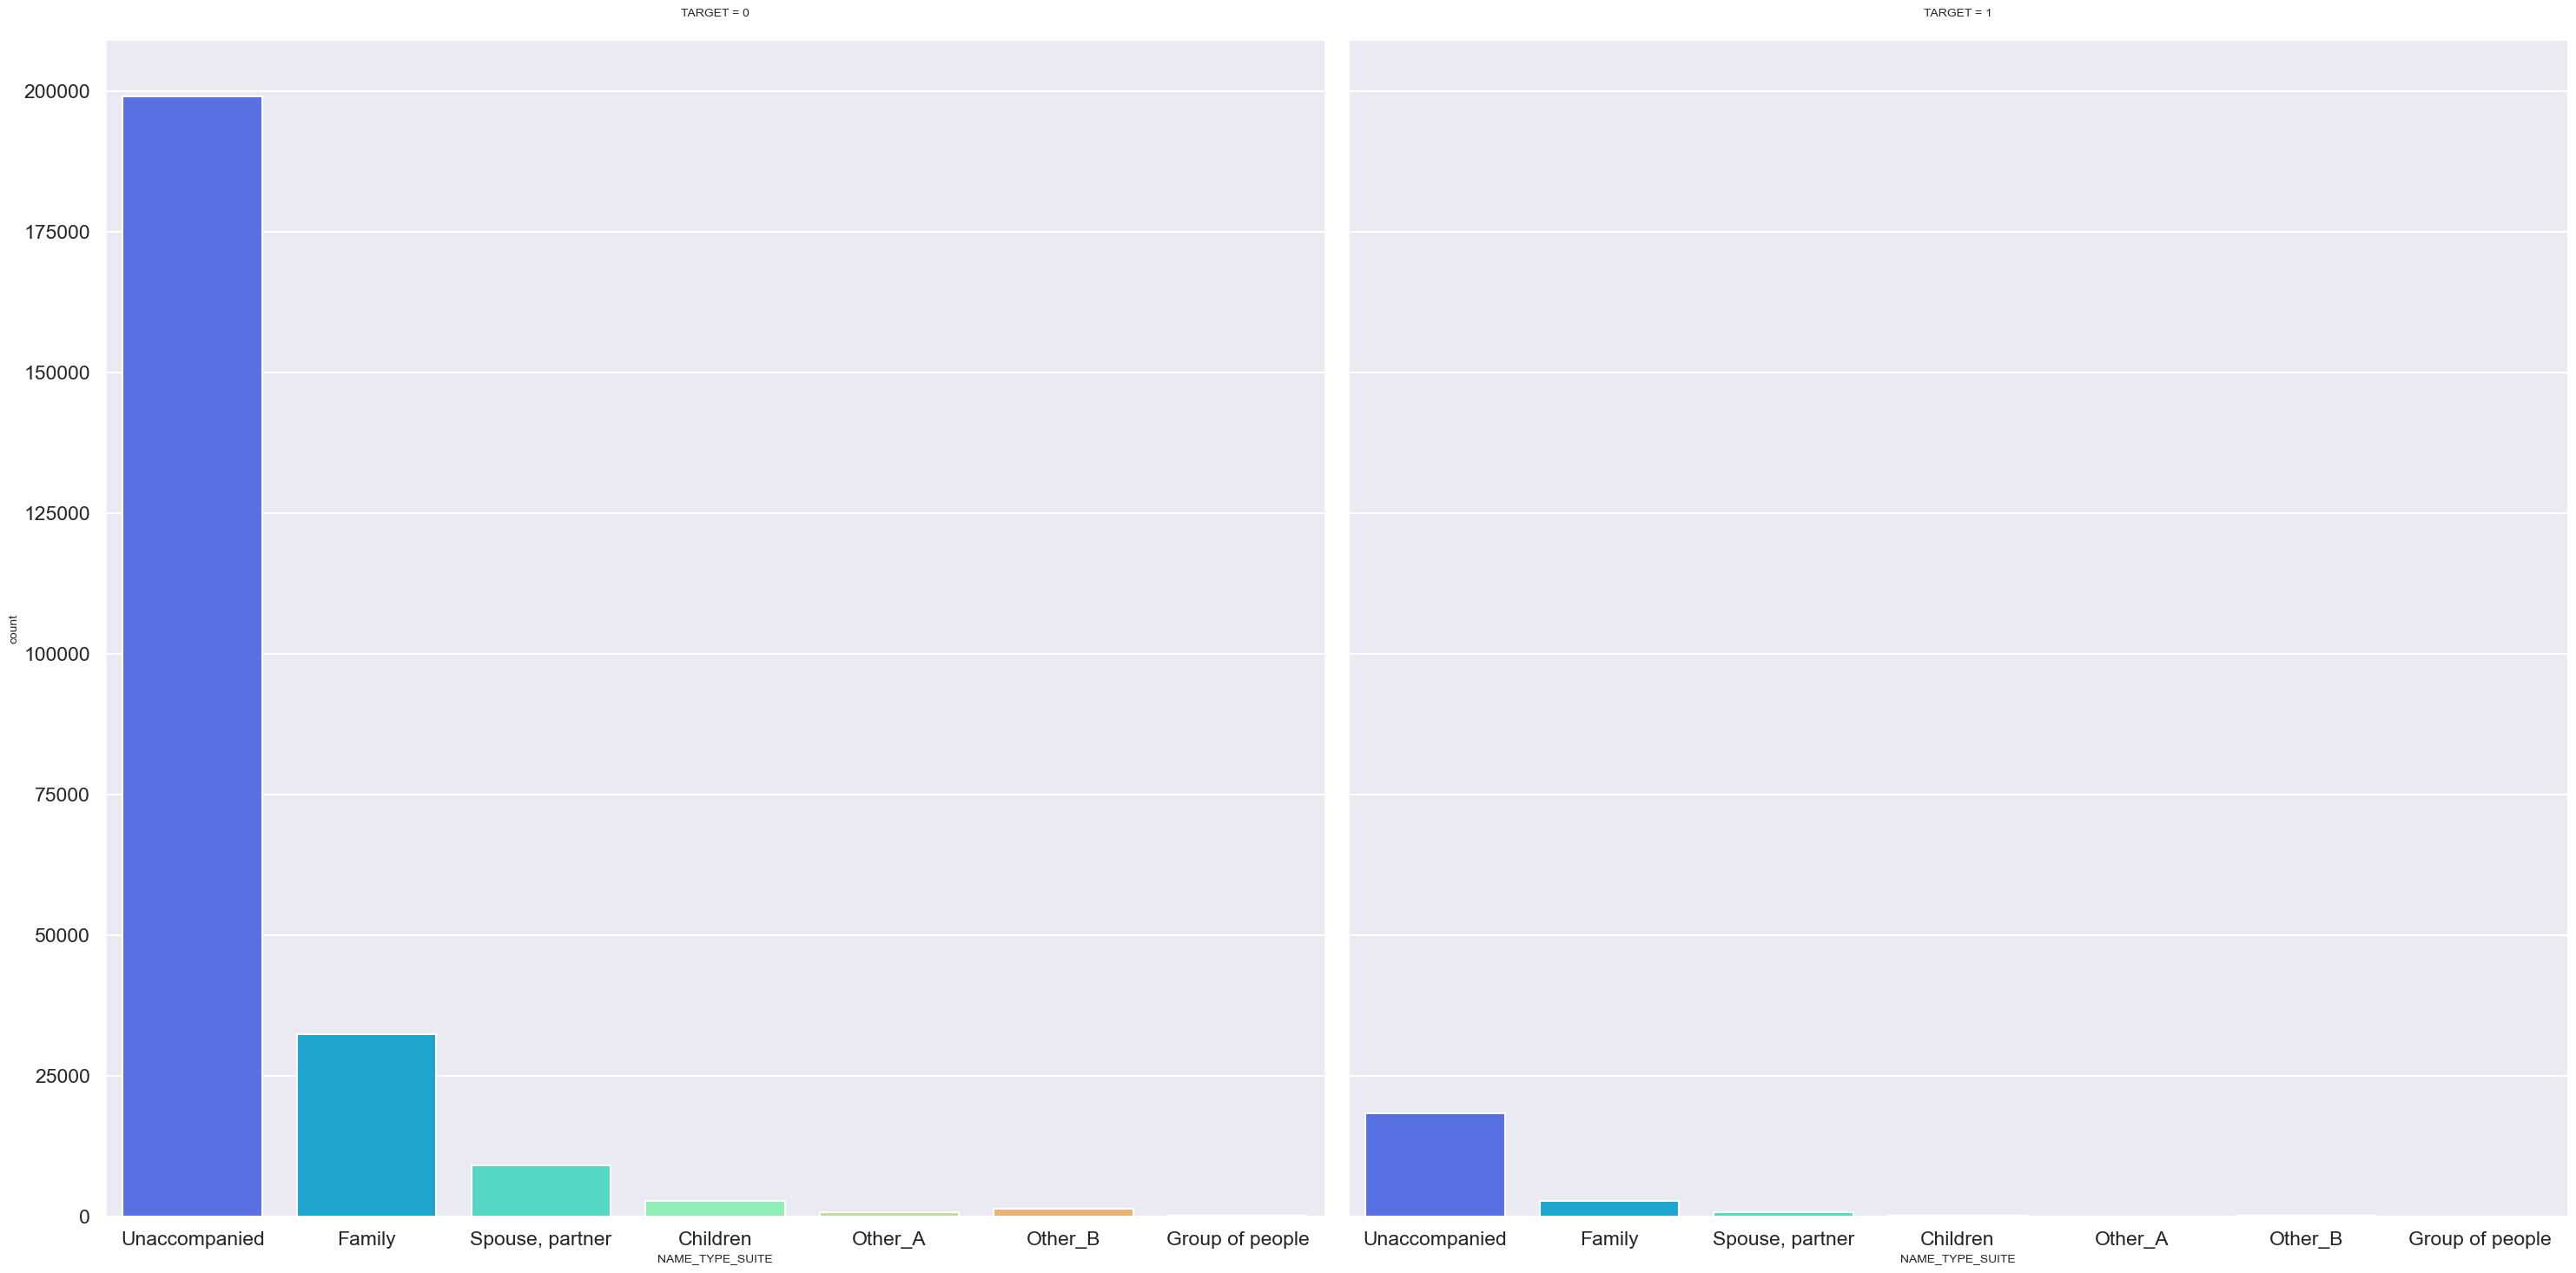

<Figure size 2000x500 with 0 Axes>

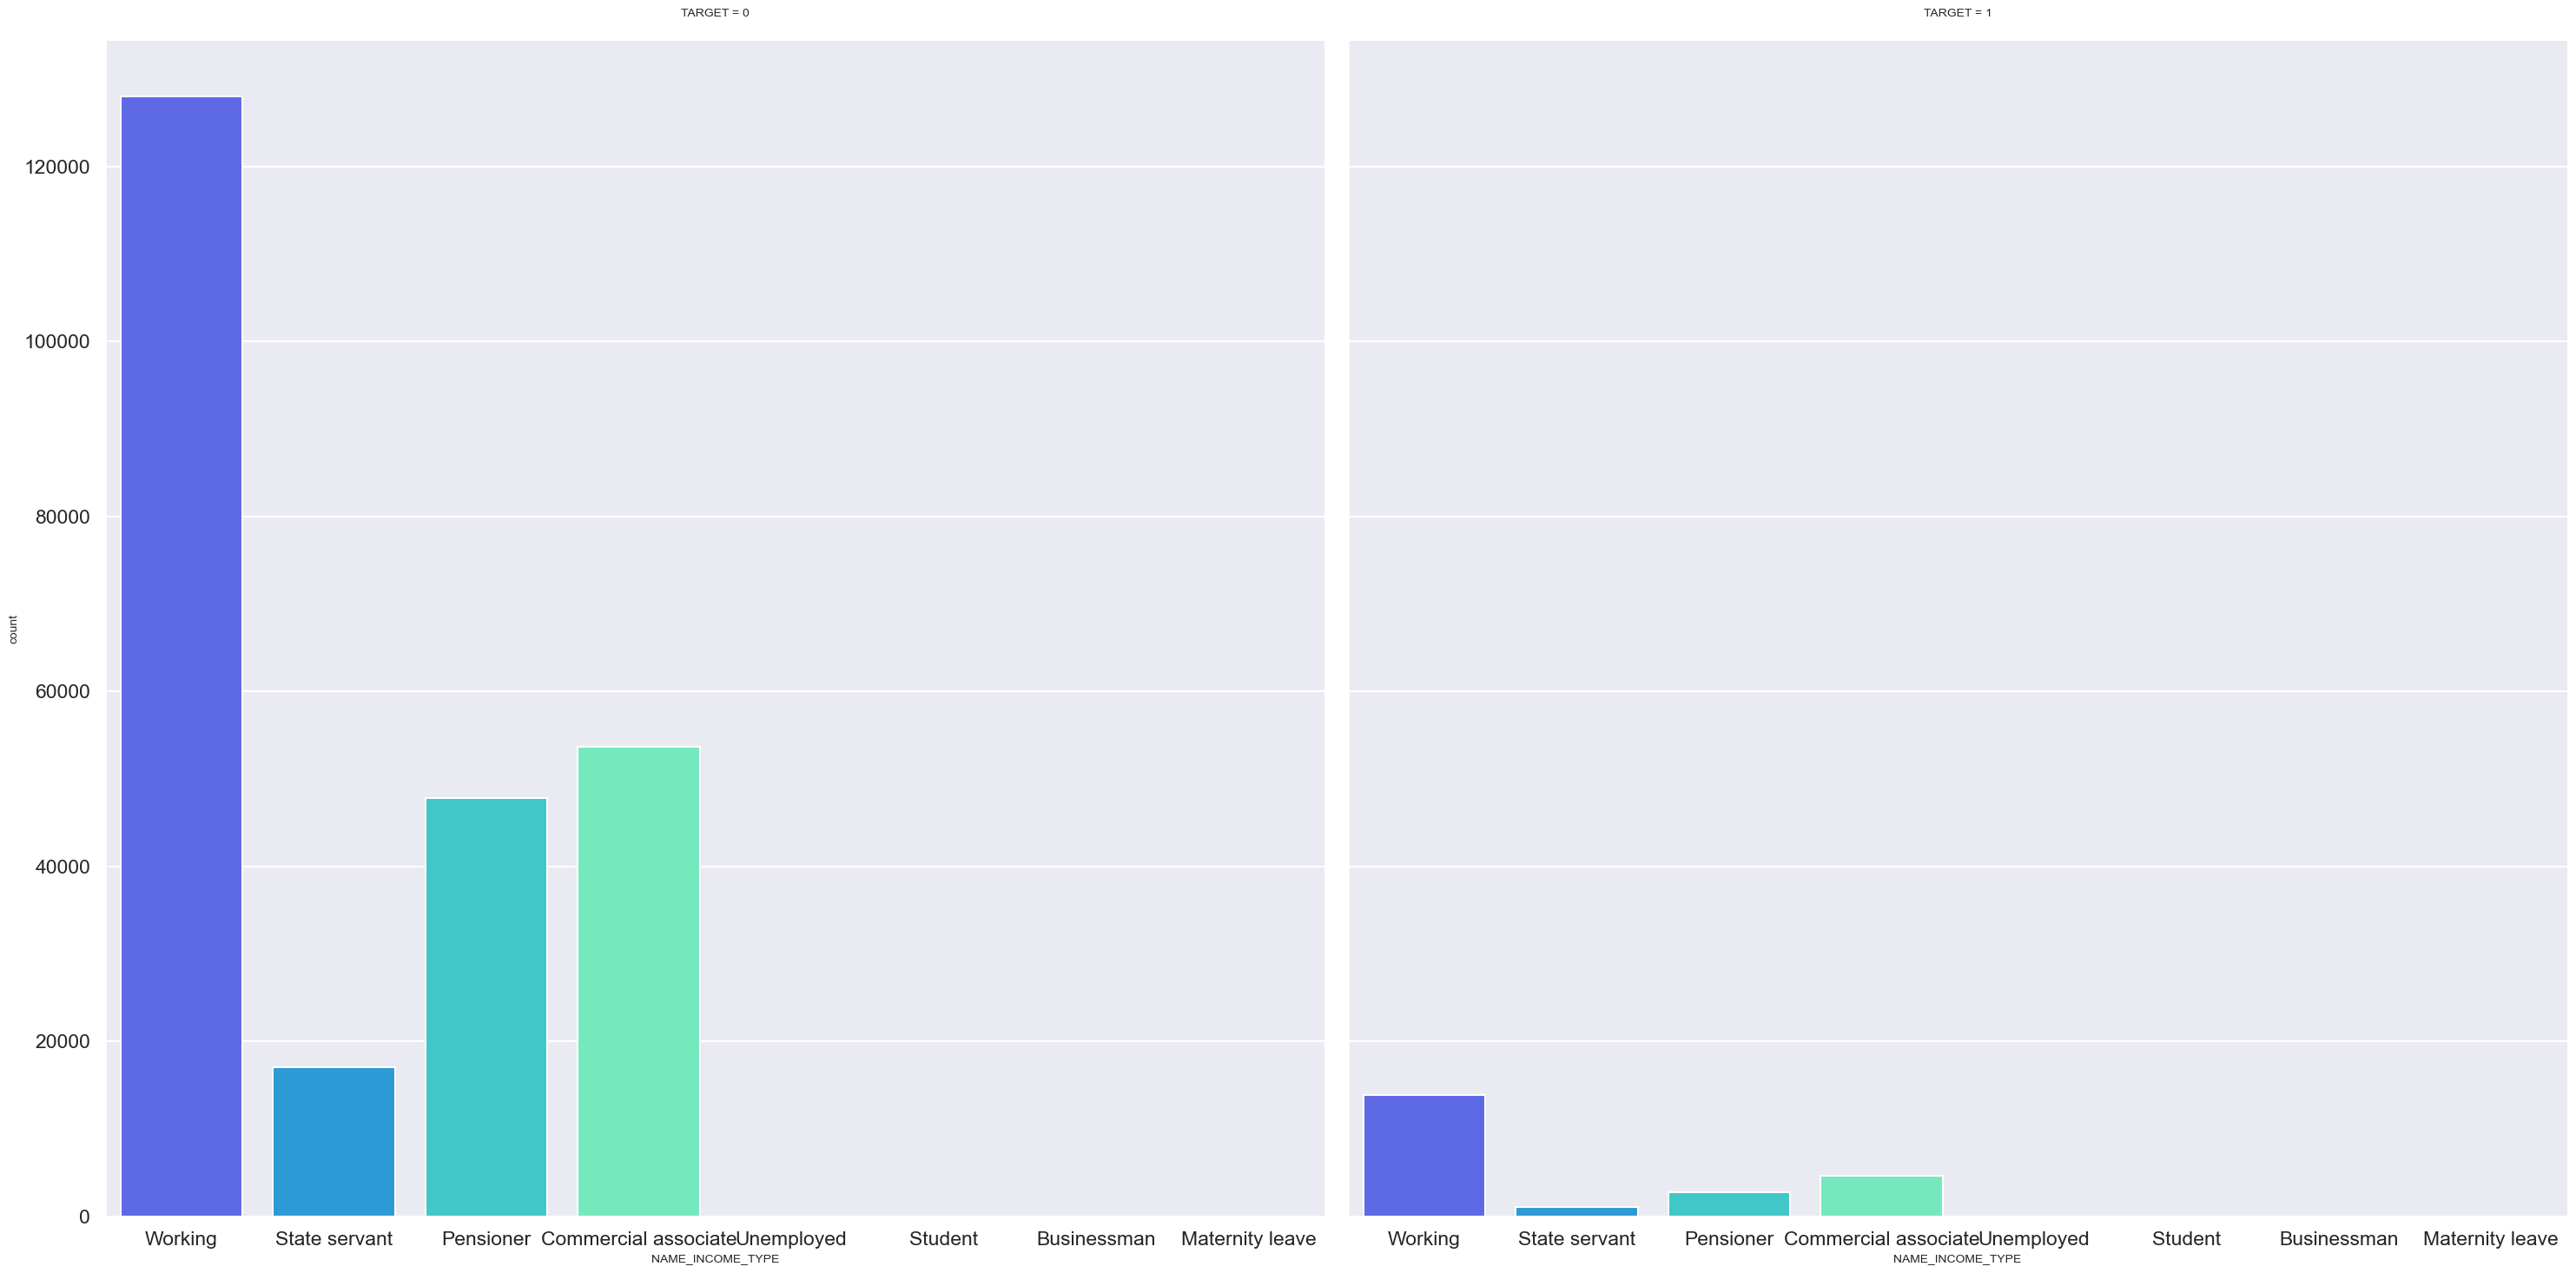

<Figure size 2000x500 with 0 Axes>

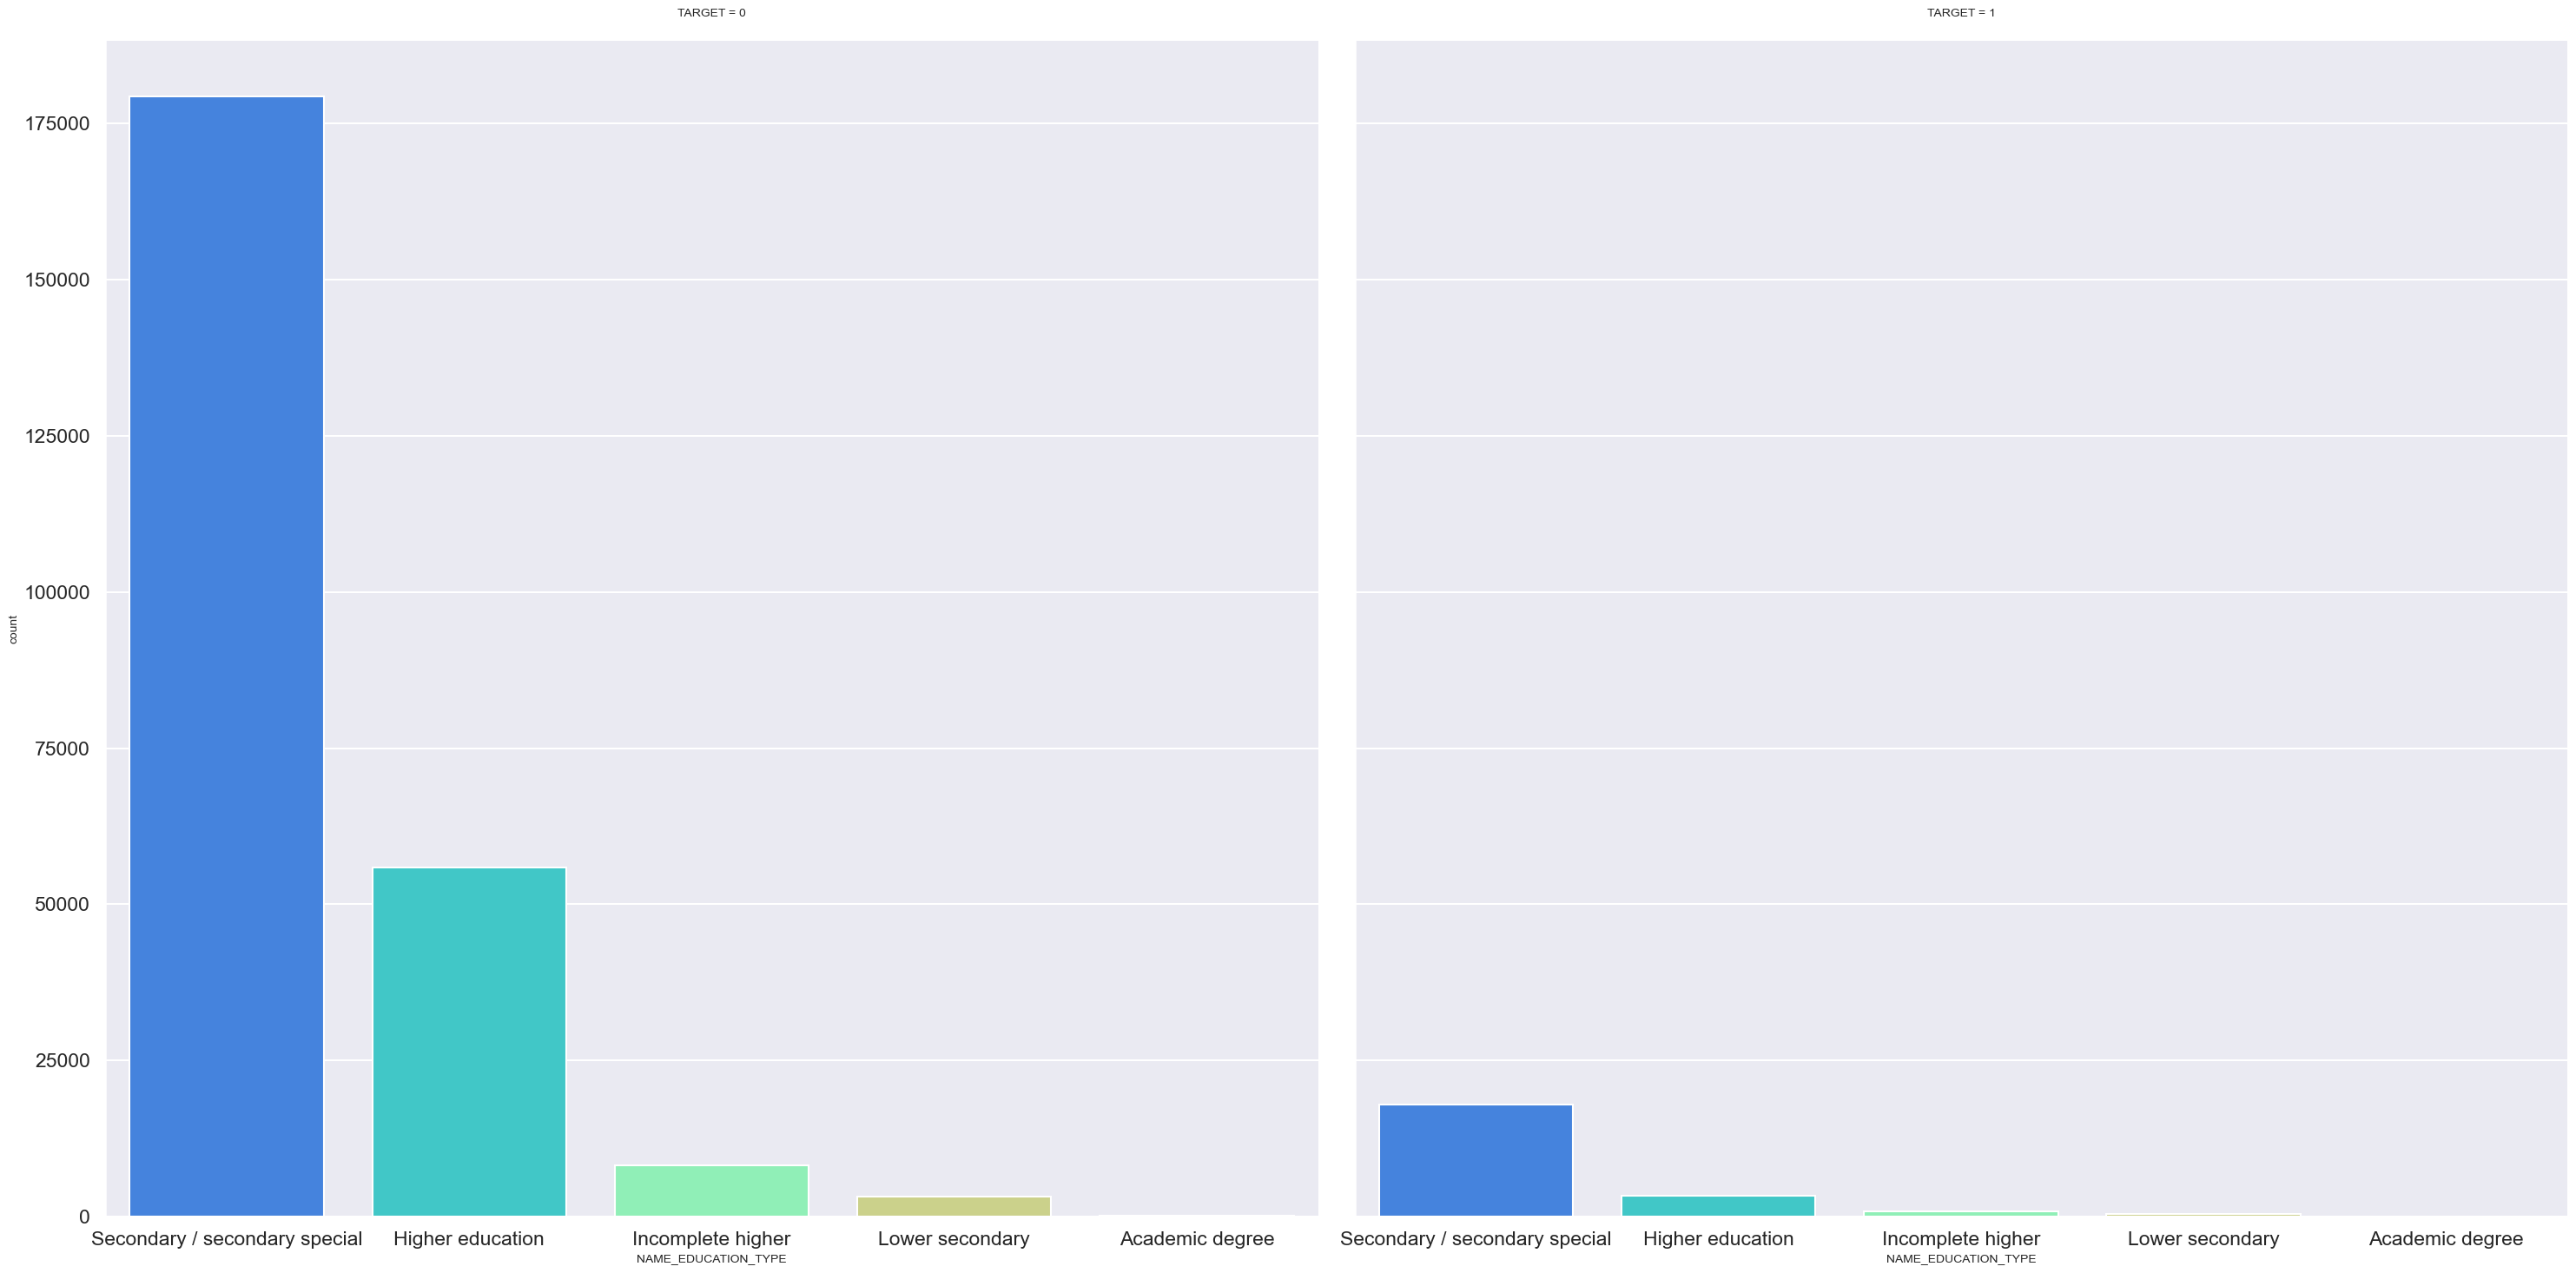

<Figure size 2000x500 with 0 Axes>

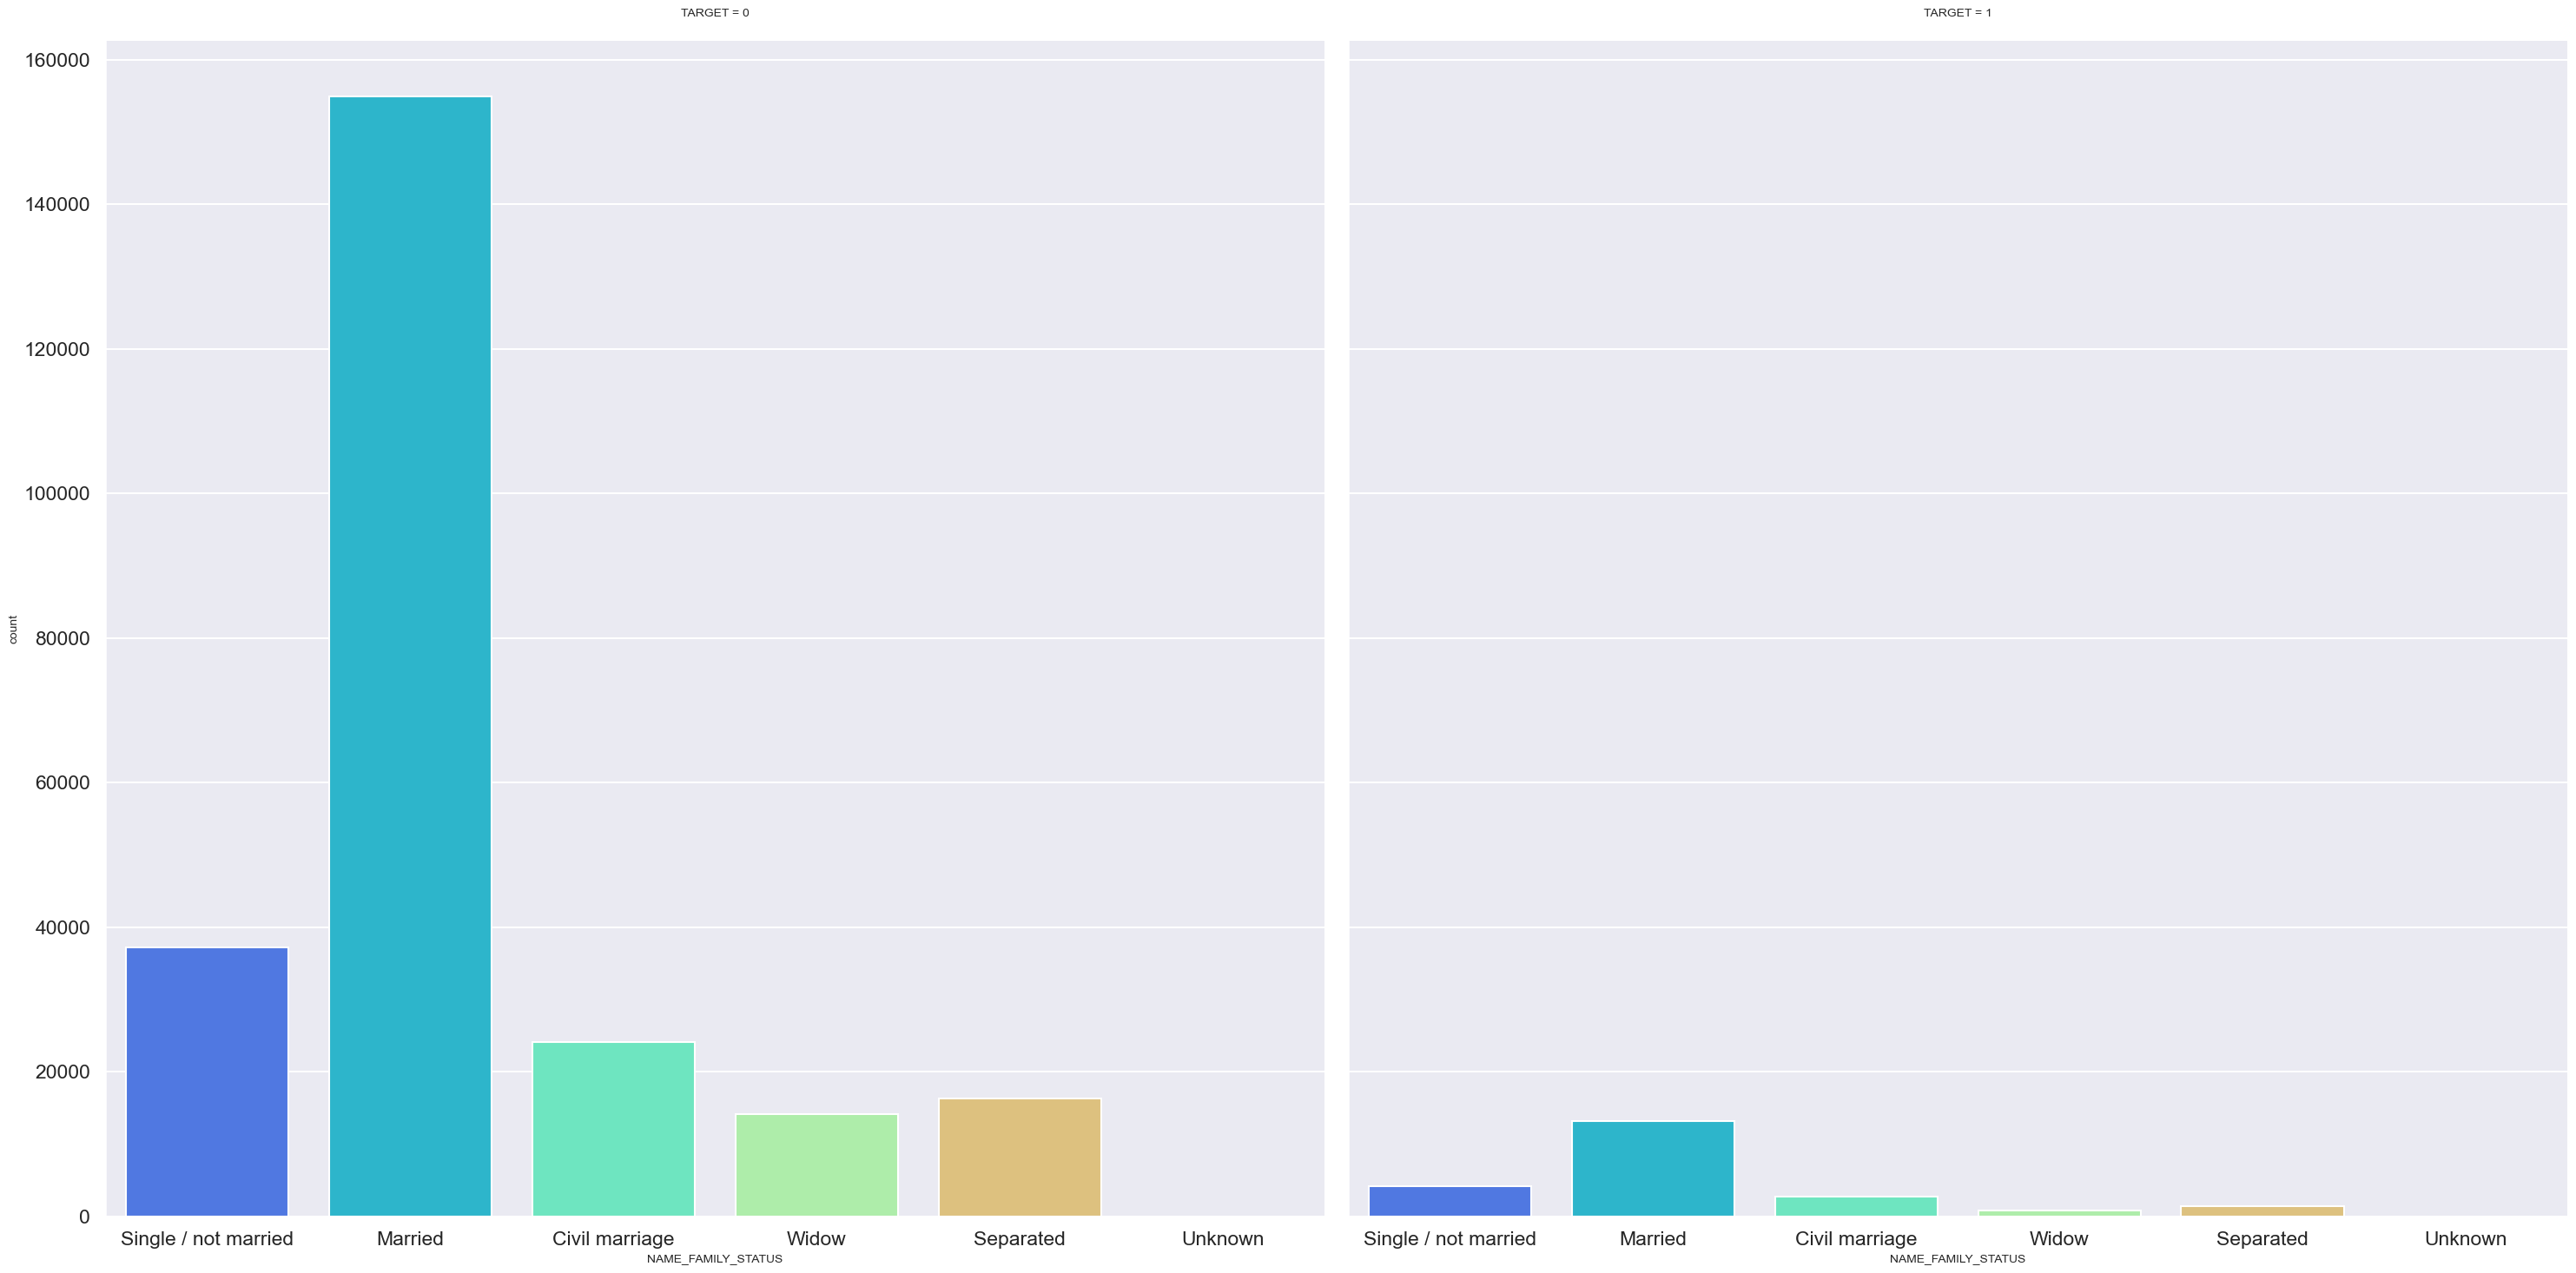

<Figure size 2000x500 with 0 Axes>

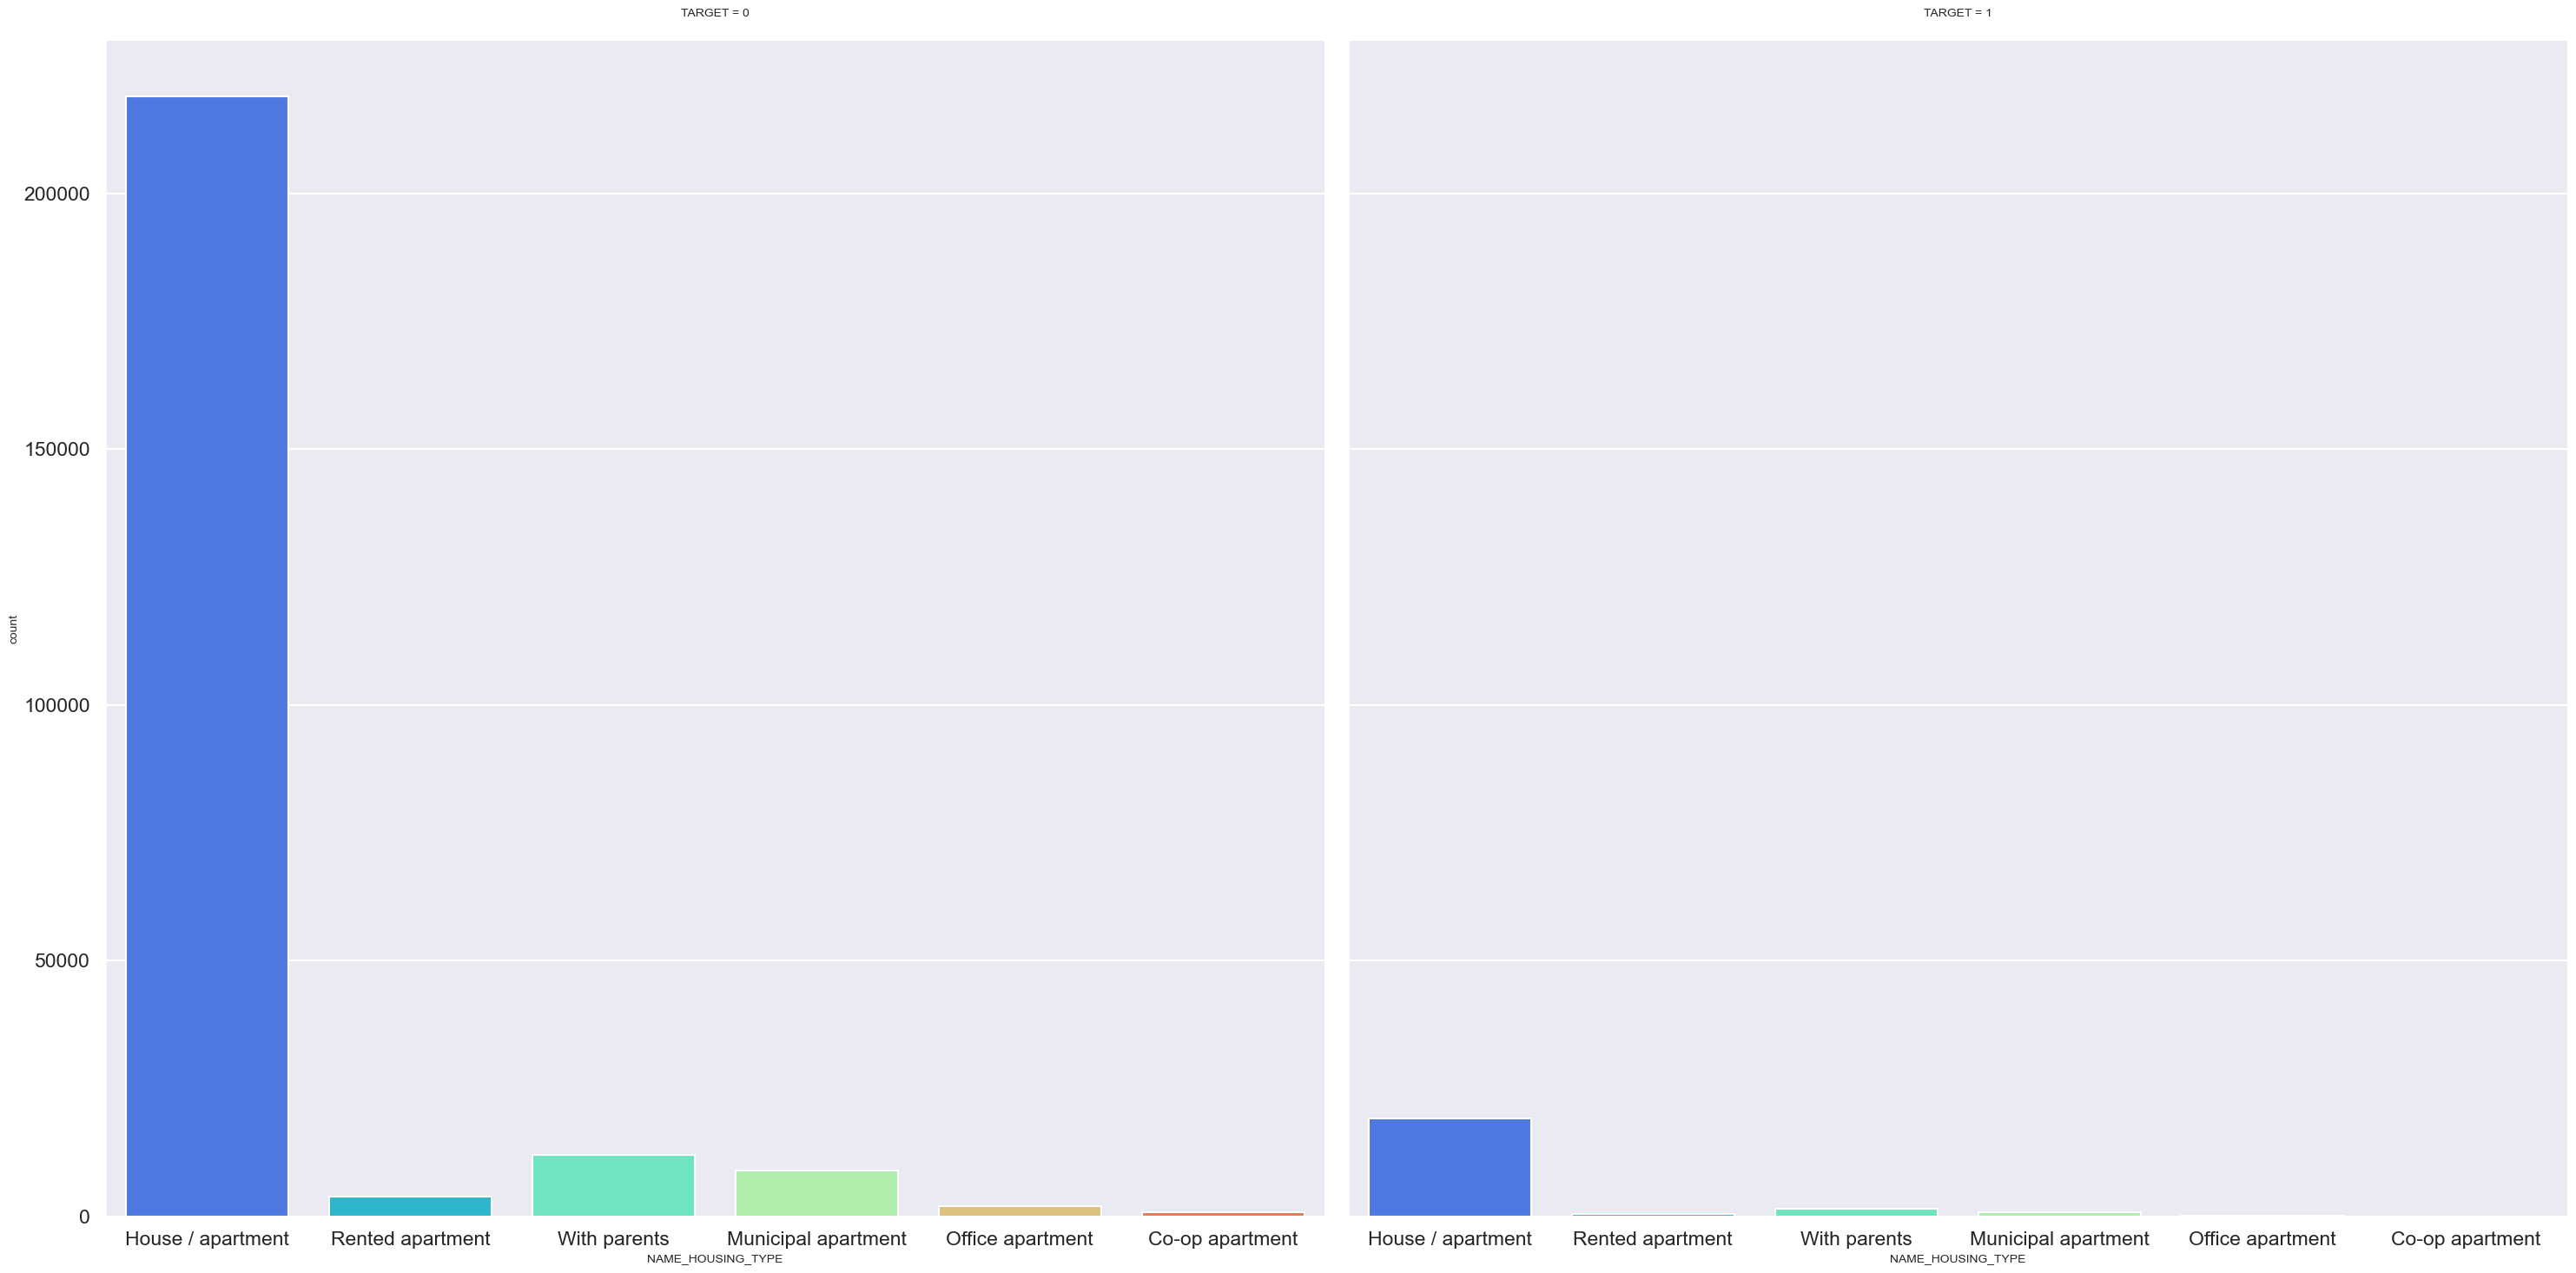

In [55]:
# Segmented Univariate Analysis - df_clean
# Analyze impact of target on other categorical variables.

seg_numerical_columns = ["NAME_CONTRACT_TYPE", "CODE_GENDER",
 "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
 "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

# Running in loop to plot all columns
for column in seg_numerical_columns:
    plt.figure(5,figsize=(20,5))
    sns.catplot(x=column, col= 'TARGET',
                data=df_clean, kind="count", height = 15, aspect = 1, palette='rainbow')
    plt.show() 
    
   

# 12. Bivariate Analysis on df_clean¶

<Figure size 1000x500 with 0 Axes>

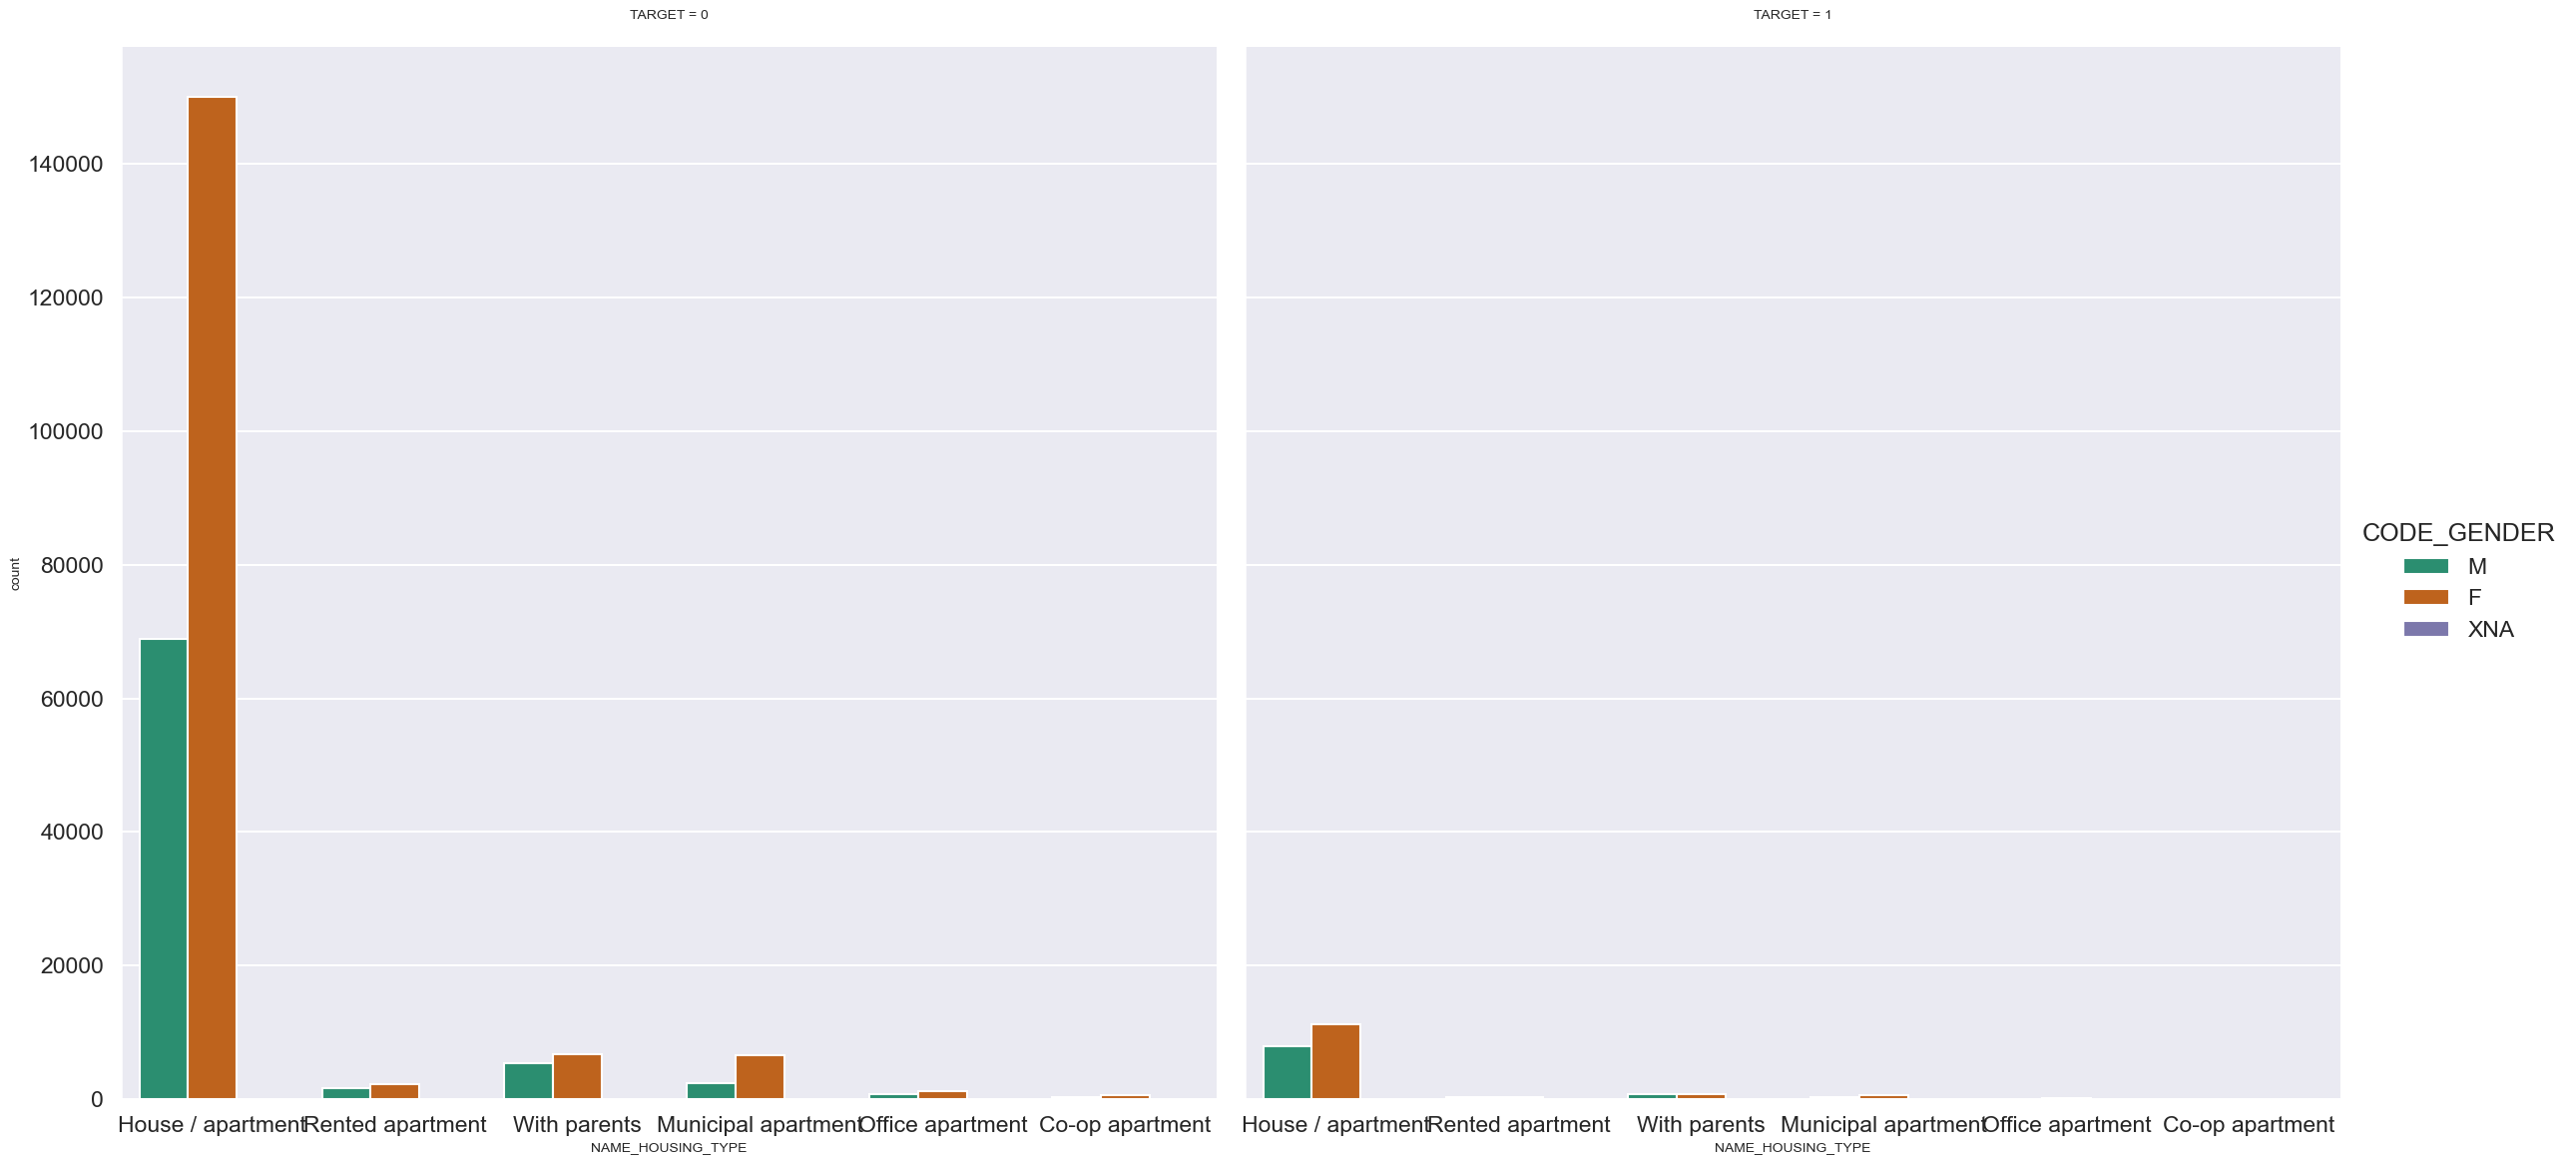

In [56]:
#Bivariate Analysis on df_clean¶

# Analyze impact of Gender and Housing Type on "Target" variable

plt.figure(6,figsize=(10,5))

column = "NAME_HOUSING_TYPE"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 1, palette = 'Dark2')
# plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

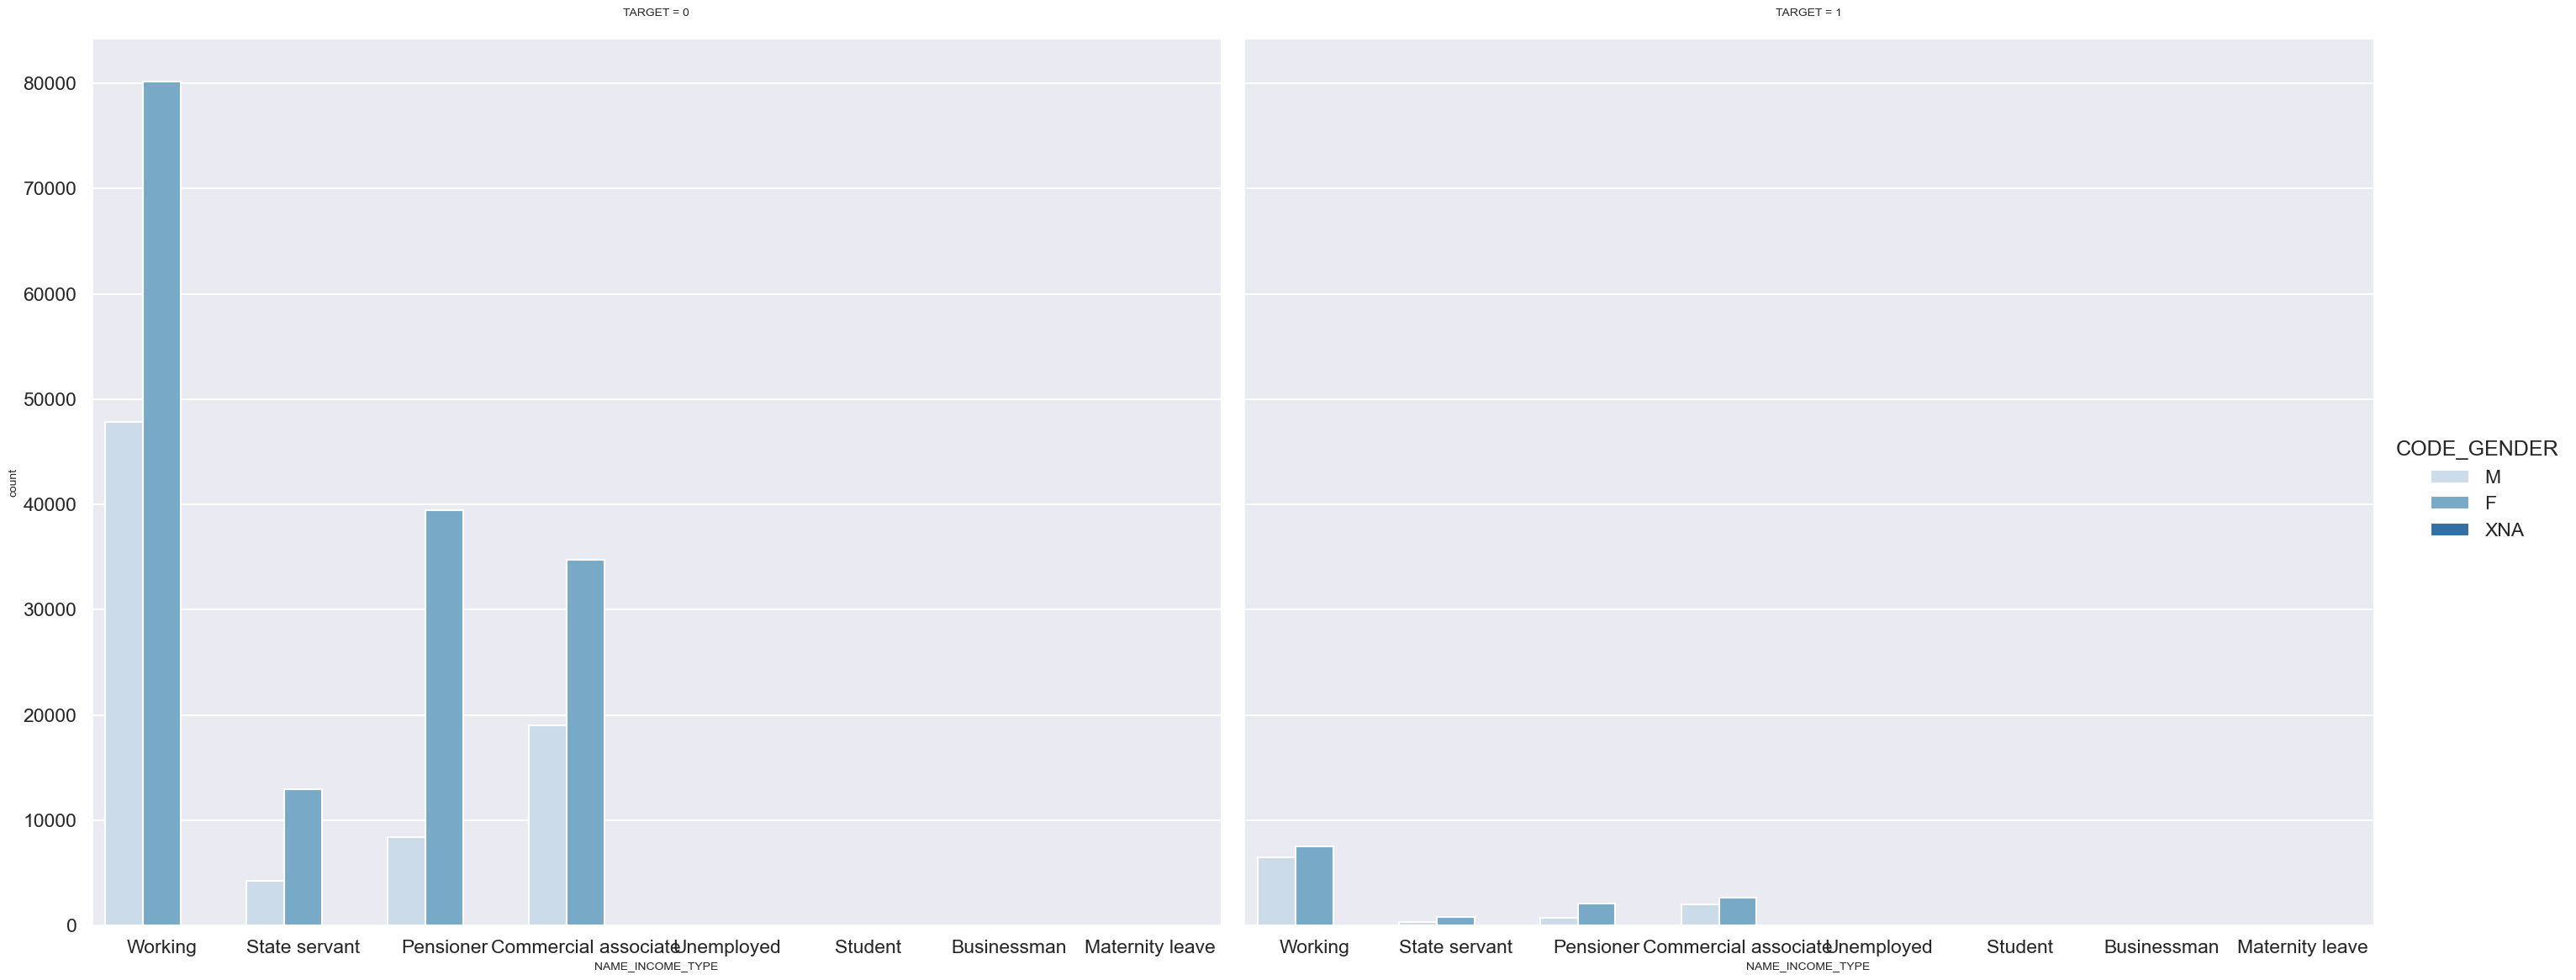

In [57]:
# Analyze impact of Gender and Income Type on "Target" variable

plt.figure(6,figsize=(10,5))

column = "NAME_INCOME_TYPE"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 1.2, palette ='Blues')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

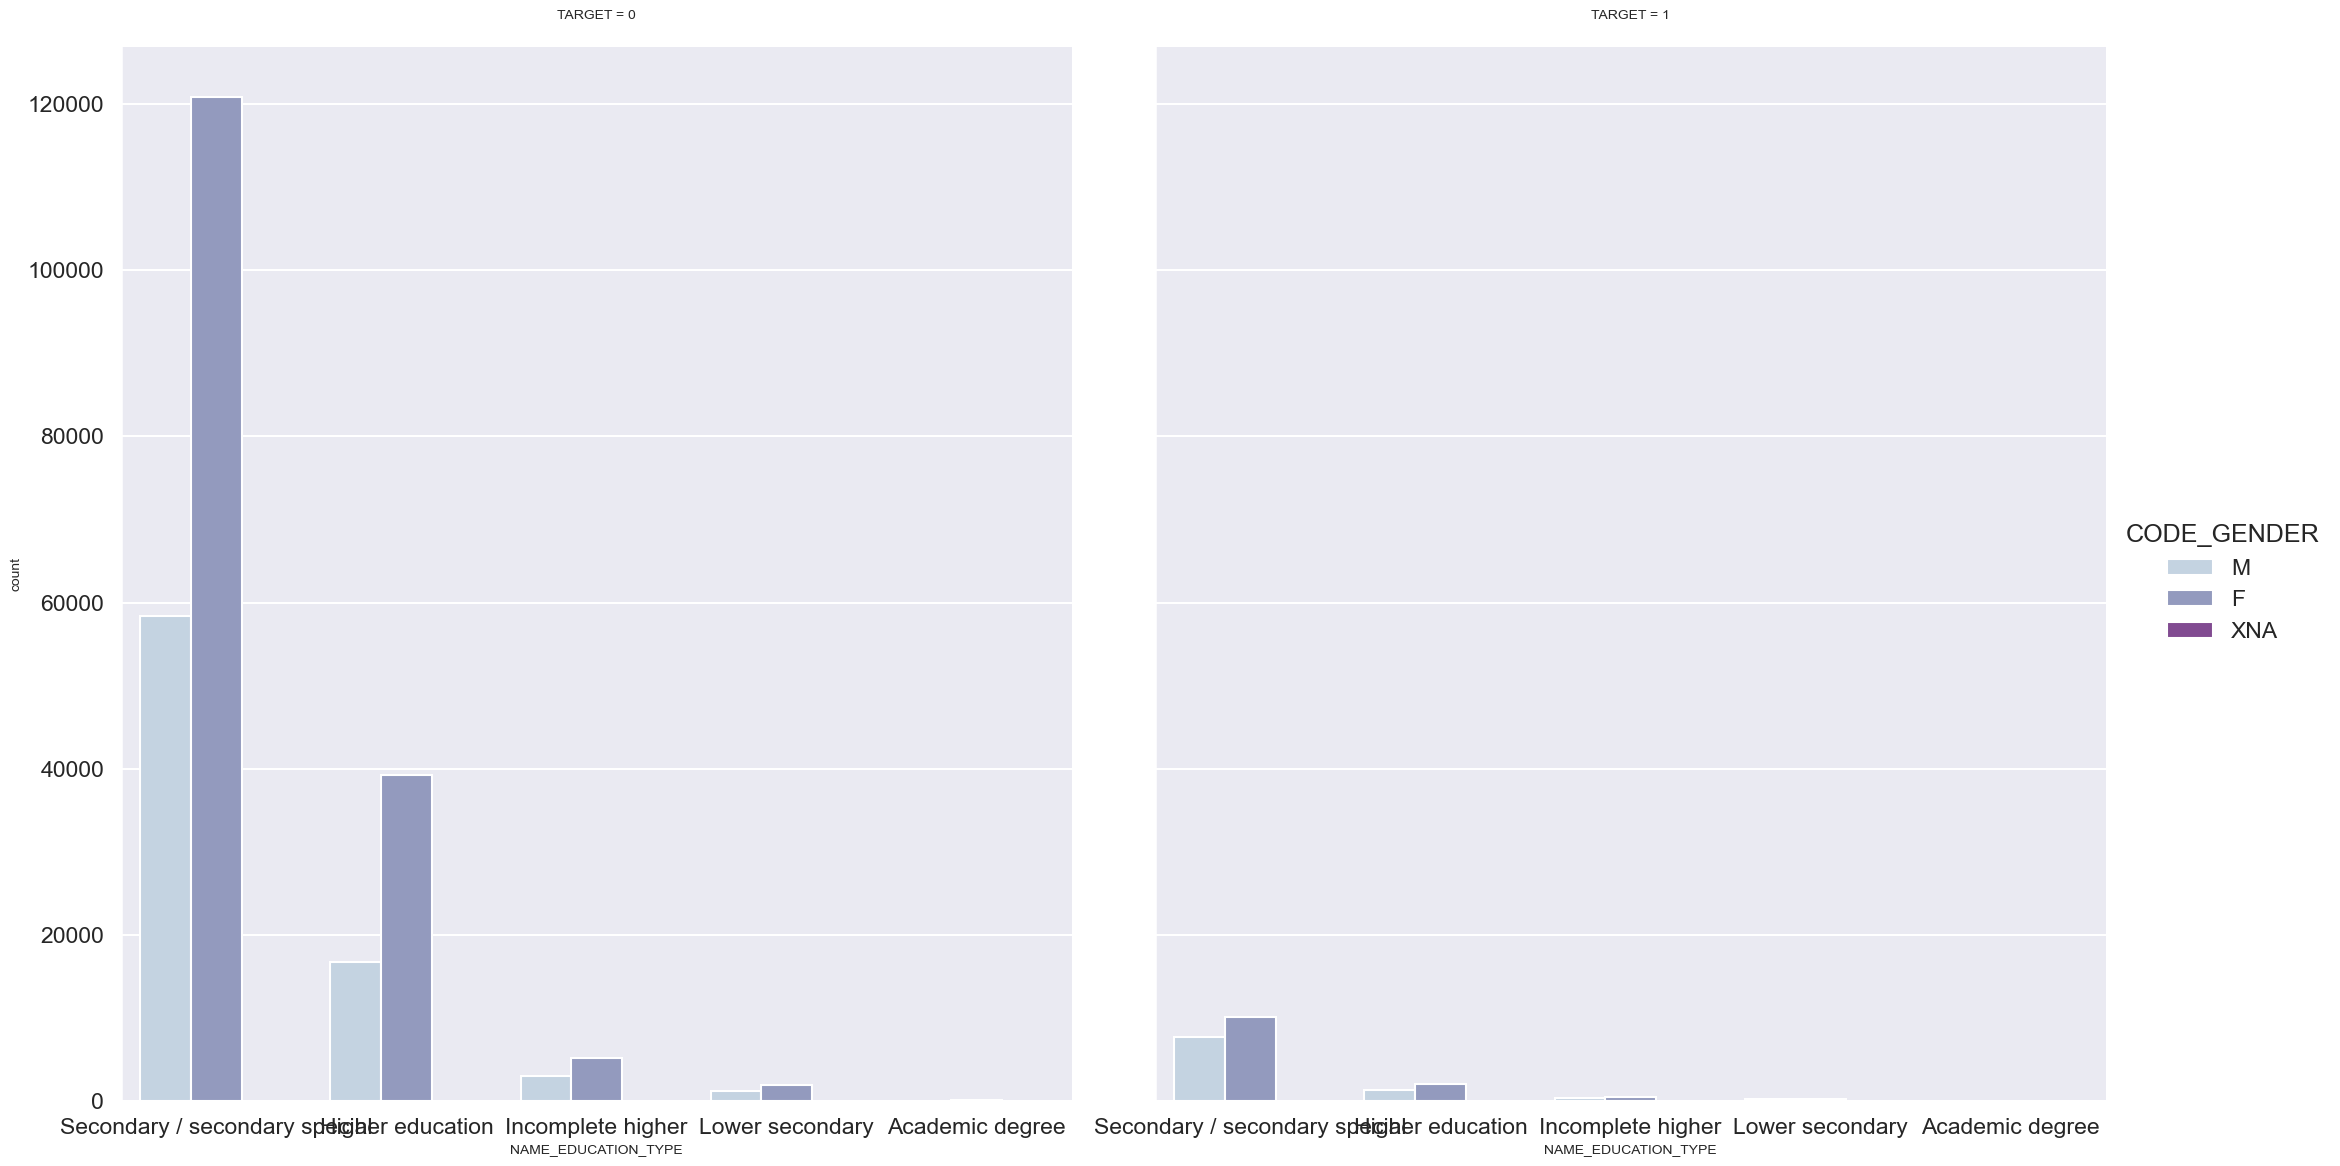

In [58]:
# Analyze impact of Gender and Education Type on "Target" variable

plt.figure(6,figsize=(10,5))

column = "NAME_EDUCATION_TYPE"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 0.9, palette = 'BuPu')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

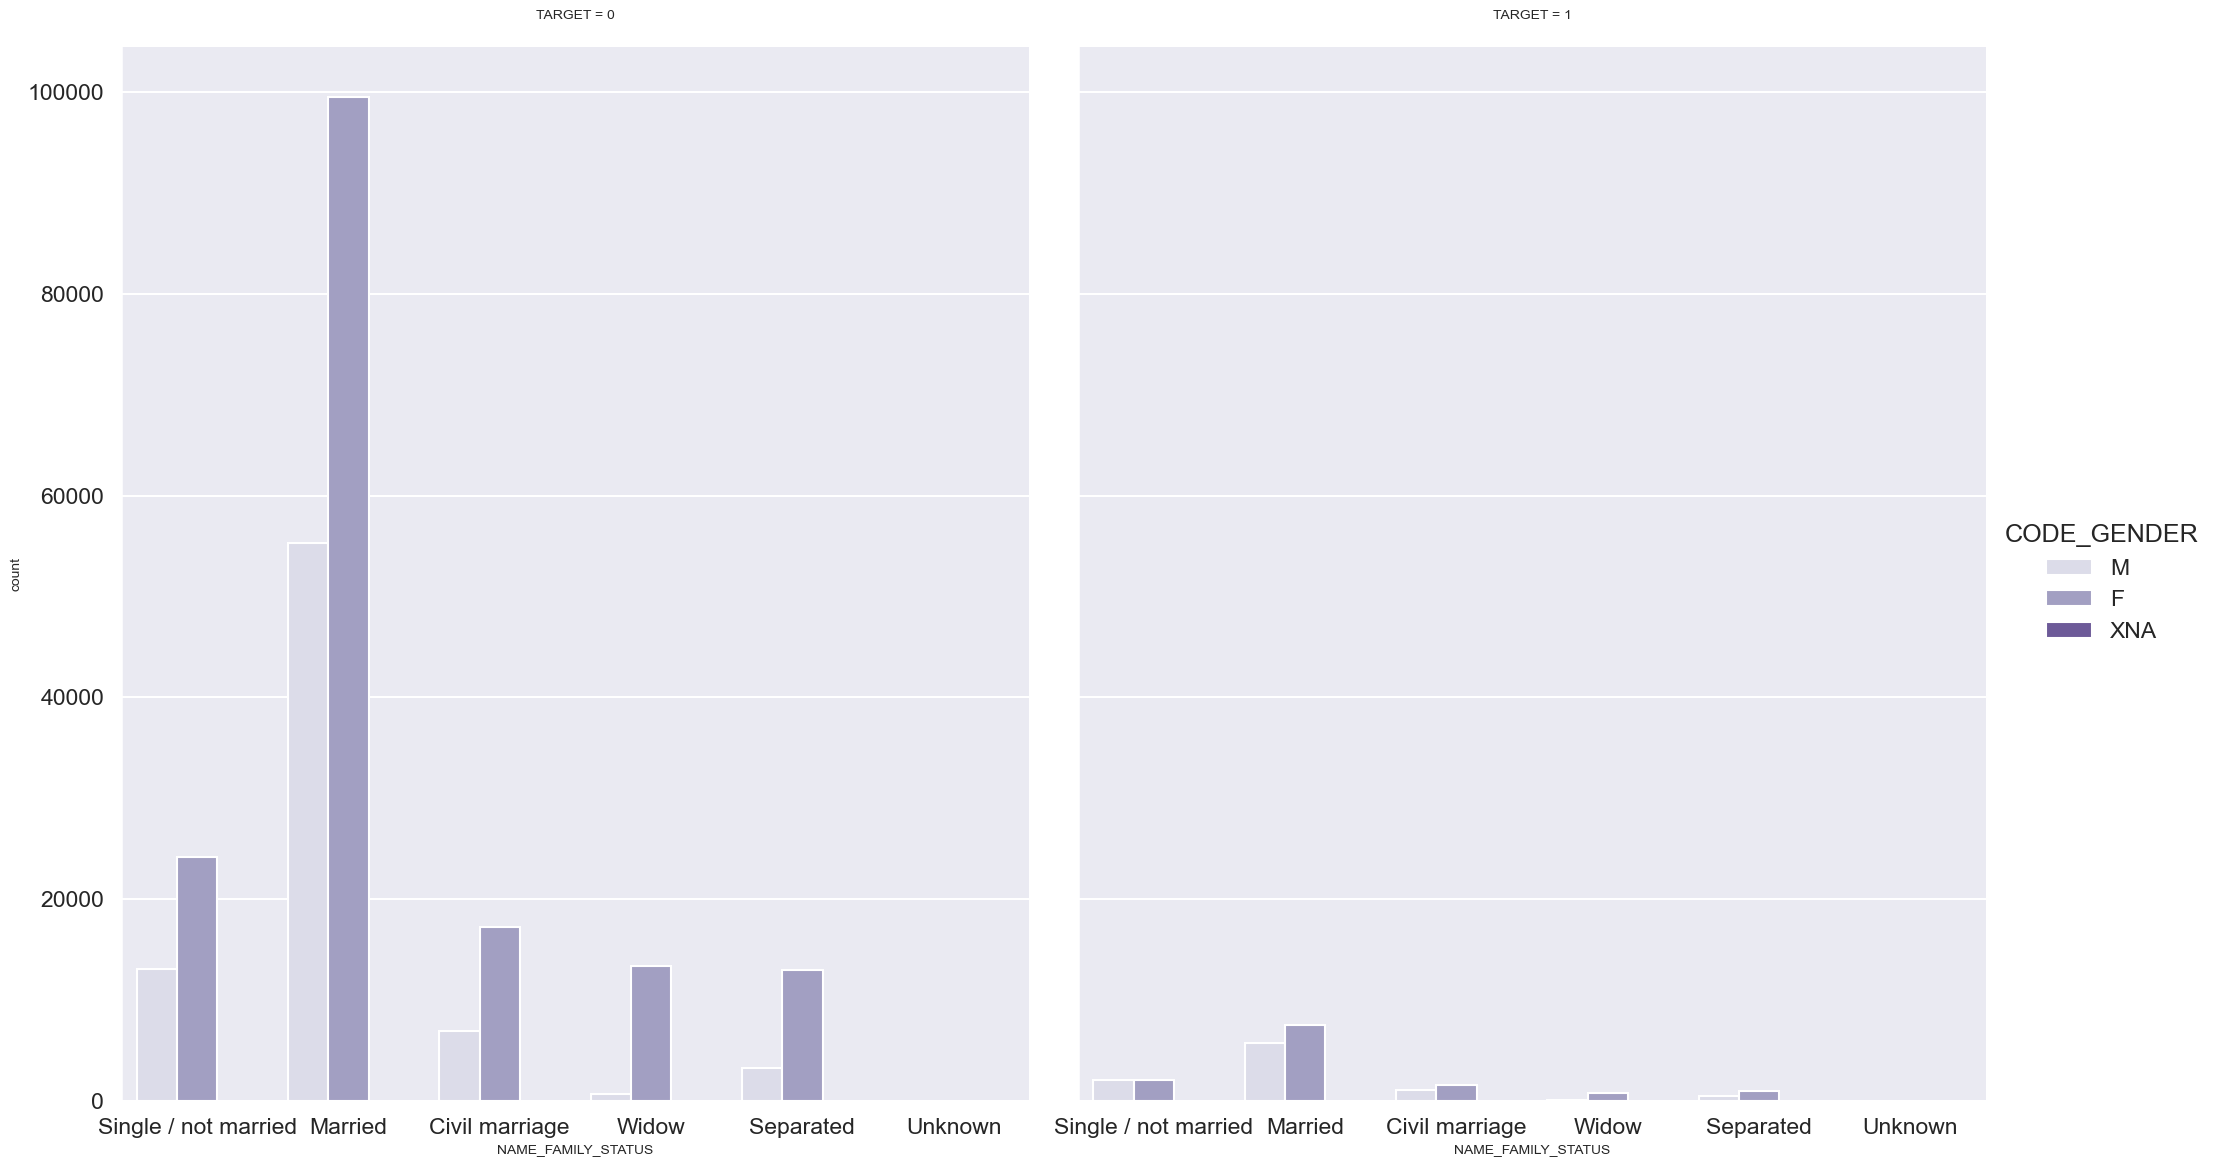

In [59]:
# Analyze impact of Gender and Family Status on "Target" variable

plt.figure(6,figsize=(10,5))

column = "NAME_FAMILY_STATUS"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 0.85, palette = 'Purples')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

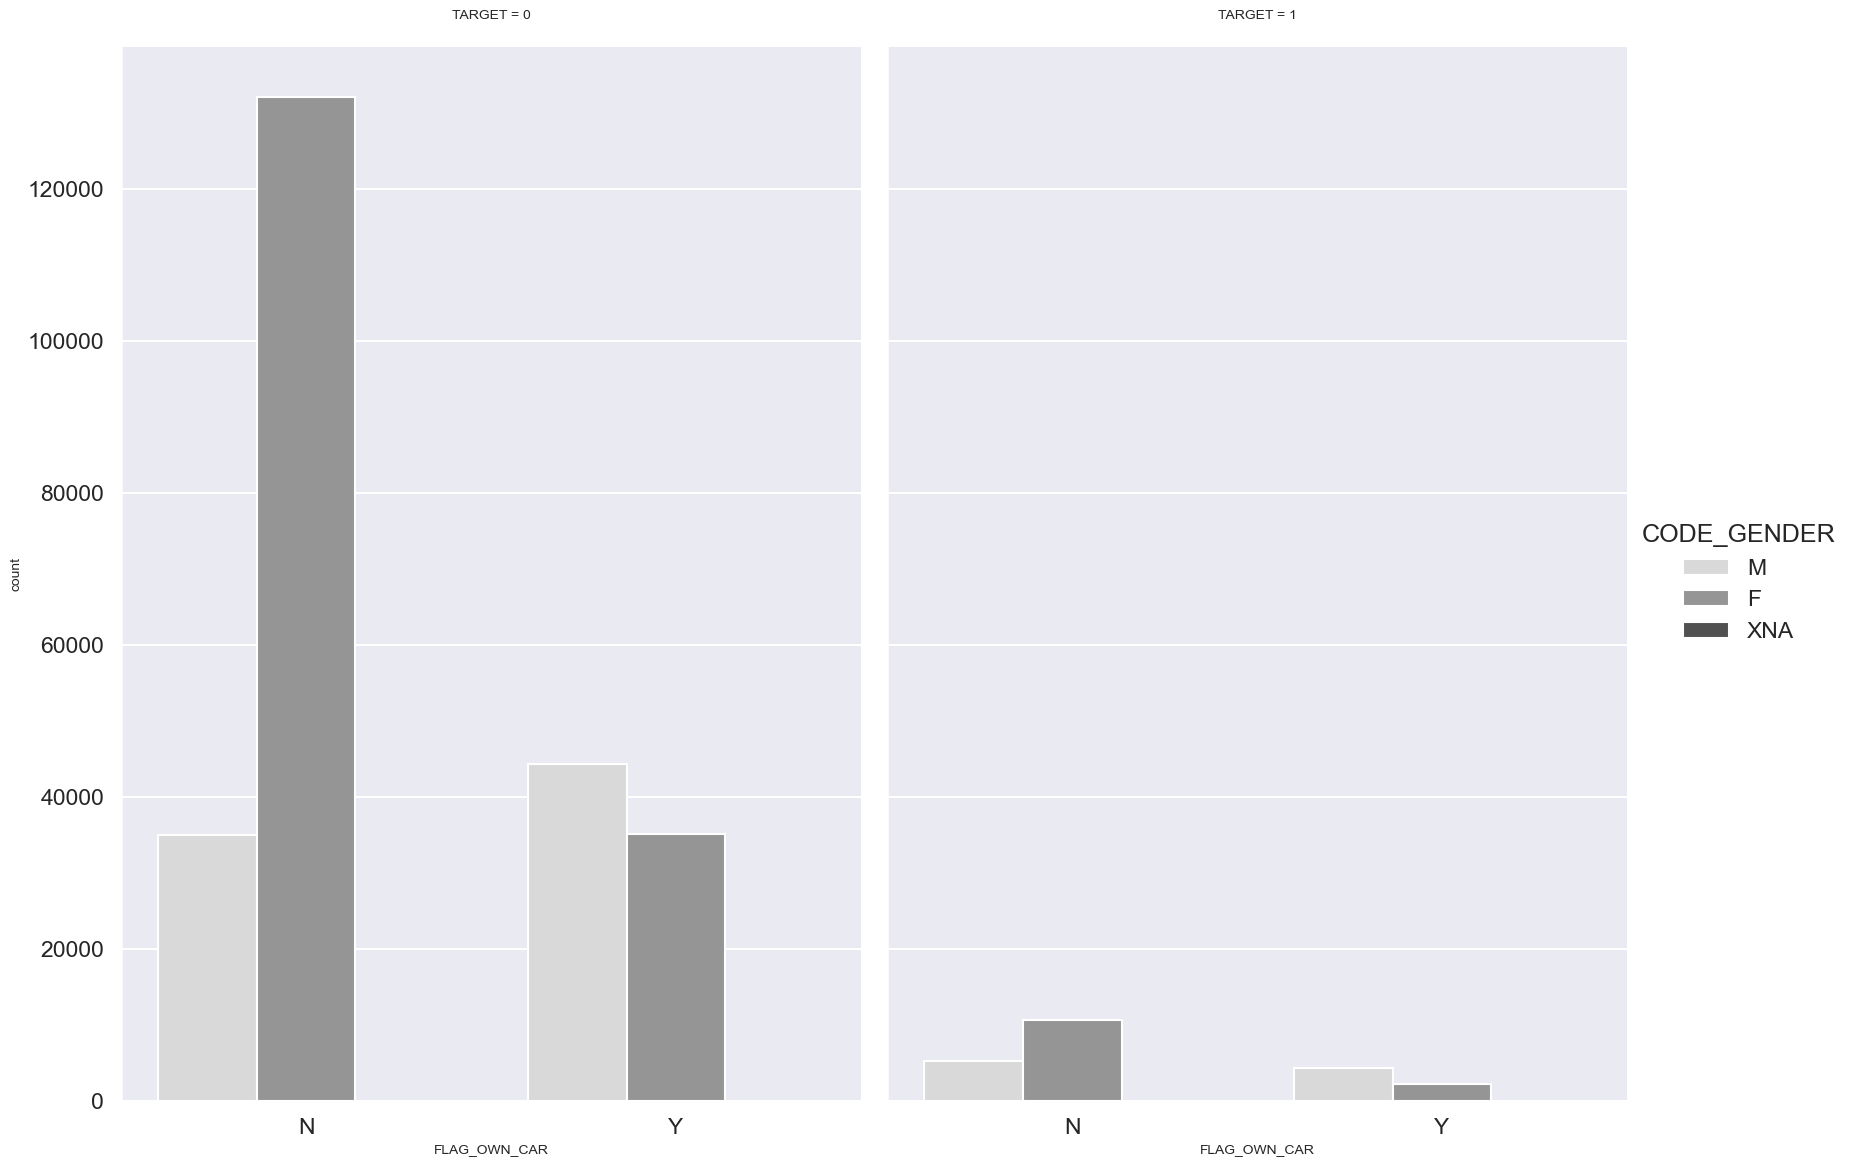

In [60]:
# Analyze impact of Gender and Own Car on "Target" variable

plt.figure(6,figsize=(10,5))

column = "FLAG_OWN_CAR"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 0.7, palette = 'Greys')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

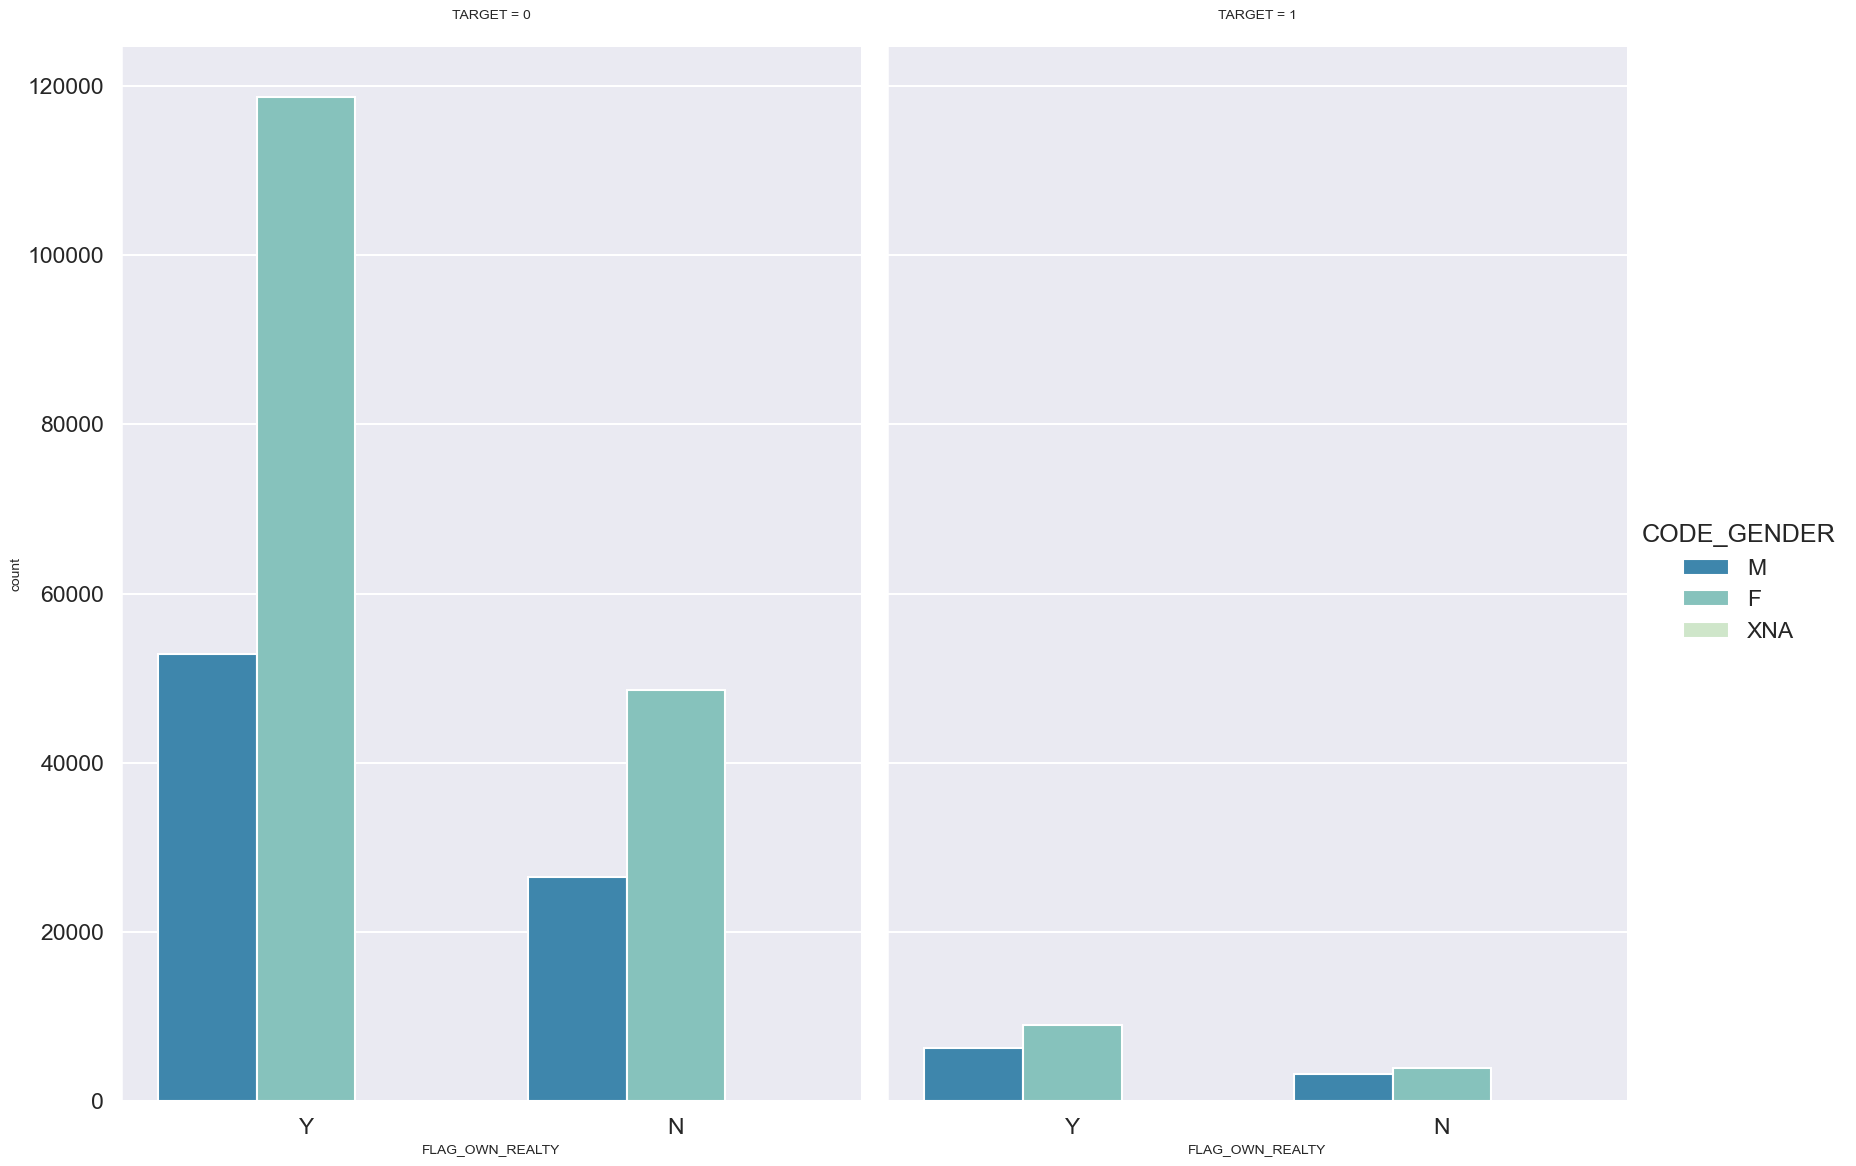

In [61]:
# Analyze impact of Gender and Own Realty on "Target" variable

plt.figure(6,figsize=(10,5))

column = "FLAG_OWN_REALTY"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 0.7, palette = 'GnBu_r')
# plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x500 with 0 Axes>

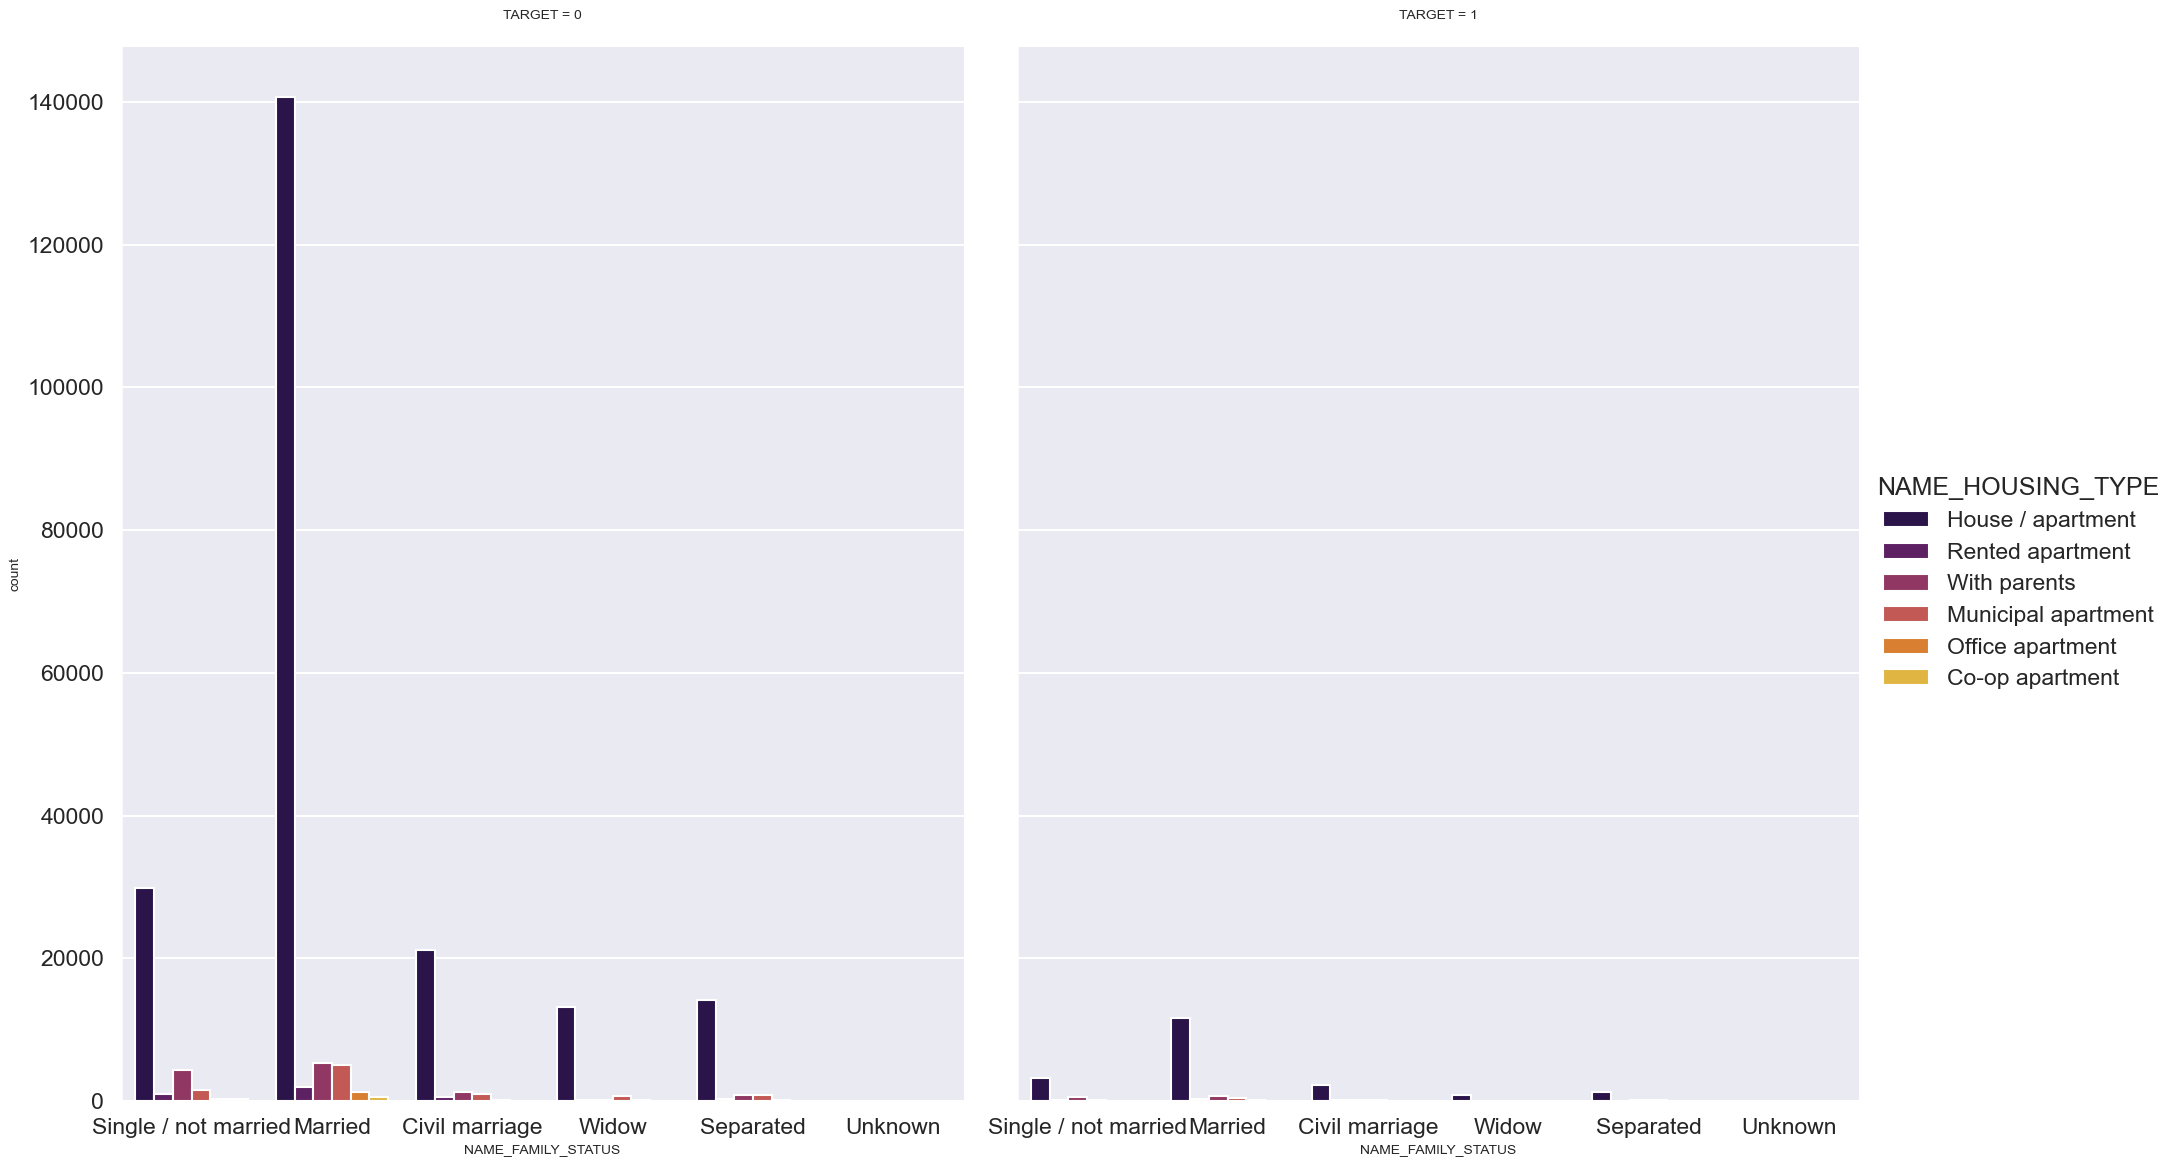

In [62]:
# Analyze impact of Family Status and Housing Type on "Target" variable

plt.figure(6,figsize=(10,5))

column = "NAME_FAMILY_STATUS"
h = "NAME_HOUSING_TYPE"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 0.8, palette ='inferno')

plt.xticks(rotation=0)
# plt.legend(loc="upper right")
plt.show()

<Figure size 1000x500 with 0 Axes>

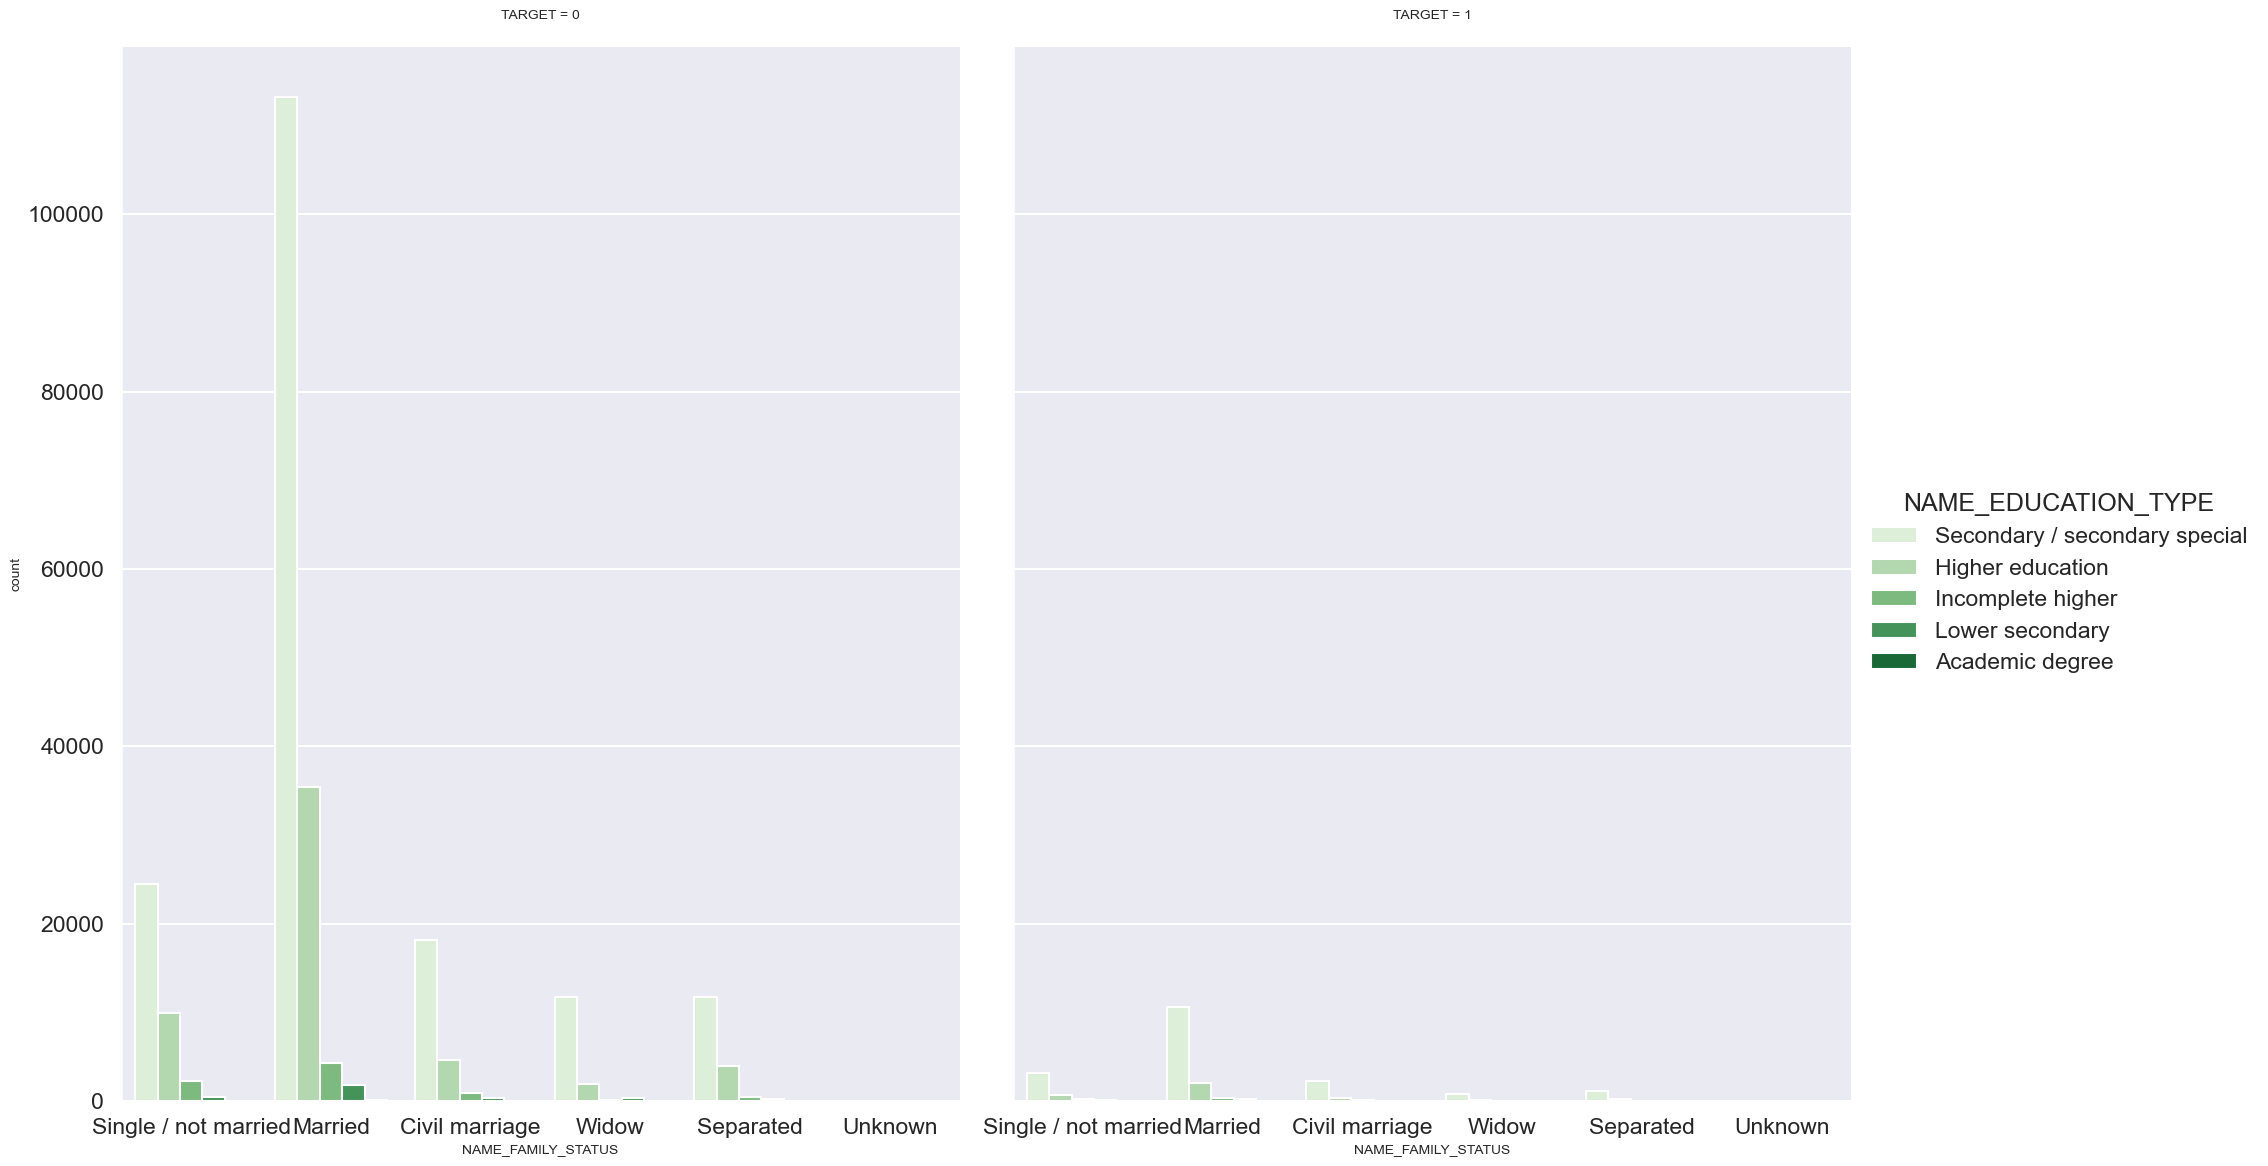

In [63]:
# Analyze impact of Family Status and Education Type on "Target" variable

plt.figure(6,figsize=(10,5))

column = "NAME_FAMILY_STATUS"
h = "NAME_EDUCATION_TYPE"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 0.8, palette = 'Greens')

plt.xticks(rotation=0)
# plt.legend(loc="upper right")
plt.show()

<Figure size 1000x500 with 0 Axes>

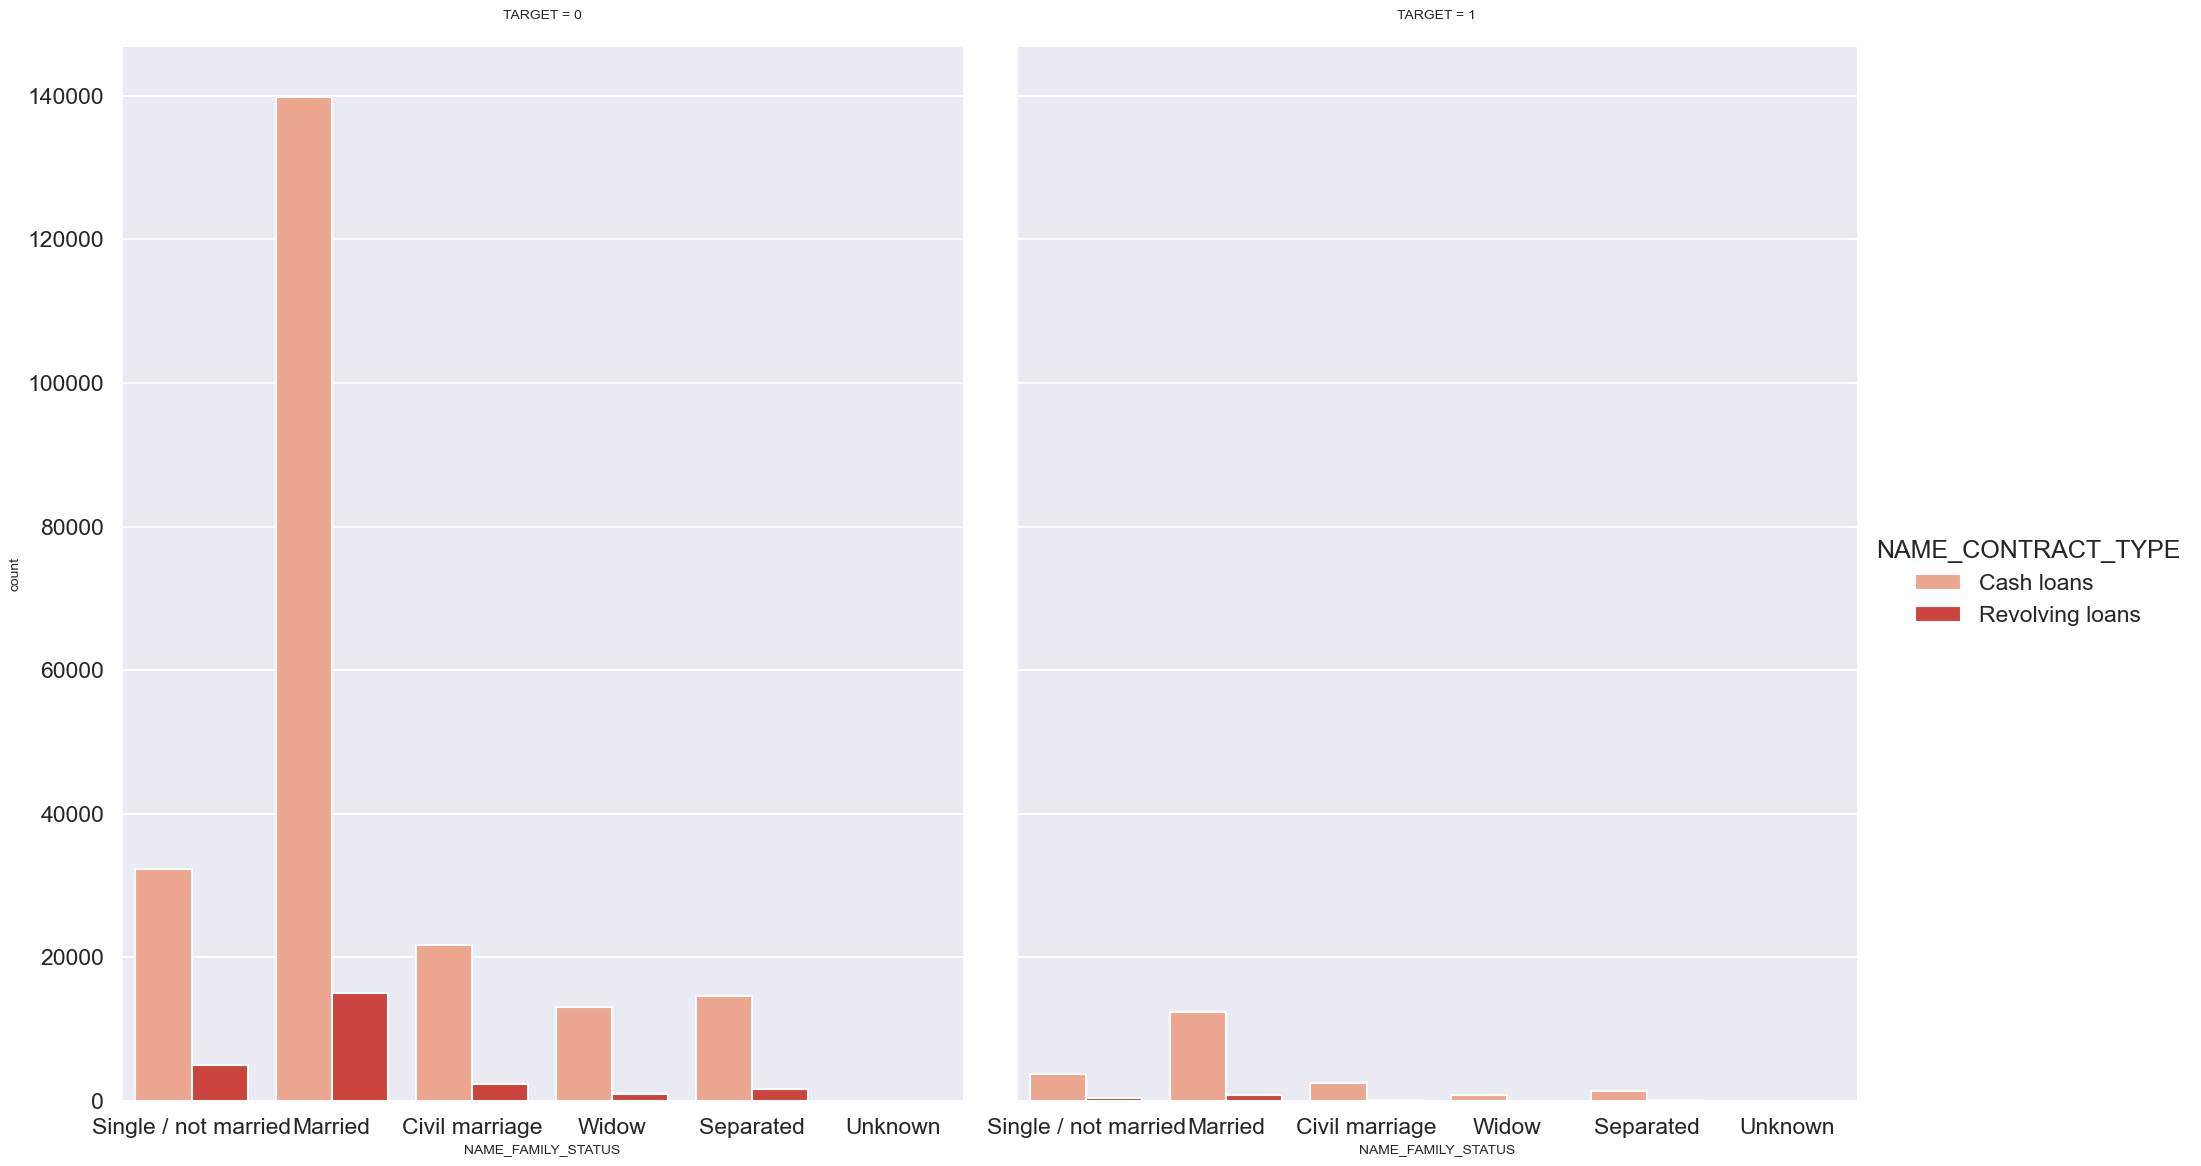

In [64]:
# Analyze impact of Family Status and Contract Type on "Target" variable

plt.figure(6,figsize=(10,5))

column = "NAME_FAMILY_STATUS"
h = "NAME_CONTRACT_TYPE"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=df_clean, kind="count", height = 12, aspect = 0.8, palette = 'Reds')

plt.xticks(rotation=0)
# plt.legend(loc="upper right")
plt.show() 

# CONCLUSION ON MODEL INSIGHT


It can be concluded that certain factors such as gender, car ownership, realty ownership, family status, income level, income type, loan type, education type and organization type have an impact on loan default rates.

1. Gender: Females show a higher proportion in the target variable across various variables, indicating that they may be more likely to have difficulty paying their loan installments.


2. Car Ownership: Car ownership interacts with gender to influence default rates differently for males and females. 


3. Realty Ownership: Realty ownership does seems to significantly affect default rates differently for females than males. Home ownership does appear to significantly impact credit application numbers, as there is a clear difference in counts between those who own realty and those who do not.


4. Family Status: Married applicants consistently have the highest proportion in the target variable, suggesting they may have a higher likelihood of facing difficulties in paying their loan installments. Followed by single, civil marriage, and separated individuals. This indicates that marital status may impact the financial circumstances or credit needs of individuals.


5. Income Level: The income range of 100,000 to 200,000 is the most popular for credit applications, indicating that individuals within this range have a higher need for credit or financial stability. There is a lower count of credit applications from individuals with an income of 400,000 and above.


6. Income Type: Certain income types, such as 'working', 'commercial associate', and 'State Servant', demonstrate a higher demand for credit. Females have a higher count of credit applications than males within these income types.


7. Loan Type: 'Cash loans' receive a higher number of credit applications compared to 'Revolving loans', suggesting a preference for one-time lump-sum financing rather than a revolving line of credit.


8. Organization Type: The most popular organization types for credit applications include 'Business entity Type 3', 'Self-employed', 'Other', 'Medicine', and 'Government', indicating a higher need for credit in business, medical, or government-related expenses. There is a lower count of credit applications from certain organization types.


9. Education Type:The educational attainment level of applicants varies, with higher counts of credit applications from individuals with secondary and higher education. This indicates a potential correlation between education level and credit demand or financial stability. Females have a higher count of credit applications across different education levels, suggesting that gender may play a role in the financial decision-making or credit needs of individuals with varying levels of education.


These insights can help shape company's strategies to adjusting loan terms, deny loans, or offer higher interest rates to risky applicants(such as females or married individuals). For instance, the company may consider implementing risk assessment algorithms that take into account gender, marital status, education level, and other variables to effectively identify applicants who are more likely to have difficulty paying their installments. This can enable the company to tailor loan terms and conditions, offer targeted financial education programs, or deny loans to higher-risk applicants to mitigate potential default risks. By considering these factors, the company can better assess the likelihood of an applicant facing difficulties in paying installments and take preventive measures to minimize loan defaults.


Overall, these insights highlight the importance of considering various factors, such as gender, marital status, education level, and income type, in understanding loan default patterns and making informed decisions to manage the associated risks.